# Introduction

This a personal project created by [Alexander Quesada Quesada](https://www.linkedin.com/in/alexander-quesada-quesada-b91348259/), the goal is to simulate Linkedin job postings as nodes in a graph and create edges between nodes that satisfy specific requierments, those connections represent similarity between two jobs, and they will also have weights from 0 to 1 representing the strength of that similarity.

**This project includes two different types of Deep Learning Models:**

* GNN (Graph Neural Network) model that predicts new connections between nodes after a cautious and meticulous training process where it learns the patterns of the pre-established edges to come up with new ones.

* XGBoost model that applies regression learning to predict  weights (strength) for all the previously predicted
new connections between nodes.

**The workflow or project pipeline consists on:**  

1. Loading and Merging the CSV different files into pandas datasets.

2. Cleaning, encoding and polishing further details of the merged pandas dataset.

3. Preparing the data as matrices that PyTorch Geometric library can understand and convert into [PyTorch Geometric Graph Data](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html).

4. Plotting some examples of the PyTorch Geometric Graph Data

5. Preparing both Training and Testing Data.

6. [Model Creation (by Orbifold)](https://github.com/Orbifold/pyg-link-prediction/blob/main/run.py#L22), batching, training and evaluating GNN model's performance.

7. Creating and Training the XGBoost model.

8. Create the final function that predicts all possible new connections and their corresponding weights for all nodes within some input graph, by using the previous mentioned models.

9. Unit Testing the combined Deep Learning Pipeline's predictions and perfomance.

10. Use [GNNLens2](https://github.com/dmlc/GNNLens2) for graph visualization, with the Deep Learning Pipeline's results included.

11. Public Repository Creating and Web Deployment of this App.

# Dataset and Files

---

[This dataset](https://www.kaggle.com/datasets/arshkon/linkedin-job-postings) comprises over 33,000 job postings gathered from LinkedIn over two separate days, offering a comprehensive snapshot of job opportunities. Each posting includes 27 attributes such as title, job description, salary, location, application URL, and work type (remote, contract, etc). Additional files contain information on benefits, skills, and industries associated with each posting. The dataset also links jobs to companies, with a separate CSV file providing details on each company, including description, headquarters location, number of employees, and follower count.

---

### job_postings.csv

- `job_id`: The job ID as defined by [LinkedIn](https://www.linkedin.com/jobs/view/job_id).
- `company_id`: Identifier for the company associated with the job posting (maps to companies.csv).
- `title`: Job title.
- `description`: Job description.
- `max_salary`: Maximum salary.
- `med_salary`: Median salary.
- `min_salary`: Minimum salary.
- `pay_period`: Pay period for salary (Hourly, Monthly, Yearly).
- `formatted_work_type`: Type of work (Fulltime, Parttime, Contract).
- `location`: Job location.
- `applies`: Number of applications that have been submitted.
- `original_listed_time`: Original time the job was listed.
- `remote_allowed`: Whether the job permits remote work.
- `views`: Number of times the job posting has been viewed.
- `job_posting_url`: URL to the job posting on a platform.
- `application_url`: URL where applications can be submitted.
- `application_type`: Type of application process (offsite, complex/simple onsite).
- `expiry`: Expiration date or time for the job listing.
- `closed_time`: Time to close job listing.
- `formatted_experience_level`: Job experience level (entry, associate, executive, etc).
- `skills_desc`: Description detailing required skills for the job.
- `listed_time`: Time when the job was listed.
- `posting_domain`: Domain of the website with the application.
- `sponsored`: Whether the job listing is sponsored or promoted.
- `work_type`: Type of work associated with the job.
- `currency`: Currency in which the salary is provided.
- `compensation_type`: Type of compensation for the job.
‎

### job_details/benefits.csv

- `job_id`: The job ID.
- `type`: Type of benefit provided (401K, Medical Insurance, etc).
- `inferred`: Whether the benefit was explicitly tagged or inferred through text by LinkedIn.

### company_details/companies.csv

- `company_id`: The company ID as defined by LinkedIn.
- `name`: Company name.
- `description`: Company description.
- `company_size`: Company grouping based on the number of employees (0 Smallest - 7 Largest).
- `country`: Country of the company headquarters.
- `state`: State of the company headquarters.
- `city`: City of the company headquarters.
- `zip_code`: ZIP code of the company's headquarters.
- `address`: Address of the company's headquarters.
- `url`: Link to the company's LinkedIn page.

### company_details/employee_counts.csv

- `company_id`: The company ID.
- `employee_count`: Number of employees at the company.
- `follower_count`: Number of company followers on LinkedIn.
- `time_recorded`: Unix time of data collection.

---

*CC BY-SA 4.0*

*By ARSH KON*

---

# Load -> Transform -> Merge

## Job Postings CSV

In [1]:
import pandas as pd
import csv
df = pd.read_csv("https://git.ucr.ac.cr/ALEXANDER.QUESADAQUESADA/misc/-/raw/main/job_postings.csv?ref_type=heads", on_bad_lines='skip')

In [2]:
df

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,1.710000e+12,NaN,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,USD,BASE_SALARY
1,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",...,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN
2,133196985,1089558.0,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,NaN,NaN,NaN,NaN,Contract,"New York, NY",...,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,CONTRACT,NaN,NaN
3,381055942,96654609.0,Business Manager,Business ManagerFirst Baptist Church ForneyFor...,NaN,NaN,NaN,NaN,Full-time,"Forney, TX",...,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN
4,529257371,1244539.0,NY Studio Assistant,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,NaN,NaN,NaN,NaN,Full-time,"New York, NY",...,1.710000e+12,NaN,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15881,3701373516,74718032.0,Sanitation Technician,"Location:\n\nWest Columbia, SC, US, 29172\n\n2...",NaN,NaN,NaN,NaN,Part-time,"West Columbia, SC",...,1.700000e+12,NaN,Entry level,NaN,1.690000e+12,aspirebakeriescareers.com,0,PART_TIME,NaN,NaN
15882,3701373522,38897.0,Unit Secretary,Job Title: Unit Secretary\nDepartment: Nursing...,NaN,NaN,NaN,NaN,Full-time,"Teaneck, NJ",...,1.700000e+12,NaN,Entry level,NaN,1.690000e+12,recruiting.ultipro.com,0,FULL_TIME,NaN,NaN
15883,3701373523,38897.0,"Radiology Aide, Perdiem","Job Title: Radiology Aide, Perdiem\nDepartment...",NaN,NaN,NaN,NaN,Part-time,"Teaneck, NJ",...,1.700000e+12,NaN,Entry level,NaN,1.690000e+12,recruiting.ultipro.com,0,PART_TIME,NaN,NaN
15884,3701373524,2623.0,MRI Manager,Grade 105\nJob Type: Officer of Administration...,135000.0,NaN,110000.0,YEARLY,Full-time,"New York, NY",...,1.700000e+12,NaN,Mid-Senior level,NaN,1.690000e+12,opportunities.columbia.edu,0,FULL_TIME,USD,BASE_SALARY


In [3]:
# Keep columns that have at least 50% of non NaN data
df.dropna(axis=1, thresh=int(15886*0.5), inplace=True)
df

,job_id,company_id,title,description,formatted_work_type,location,applies,original_listed_time,views,job_posting_url,application_url,application_type,expiry,formatted_experience_level,listed_time,posting_domain,sponsored,work_type
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,Full-time,"Chico, CA",NaN,1.690000e+12,5.0,https://www.linkedin.com/jobs/view/85008768/?t...,NaN,ComplexOnsiteApply,1.710000e+12,NaN,1.690000e+12,NaN,1,FULL_TIME
1,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,Full-time,"Santa Clarita, CA",NaN,1.690000e+12,NaN,https://www.linkedin.com/jobs/view/133114754/?...,NaN,ComplexOnsiteApply,1.700000e+12,NaN,1.690000e+12,NaN,0,FULL_TIME
2,133196985,1089558.0,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,Contract,"New York, NY",1.0,1.690000e+12,17.0,https://www.linkedin.com/jobs/view/133196985/?...,NaN,ComplexOnsiteApply,1.700000e+12,NaN,1.690000e+12,NaN,0,CONTRACT
3,381055942,96654609.0,Business Manager,Business ManagerFirst Baptist Church ForneyFor...,Full-time,"Forney, TX",NaN,1.690000e+12,NaN,https://www.linkedin.com/jobs/view/381055942/?...,NaN,ComplexOnsiteApply,1.700000e+12,NaN,1.690000e+12,NaN,0,FULL_TIME
4,529257371,1244539.0,NY Studio Assistant,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,Full-time,"New York, NY",NaN,1.690000e+12,2.0,https://www.linkedin.com/jobs/view/529257371/?...,NaN,ComplexOnsiteApply,1.710000e+12,NaN,1.690000e+12,NaN,1,FULL_TIME
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15881,3701373516,74718032.0,Sanitation Technician,"Location:\n\nWest Columbia, SC, US, 29172\n\n2...",Part-time,"West Columbia, SC",NaN,1.690000e+12,1.0,https://www.linkedin.com/jobs/view/3701373516/...,https://aspirebakeriescareers.com/job/West-Col...,OffsiteApply,1.700000e+12,Entry level,1.690000e+12,aspirebakeriescareers.com,0,PART_TIME
15882,3701373522,38897.0,Unit Secretary,Job Title: Unit Secretary\nDepartment: Nursing...,Full-time,"Teaneck, NJ",2.0,1.690000e+12,7.0,https://www.linkedin.com/jobs/view/3701373522/...,https://recruiting.ultipro.com/HOL1005HNMC/Job...,OffsiteApply,1.700000e+12,Entry level,1.690000e+12,recruiting.ultipro.com,0,FULL_TIME
15883,3701373523,38897.0,"Radiology Aide, Perdiem","Job Title: Radiology Aide, Perdiem\nDepartment...",Part-time,"Teaneck, NJ",NaN,1.690000e+12,3.0,https://www.linkedin.com/jobs/view/3701373523/...,https://recruiting.ultipro.com/HOL1005HNMC/Job...,OffsiteApply,1.700000e+12,Entry level,1.690000e+12,recruiting.ultipro.com,0,PART_TIME
15884,3701373524,2623.0,MRI Manager,Grade 105\nJob Type: Officer of Administration...,Full-time,"New York, NY",NaN,1.690000e+12,10.0,https://www.linkedin.com/jobs/view/3701373524/...,https://opportunities.columbia.edu/jobs/mri-ma...,OffsiteApply,1.700000e+12,Mid-Senior level,1.690000e+12,opportunities.columbia.edu,0,FULL_TIME


In [4]:
# Fill nan applies as 0
df['applies'].fillna(value=0, inplace=True)
df['applies'] = df['applies'].astype(int)

# Drop useless columns
df.drop(columns='original_listed_time', inplace=True)
df.drop(columns='job_posting_url', inplace=True)
df.drop(columns='application_url', inplace=True)
df.drop(columns='expiry', inplace=True)
df.drop(columns='listed_time', inplace=True)
df.drop(columns='work_type', inplace=True)
df

,job_id,company_id,title,description,formatted_work_type,location,applies,views,application_type,formatted_experience_level,posting_domain,sponsored
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,Full-time,"Chico, CA",0,5.0,ComplexOnsiteApply,NaN,NaN,1
1,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,Full-time,"Santa Clarita, CA",0,NaN,ComplexOnsiteApply,NaN,NaN,0
2,133196985,1089558.0,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,Contract,"New York, NY",1,17.0,ComplexOnsiteApply,NaN,NaN,0
3,381055942,96654609.0,Business Manager,Business ManagerFirst Baptist Church ForneyFor...,Full-time,"Forney, TX",0,NaN,ComplexOnsiteApply,NaN,NaN,0
4,529257371,1244539.0,NY Studio Assistant,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,Full-time,"New York, NY",0,2.0,ComplexOnsiteApply,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
15881,3701373516,74718032.0,Sanitation Technician,"Location:\n\nWest Columbia, SC, US, 29172\n\n2...",Part-time,"West Columbia, SC",0,1.0,OffsiteApply,Entry level,aspirebakeriescareers.com,0
15882,3701373522,38897.0,Unit Secretary,Job Title: Unit Secretary\nDepartment: Nursing...,Full-time,"Teaneck, NJ",2,7.0,OffsiteApply,Entry level,recruiting.ultipro.com,0
15883,3701373523,38897.0,"Radiology Aide, Perdiem","Job Title: Radiology Aide, Perdiem\nDepartment...",Part-time,"Teaneck, NJ",0,3.0,OffsiteApply,Entry level,recruiting.ultipro.com,0
15884,3701373524,2623.0,MRI Manager,Grade 105\nJob Type: Officer of Administration...,Full-time,"New York, NY",0,10.0,OffsiteApply,Mid-Senior level,opportunities.columbia.edu,0


## Companies CSV

In [5]:
df2 = pd.read_csv("https://raw.githubusercontent.com/papitaAlgodonCplusplus/Misc/main/companies.csv", on_bad_lines='skip')
df2

,company_id,name,description,company_size,state,country,city,zip_code,address,url
0,1009,IBM,"At IBM, we do more than work. We create. We cr...",7.0,NY,US,"Armonk, New York",10504,International Business Machines Corp.,https://www.linkedin.com/company/ibm
1,1016,GE HealthCare,Every day millions of people feel the impact o...,7.0,0,US,Chicago,0,-,https://www.linkedin.com/company/gehealthcare
2,1021,GE Power,"GE Power, part of GE Vernova, is a world energ...",7.0,NY,US,Schenectady,12345,1 River Road,https://www.linkedin.com/company/gepower
3,1025,Hewlett Packard Enterprise,Official LinkedIn of Hewlett Packard Enterpris...,7.0,Texas,US,Houston,77389,1701 E Mossy Oaks Rd Spring,https://www.linkedin.com/company/hewlett-packa...
4,1028,Oracle,We’re a cloud technology company that provides...,7.0,Texas,US,Austin,78741,2300 Oracle Way,https://www.linkedin.com/company/oracle
...,...,...,...,...,...,...,...,...,...,...
6058,3700144594,BYREDO,"""Beauty can be many things to many people. Our...",3.0,0,0,0,0,0,https://www.linkedin.com/company/byredo
6059,3700144710,"Pros2Plan, a division of Spinnaker SCA","Pros2Plan, a division of Spinnaker Services L...",2.0,CO,US,Boulder,80303,0,https://www.linkedin.com/company/pros2plan
6060,3700147810,Ascendo Resources,Ascendo Resources is a certified minority owne...,3.0,FL,US,Coral Gables,33134,2 Alhambra Plaza,https://www.linkedin.com/company/ascendoresources
6061,3700150295,The Crox Group,"The Crox Group, Head Quartered in Chicago, wit...",2.0,Illinois,US,Lincolnwood,60712,6818 N Lincoln Ave,https://www.linkedin.com/company/the-crox-group


In [6]:
df = df.merge(df2, on='company_id', how='left')
df.rename(columns = {'description_x':'job_desc'}, inplace = True)
df.rename(columns = {'description_y':'company_desc'}, inplace = True)
df.rename(columns = {'name':'company_name'}, inplace = True)
df.rename(columns = {'state':'company_state'}, inplace = True)
df.rename(columns = {'country':'company_country'}, inplace = True)
df.rename(columns = {'city':'company_city'}, inplace = True)
df.rename(columns = {'zip_code':'company_zip_code'}, inplace = True)
df.rename(columns = {'address':'company_address'}, inplace = True)
df.drop(columns='url', inplace=True)
del df2
df

,job_id,company_id,title,job_desc,formatted_work_type,location,applies,views,application_type,formatted_experience_level,posting_domain,sponsored,company_name,company_desc,company_size,company_state,company_country,company_city,company_zip_code,company_address
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,Full-time,"Chico, CA",0,5.0,ComplexOnsiteApply,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,Full-time,"Santa Clarita, CA",0,NaN,ComplexOnsiteApply,NaN,NaN,0,CargoLogin.,CargoLogin is a freight and logistics company ...,1.0,California,US,Santa Clarita,28358,Constellation Rd
2,133196985,1089558.0,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,Contract,"New York, NY",1,17.0,ComplexOnsiteApply,NaN,NaN,0,Employvision Inc.,Employvision is a talent acquisition and manag...,1.0,New Jersey,US,Somerset,08873,285 Davidson Ave
3,381055942,96654609.0,Business Manager,Business ManagerFirst Baptist Church ForneyFor...,Full-time,"Forney, TX",0,NaN,ComplexOnsiteApply,NaN,NaN,0,First Baptist Church Forney,NaN,2.0,Texas,US,Forney,75126,1003 College St
4,529257371,1244539.0,NY Studio Assistant,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,Full-time,"New York, NY",0,2.0,ComplexOnsiteApply,NaN,NaN,1,Ken Fulk Inc,"Ken Fulk Inc, is a creative think tank based o...",1.0,California,US,San Francisco,94103,310 Seventh Street
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15881,3701373516,74718032.0,Sanitation Technician,"Location:\n\nWest Columbia, SC, US, 29172\n\n2...",Part-time,"West Columbia, SC",0,1.0,OffsiteApply,Entry level,aspirebakeriescareers.com,0,Aspire Bakeries,Aspire Bakeries is a North American baking com...,5.0,California,US,Los Angeles,90045,6601 Center Dr W
15882,3701373522,38897.0,Unit Secretary,Job Title: Unit Secretary\nDepartment: Nursing...,Full-time,"Teaneck, NJ",2,7.0,OffsiteApply,Entry level,recruiting.ultipro.com,0,Holy Name Medical Center,"Holy Name is a fully accredited, not-for-profi...",5.0,New Jersey,US,Teaneck,07666,718 Teaneck Road
15883,3701373523,38897.0,"Radiology Aide, Perdiem","Job Title: Radiology Aide, Perdiem\nDepartment...",Part-time,"Teaneck, NJ",0,3.0,OffsiteApply,Entry level,recruiting.ultipro.com,0,Holy Name Medical Center,"Holy Name is a fully accredited, not-for-profi...",5.0,New Jersey,US,Teaneck,07666,718 Teaneck Road
15884,3701373524,2623.0,MRI Manager,Grade 105\nJob Type: Officer of Administration...,Full-time,"New York, NY",0,10.0,OffsiteApply,Mid-Senior level,opportunities.columbia.edu,0,Columbia University Irving Medical Center,Columbia University Irving Medical Center (CUI...,7.0,New York,US,New York,0,630 West 168th St.


## Benefits CSV

In [7]:
df3 = pd.read_csv("https://raw.githubusercontent.com/papitaAlgodonCplusplus/Misc/main/benefits.csv", on_bad_lines='skip')
df3

,job_id,inferred,type
0,3690843087,0,Medical insurance
1,3690843087,0,Dental insurance
2,3690843087,0,401(k)
3,3690843087,0,Paid maternity leave
4,3690843087,0,Disability insurance
...,...,...,...
13756,3701373527,0,Medical insurance
13757,3701373527,0,Vision insurance
13758,3701373527,0,Dental insurance
13759,3701373527,0,401(k)


In [8]:
df = df.merge(df3, on='job_id', how='left')
df.rename(columns = {'type':'job_benefit'}, inplace = True)
df.drop(columns='inferred', inplace=True)
del df3
df

,job_id,company_id,title,job_desc,formatted_work_type,location,applies,views,application_type,formatted_experience_level,...,sponsored,company_name,company_desc,company_size,company_state,company_country,company_city,company_zip_code,company_address,job_benefit
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,Full-time,"Chico, CA",0,5.0,ComplexOnsiteApply,NaN,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medical insurance
1,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,Full-time,"Chico, CA",0,5.0,ComplexOnsiteApply,NaN,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vision insurance
2,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,Full-time,"Chico, CA",0,5.0,ComplexOnsiteApply,NaN,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dental insurance
3,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,Full-time,"Chico, CA",0,5.0,ComplexOnsiteApply,NaN,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,401(k)
4,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,Full-time,"Chico, CA",0,5.0,ComplexOnsiteApply,NaN,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid maternity leave
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24146,3701373527,84659.0,Area Director of Business Development,Nexion Health Management affiliates operate 56...,Full-time,"Vicksburg, MS",2,31.0,ComplexOnsiteApply,NaN,...,0,Nexion Health,Your local leader in nursing & rehabilitation ...,5.0,Maryland,US,Sykesville,21784,6937 Warfield Ave.,Medical insurance
24147,3701373527,84659.0,Area Director of Business Development,Nexion Health Management affiliates operate 56...,Full-time,"Vicksburg, MS",2,31.0,ComplexOnsiteApply,NaN,...,0,Nexion Health,Your local leader in nursing & rehabilitation ...,5.0,Maryland,US,Sykesville,21784,6937 Warfield Ave.,Vision insurance
24148,3701373527,84659.0,Area Director of Business Development,Nexion Health Management affiliates operate 56...,Full-time,"Vicksburg, MS",2,31.0,ComplexOnsiteApply,NaN,...,0,Nexion Health,Your local leader in nursing & rehabilitation ...,5.0,Maryland,US,Sykesville,21784,6937 Warfield Ave.,Dental insurance
24149,3701373527,84659.0,Area Director of Business Development,Nexion Health Management affiliates operate 56...,Full-time,"Vicksburg, MS",2,31.0,ComplexOnsiteApply,NaN,...,0,Nexion Health,Your local leader in nursing & rehabilitation ...,5.0,Maryland,US,Sykesville,21784,6937 Warfield Ave.,401(k)


## Skills CSV

In [9]:
df4 = pd.read_csv("https://raw.githubusercontent.com/papitaAlgodonCplusplus/Misc/main/job_skills.csv", on_bad_lines='skip')
df4

,job_id,skill_abr
0,3690843087,ACCT
1,3690843087,FIN
2,3691763971,MGMT
3,3691763971,MNFC
4,3691775263,MGMT
...,...,...
27894,3701373522,ADM
27895,3701373523,HCPR
27896,3701373524,OTHR
27897,3701373527,BD


In [10]:
df = df.merge(df4, on='job_id', how='left')
df.rename(columns = {'skill_abr':'job_skill_type'}, inplace = True)
del df4
df

,job_id,company_id,title,job_desc,formatted_work_type,location,applies,views,application_type,formatted_experience_level,...,company_name,company_desc,company_size,company_state,company_country,company_city,company_zip_code,company_address,job_benefit,job_skill_type
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,Full-time,"Chico, CA",0,5.0,ComplexOnsiteApply,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medical insurance,SALE
1,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,Full-time,"Chico, CA",0,5.0,ComplexOnsiteApply,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medical insurance,BD
2,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,Full-time,"Chico, CA",0,5.0,ComplexOnsiteApply,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vision insurance,SALE
3,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,Full-time,"Chico, CA",0,5.0,ComplexOnsiteApply,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vision insurance,BD
4,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,Full-time,"Chico, CA",0,5.0,ComplexOnsiteApply,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dental insurance,SALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42601,3701373527,84659.0,Area Director of Business Development,Nexion Health Management affiliates operate 56...,Full-time,"Vicksburg, MS",2,31.0,ComplexOnsiteApply,NaN,...,Nexion Health,Your local leader in nursing & rehabilitation ...,5.0,Maryland,US,Sykesville,21784,6937 Warfield Ave.,Dental insurance,SALE
42602,3701373527,84659.0,Area Director of Business Development,Nexion Health Management affiliates operate 56...,Full-time,"Vicksburg, MS",2,31.0,ComplexOnsiteApply,NaN,...,Nexion Health,Your local leader in nursing & rehabilitation ...,5.0,Maryland,US,Sykesville,21784,6937 Warfield Ave.,401(k),BD
42603,3701373527,84659.0,Area Director of Business Development,Nexion Health Management affiliates operate 56...,Full-time,"Vicksburg, MS",2,31.0,ComplexOnsiteApply,NaN,...,Nexion Health,Your local leader in nursing & rehabilitation ...,5.0,Maryland,US,Sykesville,21784,6937 Warfield Ave.,401(k),SALE
42604,3701373527,84659.0,Area Director of Business Development,Nexion Health Management affiliates operate 56...,Full-time,"Vicksburg, MS",2,31.0,ComplexOnsiteApply,NaN,...,Nexion Health,Your local leader in nursing & rehabilitation ...,5.0,Maryland,US,Sykesville,21784,6937 Warfield Ave.,Tuition assistance,BD


## Companies roles

In [11]:
df5 = pd.read_csv("https://raw.githubusercontent.com/papitaAlgodonCplusplus/Misc/main/company_specialities.csv", on_bad_lines='skip')
df5 = df5.groupby('company_id')['speciality'].agg(', '.join).reset_index()
df5

,company_id,speciality
0,1009,"Cloud, Mobile, Cognitive, Security, Research, ..."
1,1016,"Healthcare, Biotechnology, Healthcare, Biotech..."
2,1021,"Distributed Power, Gasification, Generators, H..."
3,1028,"enterprise, software, applications, database, ..."
4,1038,"Audit, Consulting, Financial Advisory, Risk Ma..."
...,...,...
4482,98383042,"Radiation Oncology, Radiation Therapist, Dosim..."
4483,98470447,"STEM, robots, education, fun, robotics, engine..."
4484,98488356,"Staff Augmentation, Staffing, Information Tech..."
4485,98525576,"Scaffolding, Environmental containment, Shrink..."


In [12]:
df = df.merge(df5, on='company_id', how='left')
df.rename(columns = {'speciality':"company's roles"}, inplace = True)
del df5
df

,job_id,company_id,title,job_desc,formatted_work_type,location,applies,views,application_type,formatted_experience_level,...,company_desc,company_size,company_state,company_country,company_city,company_zip_code,company_address,job_benefit,job_skill_type,company's roles
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,Full-time,"Chico, CA",0,5.0,ComplexOnsiteApply,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medical insurance,SALE,NaN
1,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,Full-time,"Chico, CA",0,5.0,ComplexOnsiteApply,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medical insurance,BD,NaN
2,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,Full-time,"Chico, CA",0,5.0,ComplexOnsiteApply,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vision insurance,SALE,NaN
3,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,Full-time,"Chico, CA",0,5.0,ComplexOnsiteApply,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vision insurance,BD,NaN
4,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,Full-time,"Chico, CA",0,5.0,ComplexOnsiteApply,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dental insurance,SALE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42601,3701373527,84659.0,Area Director of Business Development,Nexion Health Management affiliates operate 56...,Full-time,"Vicksburg, MS",2,31.0,ComplexOnsiteApply,NaN,...,Your local leader in nursing & rehabilitation ...,5.0,Maryland,US,Sykesville,21784,6937 Warfield Ave.,Dental insurance,SALE,"Skilled Nursing, Physical Therapy, Occupationa..."
42602,3701373527,84659.0,Area Director of Business Development,Nexion Health Management affiliates operate 56...,Full-time,"Vicksburg, MS",2,31.0,ComplexOnsiteApply,NaN,...,Your local leader in nursing & rehabilitation ...,5.0,Maryland,US,Sykesville,21784,6937 Warfield Ave.,401(k),BD,"Skilled Nursing, Physical Therapy, Occupationa..."
42603,3701373527,84659.0,Area Director of Business Development,Nexion Health Management affiliates operate 56...,Full-time,"Vicksburg, MS",2,31.0,ComplexOnsiteApply,NaN,...,Your local leader in nursing & rehabilitation ...,5.0,Maryland,US,Sykesville,21784,6937 Warfield Ave.,401(k),SALE,"Skilled Nursing, Physical Therapy, Occupationa..."
42604,3701373527,84659.0,Area Director of Business Development,Nexion Health Management affiliates operate 56...,Full-time,"Vicksburg, MS",2,31.0,ComplexOnsiteApply,NaN,...,Your local leader in nursing & rehabilitation ...,5.0,Maryland,US,Sykesville,21784,6937 Warfield Ave.,Tuition assistance,BD,"Skilled Nursing, Physical Therapy, Occupationa..."


## Companies role (official)

In [13]:
df6 = pd.read_csv("https://raw.githubusercontent.com/papitaAlgodonCplusplus/Misc/main/company_industries.csv", on_bad_lines='skip')
df6

,company_id,industry
0,81149246,Higher Education
1,10033339,Information Technology & Services
2,6049228,Accounting
3,2641066,Electrical & Electronic Manufacturing
4,96649998,Marketing & Advertising
...,...,...
15875,74718032,Food Production
15876,38897,Hospital & Health Care
15877,38897,Hospital & Health Care
15878,2623,Hospital & Health Care


In [14]:
df = df.merge(df6, on='company_id', how='left')
df.rename(columns = {'industry':"company's industry"}, inplace = True)
del df6
df

,job_id,company_id,title,job_desc,formatted_work_type,location,applies,views,application_type,formatted_experience_level,...,company_size,company_state,company_country,company_city,company_zip_code,company_address,job_benefit,job_skill_type,company's roles,company's industry
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,Full-time,"Chico, CA",0,5.0,ComplexOnsiteApply,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Medical insurance,SALE,NaN,NaN
1,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,Full-time,"Chico, CA",0,5.0,ComplexOnsiteApply,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Medical insurance,BD,NaN,NaN
2,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,Full-time,"Chico, CA",0,5.0,ComplexOnsiteApply,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Vision insurance,SALE,NaN,NaN
3,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,Full-time,"Chico, CA",0,5.0,ComplexOnsiteApply,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Vision insurance,BD,NaN,NaN
4,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,Full-time,"Chico, CA",0,5.0,ComplexOnsiteApply,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Dental insurance,SALE,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569901,3701373527,84659.0,Area Director of Business Development,Nexion Health Management affiliates operate 56...,Full-time,"Vicksburg, MS",2,31.0,ComplexOnsiteApply,NaN,...,5.0,Maryland,US,Sykesville,21784,6937 Warfield Ave.,Dental insurance,SALE,"Skilled Nursing, Physical Therapy, Occupationa...",Hospital & Health Care
569902,3701373527,84659.0,Area Director of Business Development,Nexion Health Management affiliates operate 56...,Full-time,"Vicksburg, MS",2,31.0,ComplexOnsiteApply,NaN,...,5.0,Maryland,US,Sykesville,21784,6937 Warfield Ave.,401(k),BD,"Skilled Nursing, Physical Therapy, Occupationa...",Hospital & Health Care
569903,3701373527,84659.0,Area Director of Business Development,Nexion Health Management affiliates operate 56...,Full-time,"Vicksburg, MS",2,31.0,ComplexOnsiteApply,NaN,...,5.0,Maryland,US,Sykesville,21784,6937 Warfield Ave.,401(k),SALE,"Skilled Nursing, Physical Therapy, Occupationa...",Hospital & Health Care
569904,3701373527,84659.0,Area Director of Business Development,Nexion Health Management affiliates operate 56...,Full-time,"Vicksburg, MS",2,31.0,ComplexOnsiteApply,NaN,...,5.0,Maryland,US,Sykesville,21784,6937 Warfield Ave.,Tuition assistance,BD,"Skilled Nursing, Physical Therapy, Occupationa...",Hospital & Health Care


In [15]:
# Clean data
df = df.dropna(subset=['company_id'])
# df

## Fill NA

**A more sophisticated way to fill NaNs is to use NLP to extract info from job description, but for time reasons, I'll do as:**

In [16]:
# Numerical
df['views'].fillna(value=0, inplace=True)
df['company_zip_code'].fillna(value=0, inplace=True)
df['views'] = df['views'].astype(int)
df['company_id'] = df['company_id'].astype(int)

# Drop columns (useless for this case)
df.drop(columns='posting_domain', inplace=True)

# Text Format

# Mode
df['formatted_experience_level'].fillna(df['formatted_experience_level'].mode()[0], inplace=True)
df['company_state'].fillna(df['company_state'].mode()[0], inplace=True)
df['company_country'].fillna(df['company_country'].mode()[0], inplace=True)
df['company_city'].fillna(df['company_city'].mode()[0], inplace=True)
df['company_size'].fillna(df['company_size'].mode()[0], inplace=True)
df['company_address'].fillna(df['company_address'].mode()[0], inplace=True)
df['job_skill_type'].fillna(df['job_skill_type'].mode()[0], inplace=True)
df["company's industry"].fillna(df["company's industry"].mode()[0], inplace=True)

# Specific Value
df['job_desc'].fillna('no_job_desc', inplace=True)
df['company_name'].fillna('generic_company', inplace=True)
df['company_desc'].fillna('no_company_desc', inplace=True)
df['job_benefit'].fillna('None', inplace=True)
df["company's roles"].fillna("None", inplace=True)
df

<ipython-input-16-370012acee8b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['views'].fillna(value=0, inplace=True)
<ipython-input-16-370012acee8b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['company_zip_code'].fillna(value=0, inplace=True)
<ipython-input-16-370012acee8b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['views'] = df['views'].astype(int)
<ipyth

,job_id,company_id,title,job_desc,formatted_work_type,location,applies,views,application_type,formatted_experience_level,...,company_size,company_state,company_country,company_city,company_zip_code,company_address,job_benefit,job_skill_type,company's roles,company's industry
12,133114754,77766802,Sales Manager,Are you a dynamic and creative marketing profe...,Full-time,"Santa Clarita, CA",0,0,ComplexOnsiteApply,Mid-Senior level,...,1.0,California,US,Santa Clarita,28358,Constellation Rd,Medical insurance,SALE,"Export & Import Clearance, Bonded Warehousing,...",Transportation/Trucking/Railroad
13,133114754,77766802,Sales Manager,Are you a dynamic and creative marketing profe...,Full-time,"Santa Clarita, CA",0,0,ComplexOnsiteApply,Mid-Senior level,...,1.0,California,US,Santa Clarita,28358,Constellation Rd,Medical insurance,BD,"Export & Import Clearance, Bonded Warehousing,...",Transportation/Trucking/Railroad
14,133114754,77766802,Sales Manager,Are you a dynamic and creative marketing profe...,Full-time,"Santa Clarita, CA",0,0,ComplexOnsiteApply,Mid-Senior level,...,1.0,California,US,Santa Clarita,28358,Constellation Rd,401(k),SALE,"Export & Import Clearance, Bonded Warehousing,...",Transportation/Trucking/Railroad
15,133114754,77766802,Sales Manager,Are you a dynamic and creative marketing profe...,Full-time,"Santa Clarita, CA",0,0,ComplexOnsiteApply,Mid-Senior level,...,1.0,California,US,Santa Clarita,28358,Constellation Rd,401(k),BD,"Export & Import Clearance, Bonded Warehousing,...",Transportation/Trucking/Railroad
16,133114754,77766802,Sales Manager,Are you a dynamic and creative marketing profe...,Full-time,"Santa Clarita, CA",0,0,ComplexOnsiteApply,Mid-Senior level,...,1.0,California,US,Santa Clarita,28358,Constellation Rd,Vision insurance,SALE,"Export & Import Clearance, Bonded Warehousing,...",Transportation/Trucking/Railroad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569901,3701373527,84659,Area Director of Business Development,Nexion Health Management affiliates operate 56...,Full-time,"Vicksburg, MS",2,31,ComplexOnsiteApply,Mid-Senior level,...,5.0,Maryland,US,Sykesville,21784,6937 Warfield Ave.,Dental insurance,SALE,"Skilled Nursing, Physical Therapy, Occupationa...",Hospital & Health Care
569902,3701373527,84659,Area Director of Business Development,Nexion Health Management affiliates operate 56...,Full-time,"Vicksburg, MS",2,31,ComplexOnsiteApply,Mid-Senior level,...,5.0,Maryland,US,Sykesville,21784,6937 Warfield Ave.,401(k),BD,"Skilled Nursing, Physical Therapy, Occupationa...",Hospital & Health Care
569903,3701373527,84659,Area Director of Business Development,Nexion Health Management affiliates operate 56...,Full-time,"Vicksburg, MS",2,31,ComplexOnsiteApply,Mid-Senior level,...,5.0,Maryland,US,Sykesville,21784,6937 Warfield Ave.,401(k),SALE,"Skilled Nursing, Physical Therapy, Occupationa...",Hospital & Health Care
569904,3701373527,84659,Area Director of Business Development,Nexion Health Management affiliates operate 56...,Full-time,"Vicksburg, MS",2,31,ComplexOnsiteApply,Mid-Senior level,...,5.0,Maryland,US,Sykesville,21784,6937 Warfield Ave.,Tuition assistance,BD,"Skilled Nursing, Physical Therapy, Occupationa...",Hospital & Health Care


## Row - Column Playground

In [17]:
row_index = 22
column_name = 'job_desc'
value = df.iloc[row_index]#[column_name]
print(value)

job_id                                                               1004740969
company_id                                                               882349
title                                                            Civil Engineer
job_desc                      We are a growing and successful Structural Eng...
formatted_work_type                                                   Full-time
location                                                             Forney, TX
applies                                                                      28
views                                                                        82
application_type                                             ComplexOnsiteApply
formatted_experience_level                                     Mid-Senior level
sponsored                                                                     1
company_name                                    Eric L. Davis Engineering, Inc.
company_desc                  Eric L. Da

## NA values verification

In [18]:
nan_counts = {}

for column in df.columns:
    nan_count = df[column].isna().sum()
    nan_counts[column] = nan_count

for column, count in nan_counts.items():
    print(f"Number of NaN values in '{column}': {count}")

Number of NaN values in 'job_id': 0
Number of NaN values in 'company_id': 0
Number of NaN values in 'title': 0
Number of NaN values in 'job_desc': 0
Number of NaN values in 'formatted_work_type': 0
Number of NaN values in 'location': 0
Number of NaN values in 'applies': 0
Number of NaN values in 'views': 0
Number of NaN values in 'application_type': 0
Number of NaN values in 'formatted_experience_level': 0
Number of NaN values in 'sponsored': 0
Number of NaN values in 'company_name': 0
Number of NaN values in 'company_desc': 0
Number of NaN values in 'company_size': 0
Number of NaN values in 'company_state': 0
Number of NaN values in 'company_country': 0
Number of NaN values in 'company_city': 0
Number of NaN values in 'company_zip_code': 0
Number of NaN values in 'company_address': 0
Number of NaN values in 'job_benefit': 0
Number of NaN values in 'job_skill_type': 0
Number of NaN values in 'company's roles': 0
Number of NaN values in 'company's industry': 0


## Remove Duplicates

In [19]:
df.drop_duplicates(subset='job_id', keep='first', inplace=True, ignore_index=False)
df.reset_index(inplace=True)
df.drop(columns='index', inplace=True)
df

<ipython-input-19-ad324d5a6436>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset='job_id', keep='first', inplace=True, ignore_index=False)
<ipython-input-19-ad324d5a6436>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='index', inplace=True)


,job_id,company_id,title,job_desc,formatted_work_type,location,applies,views,application_type,formatted_experience_level,...,company_size,company_state,company_country,company_city,company_zip_code,company_address,job_benefit,job_skill_type,company's roles,company's industry
0,133114754,77766802,Sales Manager,Are you a dynamic and creative marketing profe...,Full-time,"Santa Clarita, CA",0,0,ComplexOnsiteApply,Mid-Senior level,...,1.0,California,US,Santa Clarita,28358,Constellation Rd,Medical insurance,SALE,"Export & Import Clearance, Bonded Warehousing,...",Transportation/Trucking/Railroad
1,133196985,1089558,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,Contract,"New York, NY",1,17,ComplexOnsiteApply,Mid-Senior level,...,1.0,New Jersey,US,Somerset,08873,285 Davidson Ave,None,ACCT,None,Staffing & Recruiting
2,381055942,96654609,Business Manager,Business ManagerFirst Baptist Church ForneyFor...,Full-time,"Forney, TX",0,0,ComplexOnsiteApply,Mid-Senior level,...,2.0,Texas,US,Forney,75126,1003 College St,None,SALE,None,Religious Institutions
3,529257371,1244539,NY Studio Assistant,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,Full-time,"New York, NY",0,2,ComplexOnsiteApply,Mid-Senior level,...,1.0,California,US,San Francisco,94103,310 Seventh Street,Medical insurance,DSGN,None,Design
4,903408693,3894635,Office Associate,Provide clerical and administrative support to...,Full-time,"Albany, GA",5,49,ComplexOnsiteApply,Mid-Senior level,...,2.0,Georgia,US,Albany,31705-5716,2314 Willson Rd,None,ADM,"Pecans, Nuts, Candies and Cakes, Dried Fruits,...",Retail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15515,3701373516,74718032,Sanitation Technician,"Location:\n\nWest Columbia, SC, US, 29172\n\n2...",Part-time,"West Columbia, SC",0,1,OffsiteApply,Entry level,...,5.0,California,US,Los Angeles,90045,6601 Center Dr W,None,ENG,None,Food Production
15516,3701373522,38897,Unit Secretary,Job Title: Unit Secretary\nDepartment: Nursing...,Full-time,"Teaneck, NJ",2,7,OffsiteApply,Entry level,...,5.0,New Jersey,US,Teaneck,07666,718 Teaneck Road,None,ADM,"Cardiovascular, Regional Cancer Center, Emerge...",Hospital & Health Care
15517,3701373523,38897,"Radiology Aide, Perdiem","Job Title: Radiology Aide, Perdiem\nDepartment...",Part-time,"Teaneck, NJ",0,3,OffsiteApply,Entry level,...,5.0,New Jersey,US,Teaneck,07666,718 Teaneck Road,None,HCPR,"Cardiovascular, Regional Cancer Center, Emerge...",Hospital & Health Care
15518,3701373524,2623,MRI Manager,Grade 105\nJob Type: Officer of Administration...,Full-time,"New York, NY",0,10,OffsiteApply,Mid-Senior level,...,7.0,New York,US,New York,0,630 West 168th St.,None,OTHR,"Medicine, Education, Healthcare, Science, Biom...",Hospital & Health Care


# GNN Data Preparation

For this project, I'll use a **Homogeneous Graph**, given the choice of:

- `Nodes` - Jobs (by ID)
- `Edges` - If they are within the same category (job_skill_type, binary title correlation, company's industry, company's location)
- `Edges's Weight` - The amount of correlations between two jobs
- `Node Features` - All company's and job's features except for job's ID and descriptions (As description is not a feature worth to hot-encode, nor is easy to extract specific information of highly variable text formats)
- `Labels` - Predict a node's edges and it's weights



In [20]:
# Sort to define the order of nodes
sorted_df = df.sort_values(by="job_id")
# Select node features
node_features = sorted_df.loc[:, sorted_df.columns != 'job_id']
del sorted_df
node_features.head(45)

,company_id,title,job_desc,formatted_work_type,location,applies,views,application_type,formatted_experience_level,sponsored,...,company_size,company_state,company_country,company_city,company_zip_code,company_address,job_benefit,job_skill_type,company's roles,company's industry
0,77766802,Sales Manager,Are you a dynamic and creative marketing profe...,Full-time,"Santa Clarita, CA",0,0,ComplexOnsiteApply,Mid-Senior level,0,...,1.0,California,US,Santa Clarita,28358,Constellation Rd,Medical insurance,SALE,"Export & Import Clearance, Bonded Warehousing,...",Transportation/Trucking/Railroad
1,1089558,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,Contract,"New York, NY",1,17,ComplexOnsiteApply,Mid-Senior level,0,...,1.0,New Jersey,US,Somerset,08873,285 Davidson Ave,None,ACCT,None,Staffing & Recruiting
2,96654609,Business Manager,Business ManagerFirst Baptist Church ForneyFor...,Full-time,"Forney, TX",0,0,ComplexOnsiteApply,Mid-Senior level,0,...,2.0,Texas,US,Forney,75126,1003 College St,None,SALE,None,Religious Institutions
3,1244539,NY Studio Assistant,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,Full-time,"New York, NY",0,2,ComplexOnsiteApply,Mid-Senior level,1,...,1.0,California,US,San Francisco,94103,310 Seventh Street,Medical insurance,DSGN,None,Design
4,3894635,Office Associate,Provide clerical and administrative support to...,Full-time,"Albany, GA",5,49,ComplexOnsiteApply,Mid-Senior level,1,...,2.0,Georgia,US,Albany,31705-5716,2314 Willson Rd,None,ADM,"Pecans, Nuts, Candies and Cakes, Dried Fruits,...",Retail
5,18995316,Education Manager,"Company Snapshot Headquartered in North Miami,...",Full-time,United States,45,411,OffsiteApply,Mid-Senior level,0,...,2.0,Florida,US,Miami,33181,11900 Biscayne Blvd,401(k),EDU,None,Computer Software
6,882349,Civil Engineer,We are a growing and successful Structural Eng...,Full-time,"Forney, TX",28,82,ComplexOnsiteApply,Mid-Senior level,1,...,2.0,TX,US,Forney,75087,120 E. Main St.,None,ENG,"Residential Foundation Design, Residential Fra...",Architecture & Planning
7,61469,Registered Nurse (RN) Vaccinator,United Staffing Solutions is partnering with o...,Part-time,"Muskegon, MI",0,4,ComplexOnsiteApply,Mid-Senior level,0,...,2.0,New York,US,New York,10018,1385 Broadway,None,HCPR,"Recruitment, staffing, Recruitment, staffing",Staffing & Recruiting
8,89350959,"REMOTE STEEL BUILDING SALES MAKE $1,000 TO $30...","REMOTE WORK FROM HOME $1,000 TO $10,000 COMMIS...",Contract,"Texas, United States",0,0,OffsiteApply,Mid-Senior level,0,...,2.0,0,0,0,0,0,None,OTHR,"Midjourney, AI Prompt Engineering, ChatGPT, Op...",Fine Art
9,11544533,Construction Project Manager,Creative Concrete seeks a highly motivated Pro...,Contract,"Minot, ND",0,22,ComplexOnsiteApply,Mid-Senior level,1,...,7.0,North Dakota,US,Minot,58703,501 8th St NE,None,PRJM,"Concrete, Decorative, Flatwork, Place and Fini...",Construction


## Job Title Encoding

I tried to apply NER with transformers and spacy here to 'summarize' the job title into one per-category word that could bag all related jobs, however, given the 'unordered' format of the job titles this is a complex task that requieres more dedication and probably hybrid solutions, so, instead I'll one-hot encode the most common words among the titles.

In [21]:
# Use str.get_dummies() to encode the 'title' column
title_dummies = df['title'].str.get_dummies(sep=' ')

# Print the resulting DataFrame
print(title_dummies)

       !  !!!  "  "Academic  "Next  "Return  #  #00056217,  #00086549  \
0      0    0  0          0      0        0  0           0          0   
1      0    0  0          0      0        0  0           0          0   
2      0    0  0          0      0        0  0           0          0   
3      0    0  0          0      0        0  0           0          0   
4      0    0  0          0      0        0  0           0          0   
...   ..  ... ..        ...    ...      ... ..         ...        ...   
15515  0    0  0          0      0        0  0           0          0   
15516  0    0  0          0      0        0  0           0          0   
15517  0    0  0          0      0        0  0           0          0   
15518  0    0  0          0      0        0  0           0          0   
15519  0    0  0          0      0        0  0           0          0   

       #00086551  ...  {Owner/Operator}  |  ||  –  •  • Clinical  →  業務主任/副理  \
0              0  ...                 0  0 

### Keep columns with at least 0.25% of frecuency


In [22]:
threshold = len(title_dummies) * 0.0025
pd.options.mode.chained_assignment = None  # Disables the warning

# Filter columns based on the threshold
title_dummies_filtered = title_dummies.loc[:, (title_dummies.sum() >= threshold)]
# Drop special chars columns
title_dummies_filtered.drop(columns=[col for col in title_dummies_filtered.columns if len(col) == 1], inplace=True)
# Drop stop words
title_dummies_filtered.drop(columns='and', inplace=True)
title_dummies_filtered.drop(columns='of', inplace=True)
title_dummies_filtered.drop(columns='for', inplace=True)
title_dummies_filtered.drop(columns='2024', inplace=True)
title_dummies_filtered.drop(columns='per', inplace=True)
title_dummies_filtered.drop(columns='in', inplace=True)
title_dummies_filtered.drop(columns='to', inplace=True)
del title_dummies
# Print the resulting DataFrame
print(title_dummies_filtered)

       (Hybrid)  (RN)  (Remote)  2nd  Account  Accountant  Accounting  \
0             0     0         0    0        0           0           0   
1             0     0         0    0        0           0           0   
2             0     0         0    0        0           0           0   
3             0     0         0    0        0           0           0   
4             0     0         0    0        0           0           0   
...         ...   ...       ...  ...      ...         ...         ...   
15515         0     0         0    0        0           0           0   
15516         0     0         0    0        0           0           0   
15517         0     0         0    0        0           0           0   
15518         0     0         0    0        0           0           0   
15519         0     0         0    0        0           0           0   

       Accounts  Admin  Administrative  ...  Vice  Warehouse  Worker  Writer  \
0             0      0               0  ...

### Merge

In [23]:
node_features = pd.merge(node_features, title_dummies_filtered, left_index=True, right_index=True, how='left')
node_features.drop(columns='title', inplace=True)
del title_dummies_filtered

# Since it's impossible to summarize a whole job description into a reasonable amount of columns
# Nor encode them in a numerical way using complex NLP (Transfomer based) for time reasons
# We won't use this column for features
node_features.drop(columns='job_desc', inplace=True)
# Same applies for company's description
node_features.drop(columns='company_desc', inplace=True)
# Also, since we have company's id, company's name is obsolete
node_features.drop(columns='company_name', inplace=True)
node_features

,company_id,formatted_work_type,location,applies,views,application_type,formatted_experience_level,sponsored,company_size,company_state,...,Vice,Warehouse,Worker,Writer,[Owner/Operator],at,or,week,with,{Owner/Operator}
0,77766802,Full-time,"Santa Clarita, CA",0,0,ComplexOnsiteApply,Mid-Senior level,0,1.0,California,...,0,0,0,0,0,0,0,0,0,0
1,1089558,Contract,"New York, NY",1,17,ComplexOnsiteApply,Mid-Senior level,0,1.0,New Jersey,...,0,0,0,0,0,0,0,0,0,0
2,96654609,Full-time,"Forney, TX",0,0,ComplexOnsiteApply,Mid-Senior level,0,2.0,Texas,...,0,0,0,0,0,0,0,0,0,0
3,1244539,Full-time,"New York, NY",0,2,ComplexOnsiteApply,Mid-Senior level,1,1.0,California,...,0,0,0,0,0,0,0,0,0,0
4,3894635,Full-time,"Albany, GA",5,49,ComplexOnsiteApply,Mid-Senior level,1,2.0,Georgia,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15515,74718032,Part-time,"West Columbia, SC",0,1,OffsiteApply,Entry level,0,5.0,California,...,0,0,0,0,0,0,0,0,0,0
15516,38897,Full-time,"Teaneck, NJ",2,7,OffsiteApply,Entry level,0,5.0,New Jersey,...,0,0,0,0,0,0,0,0,0,0
15517,38897,Part-time,"Teaneck, NJ",0,3,OffsiteApply,Entry level,0,5.0,New Jersey,...,0,0,0,0,0,0,0,0,0,0
15518,2623,Full-time,"New York, NY",0,10,OffsiteApply,Mid-Senior level,0,7.0,New York,...,0,0,0,0,0,0,0,0,0,0


## One Column Encoding

In [24]:
# Work Type
unique_work_types = node_features['formatted_work_type'].unique()
mapping = {work_type: i for i, work_type in enumerate(unique_work_types)}

node_features['formatted_work_type'] = node_features['formatted_work_type'].map(mapping)

# Location
node_features[['city', 'state']] = node_features['location'].str.split(', ', n=1, expand=True)
node_features.drop(columns='location', inplace=True)

uniques = node_features['city'].unique()
mapping = {unique_value: i for i, unique_value in enumerate(uniques)}
node_features['city'] = node_features['city'].map(mapping)

# Company Country
uniques = node_features['company_country'].unique()
mapping = {unique_value: i for i, unique_value in enumerate(uniques)}
node_features['company_country'] = node_features['company_country'].map(mapping)

# Experience Level
uniques = node_features['formatted_experience_level'].unique()
mapping = {unique_value: i for i, unique_value in enumerate(uniques)}
node_features['formatted_experience_level'] = node_features['formatted_experience_level'].map(mapping)

# Company State
uniques = node_features['company_state'].unique()
mapping = {unique_value: i for i, unique_value in enumerate(uniques)}
node_features['company_state'] = node_features['company_state'].map(mapping)

uniques = node_features['state'].unique()
mapping = {unique_value: i for i, unique_value in enumerate(uniques)}
node_features['state'] = node_features['state'].map(mapping)

# Application Type
uniques = node_features['application_type'].unique()
mapping = {unique_value: i for i, unique_value in enumerate(uniques)}
node_features['application_type'] = node_features['application_type'].map(mapping)

# Job Required Skill
uniques = node_features['job_skill_type'].unique()
mapping = {unique_value: i for i, unique_value in enumerate(uniques)}
node_features['job_skill_type'] = node_features['job_skill_type'].map(mapping)

# Job Benefit
uniques = node_features['job_benefit'].unique()
mapping = {unique_value: i for i, unique_value in enumerate(uniques)}
node_features['job_benefit'] = node_features['job_benefit'].map(mapping)

# Company Size
node_features['company_size'] = node_features['company_size'].astype(int)

# Company's city
uniques = node_features['company_city'].unique()
mapping = {unique_value: i for i, unique_value in enumerate(uniques)}
node_features['company_city'] = node_features['company_city'].map(mapping)

# Company's Industry
uniques = node_features["company's industry"].unique()
mapping = {unique_value: i for i, unique_value in enumerate(uniques)}
node_features["company's industry"] = node_features["company's industry"].map(mapping)

# Company's Roles
def remove_duplicates(row):
    roles = row.split(', ')
    unique_roles = list(set(roles))
    return ', '.join(unique_roles)

node_features["company's roles"] = node_features["company's roles"].apply(remove_duplicates)

uniques = node_features["company's roles"].unique()
mapping = {unique_value: i for i, unique_value in enumerate(uniques)}
node_features["company's roles"] = node_features["company's roles"].map(mapping)

# Drop redundant info
node_features.drop(columns='company_address', inplace=True)

del uniques
del mapping
node_features

,company_id,formatted_work_type,applies,views,application_type,formatted_experience_level,sponsored,company_size,company_state,company_country,...,Worker,Writer,[Owner/Operator],at,or,week,with,{Owner/Operator},city,state
0,77766802,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1089558,1,1,17,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,1
2,96654609,0,0,0,0,0,0,2,2,0,...,0,0,0,0,0,0,0,0,2,2
3,1244539,0,0,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,1
4,3894635,0,5,49,0,0,1,2,3,0,...,0,0,0,0,0,0,0,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15515,74718032,2,0,1,1,1,0,5,0,0,...,0,0,0,0,0,0,0,0,109,20
15516,38897,0,2,7,1,1,0,5,1,0,...,0,0,0,0,0,0,0,0,2551,23
15517,38897,2,0,3,1,1,0,5,1,0,...,0,0,0,0,0,0,0,0,2551,23
15518,2623,0,0,10,1,0,0,7,6,0,...,0,0,0,0,0,0,0,0,1,1


In [25]:
# Convert to numpy
x = node_features.to_numpy()
x.shape

(15520, 255)

## Edges Creation

### Edges Weights

We create 4 matrices based on 4 different columns of the nodes, then we apply a relevance-conscious merge to get a final matrix that tell us the strength of the edge between node a and b.

#### job_skill_type

In [26]:
import itertools
import numpy as np

adjacency_matrix_job_types = np.zeros((15520, 15520), dtype=np.int32)

job_types = node_features['job_skill_type'].unique()

for i in job_types:
  # Subset of rows within the same job skill type
  df_by_job_type_temp = node_features[node_features['job_skill_type'] == i]

  # Get index of all rows of the subset as array
  row_indexes = df_by_job_type_temp.index.to_numpy()

  # row_indexes[:, np.newaxis] = [1, 3, 56, 67] -> [[1], [3], [56], [67]]
  adjacency_matrix_job_types[row_indexes[:, np.newaxis], row_indexes] = 1

# Avoid self edges (identity matrix)
adjacency_matrix_job_types[np.arange(15520), np.arange(15520)] = 0

# Display without hiding
# np.set_printoptions(threshold=np.inf)

#### binary title correlation

In [27]:
title_sub_df = node_features.loc[:, '(Hybrid)':'{Owner/Operator}']
adjacency_matrix_title = np.zeros((len(title_sub_df.columns), 15520, 15520), dtype=float)

In [28]:
for index, column_name in enumerate(title_sub_df.columns):
  df_by_title_temp = node_features[node_features[column_name] == 1]
  row_indexes = df_by_title_temp.index.to_numpy()
  adjacency_matrix_title[index, row_indexes[:, np.newaxis], row_indexes] = 1

# Display without hiding
# np.set_printoptions(threshold=np.inf)

# row_indices, col_indices = np.where(adjacency_matrix_title[0] == 1)

In [29]:
import gc
gc.collect()

37

In [30]:
n = len(title_sub_df.columns)
for i in range(len(title_sub_df.columns)):
  adjacency_matrix_title[n-1] = \
  adjacency_matrix_title[n-1] + adjacency_matrix_title[i]

In [31]:
gc.collect()
adjacency_matrix_title = adjacency_matrix_title[n-1]
gc.collect()
adjacency_matrix_title[np.arange(15520), np.arange(15520)] = 0

In [32]:
title_sub_df['Sum'] = title_sub_df.sum(axis=1)
sum_array = title_sub_df['Sum'].to_numpy()

In [33]:
gc.collect()
adjacency_matrix_title /= np.maximum.outer(sum_array, sum_array)
adjacency_matrix_title = np.round(adjacency_matrix_title, decimals=2)

<ipython-input-33-6f13a9bd54a0>:2: RuntimeWarning: invalid value encountered in divide
  adjacency_matrix_title /= np.maximum.outer(sum_array, sum_array)


In [34]:
adjacency_matrix_title = np.nan_to_num(adjacency_matrix_title, nan=0)
print(np.max(adjacency_matrix_title))

2.0


#### company's industry

In [35]:
adjacency_matrix_company_industry = np.zeros((15520, 15520), dtype=np.int32)

industry_types = node_features["company's industry"].unique()

for i in industry_types:
  df_by_industry_temp = node_features[node_features["company's industry"] == i]

  # Get index of all rows of the subset as array
  row_indexes = df_by_industry_temp.index.to_numpy()

  # row_indexes[:, np.newaxis] = [1, 3, 56, 67] -> [[1], [3], [56], [67]]
  adjacency_matrix_company_industry[row_indexes[:, np.newaxis], row_indexes] = 1

# Avoid self edges (identity matrix)
adjacency_matrix_company_industry[np.arange(15520), np.arange(15520)] = 0

In [36]:
#for i in range(20):
#  print()
#  for j in range(0,20):
#    print(adjacency_matrix_company_industry[i,j], end=' ')

#### company's roles

In [37]:
adjacency_matrix_company_roles = np.zeros((15520, 15520), dtype=np.int32)

roles_types = node_features["company's roles"].unique()

for i in roles_types:
  df_by_roles_temp = node_features[node_features["company's roles"] == i]

  # Get index of all rows of the subset as array
  row_indexes = df_by_roles_temp.index.to_numpy()

  # row_indexes[:, np.newaxis] = [1, 3, 56, 67] -> [[1], [3], [56], [67]]
  adjacency_matrix_company_roles[row_indexes[:, np.newaxis], row_indexes] = 1

# Avoid self edges (identity matrix)
adjacency_matrix_company_roles[np.arange(15520), np.arange(15520)] = 0

#### Final Weights Matrix

In [38]:
final_weights_matrix = np.zeros((15520, 15520), dtype=float)
final_weights_matrix = (adjacency_matrix_job_types  * 0.25) + ((adjacency_matrix_title/2) * 0.65) \
+ (adjacency_matrix_company_industry * 0.05) + (adjacency_matrix_company_roles * 0.05)

del adjacency_matrix_job_types
del adjacency_matrix_title
del adjacency_matrix_company_industry
del adjacency_matrix_company_roles
gc.collect()

0

In [39]:
final_weights_matrix = np.round(final_weights_matrix, decimals=8)
final_weights_matrix = np.nan_to_num(final_weights_matrix, nan=0)
final_weights_matrix[np.arange(15520), np.arange(15520)] = 0
for i in range(20,50):
  print()
  for j in range(55,85):
    print(final_weights_matrix[i,j], end=' ')


0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.05 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.05 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.05 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.13 0.0 0.0 0.0 0.1625 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.13 0.0 0.0 0.0 0.1625 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.05 0.0 0.0 0.0 0.0 0.05 0.0 0.0 0.0 0.05 0.05 0.05 0.0 0.05 0.05 0.0 0.05 0.05 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.05 0.0 0.05 
0.25 0.05 0.25 0.25 0.0 0.25 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.25 0.25 0.0 0.25 0.0 0.25 0.13 0.25 0.0 0.0 0.1625 0.0 0.0 0.0 0.0 
0.25 0.0 0.25 0.25 0.0 0.25 0.0 0.0 0.0 0.325 0.0 0.0 0.325 0.0 0.0 0.25 0.25 0.0 0.25 0.0 0.25 0.0 0.25 0.0 0.0 0.0

### Edges

Just a matrix that has 1 if the weights matrix cell is not 0, 0 otherwise.

In [40]:
edges_matrix = (final_weights_matrix != 0).astype(int)
for i in range(20,50):
  print()
  for j in range(55,85):
    print(edges_matrix[i,j], end=' ')


0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 
0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 
1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 
1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 
1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 0 
0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 
0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 
0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 
0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 
1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 
0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 
1 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 
0 1 1 0 0 1 1 1 1 0 0 1

In [41]:
repeated_indices = []
edges_indices = []

for i in range(15520):
    row = edges_matrix[i]
    ones_indices = np.where(row == 1)[0]
    repeated_indices.extend([i] * len(ones_indices))
    edges_indices.extend(ones_indices)

result_array = np.array(repeated_indices)
edges_array = np.array(edges_indices)

del repeated_indices
del edges_indices
gc.collect()

0

In [42]:
all_edges = np.array((result_array, edges_array), dtype = np.int32)

In [43]:
print(all_edges.shape)

(2, 48806450)


## Label Extraction

0: [0, 0, 0, 1]

1: [0, 0, 1, 0]

Labels =

0-0, 0-1, 0-2, 0-3, 1-0, 1-1...

[0, 0, 0, 5, 0, 0, 6, 0]

In [44]:
labels = final_weights_matrix[final_weights_matrix != 0.0].flatten()
print(labels.shape)

(48806450,)


In [45]:
gc.collect()

0

# GNN

In [46]:
!pip install pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 6.0 MB/s eta 0:00:00


In [47]:
# Initialize a dictionary to map non-numeric values to unique numerical values
non_numeric_values = {}
numeric_value = 0

for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        value = x[i, j]
        if not np.issubdtype(type(value), np.number):
            if value not in non_numeric_values:
                non_numeric_values[value] = numeric_value
                numeric_value += 1
            x[i, j] = non_numeric_values[value]

In [48]:
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader

data = Data(x=x, edge_index=all_edges, y=labels)
print(data) # 48806450 means 20.28% out of all (15520*15520) possible edges

Data(x=[15520, 255], edge_index=[2, 48806450], y=[48806450])


In [49]:
# Accessing example values
print("Node features (x):", data.x[0][:5])  # Print the first 5 features of the first node
print("Edge connections (edge_index):", data.edge_index[:, :5])  # Print the first 5 edges
print("Edge labels (y):", data.y[:5])  # Print the labels of the first 5 edges
print("\n\n\n")
print("Node features (x2):", data.x[1][:5])  # Print the first 5 features of the second node
print("Edge connections (edge_index):", data.edge_index[:, 6855:6860])  # Print some edges of the second node
print("Edge labels (y2):", data.y[6855:6860])  # Print the labels of the previous edges

Node features (x): [77766802 0 0 0 0]
Edge connections (edge_index): [[ 0  0  0  0  0]
 [ 2  5  9 10 11]]
Edge labels (y): [0.575   0.325   0.21775 0.38    0.38   ]




Node features (x2): [1089558 1 1 17 0]
Edge connections (edge_index): [[   1    1    1    1    1]
 [6372 6373 6374 6385 6388]]
Edge labels (y2): [0.10725 0.25    0.05    0.05    0.05   ]


## Plot Sample Graph

In [50]:
import torch
import torch_geometric.transforms as T
from torch_geometric.utils import to_networkx
import torch_geometric.utils as utils
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import random
import math

In [51]:
del all_edges
del df_by_industry_temp
del df_by_job_type_temp
del df_by_roles_temp
del df_by_title_temp
del edges_array
del labels
del node_features
del row
del sum_array
del title_sub_df
del result_array
gc.collect()

60

In [52]:
# Create a list to store all possible pairs where adjacency is 1
possible_pairs = [(i, j) for i, row in enumerate(final_weights_matrix) \
                         for j, val in enumerate(row[i+1:], start=i+1) if val != 0]

random_sample_pairs = random.sample(possible_pairs, 30)

In [53]:
unique_values = {value for tuple_ in random_sample_pairs for value in tuple_}
unique_edges_list = list(unique_values)
random_sample_pairs = [(i, j) for i in unique_edges_list for j in unique_edges_list if i != j]

In [54]:
# Shuffle the result list randomly
random.shuffle(random_sample_pairs)

# Slice the list to keep the fisrt 3/4 tuples
random_sample_pairs = random_sample_pairs[:(len(unique_values) // 2)]

In [55]:
i_indices, j_indices = zip(*random_sample_pairs)
alpha_values = final_weights_matrix[i_indices, j_indices]

In [56]:
unique_values = {value for tuple_ in random_sample_pairs for value in tuple_}
unique_edges_list = list(unique_values)

In [57]:
G = nx.Graph()  # You can use `DiGraph` for directed graphs

# Add edges from the numpy array
G.add_edges_from(random_sample_pairs)

In [58]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print(alpha_values)

Number of nodes: 37
Number of edges: 30
[0.      0.      0.      0.05    0.25    0.      0.      0.05    0.
 0.      0.1     0.1625  0.21775 0.      0.      0.05    0.3     0.
 0.      0.      0.      0.      0.05    0.05    0.      0.21775 0.05
 0.      0.      0.3    ]


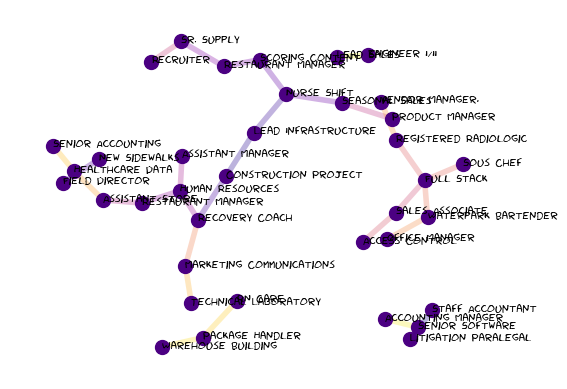

In [59]:
pos = nx.spring_layout(G, k=0.35, seed=6)

# Draw labels with personalized pos
# https://stackoverflow.com/questions/14547388/networkx-in-python-draw-node-attributes-as-labels-outside-the-node

node_sizes = 100
M = G.number_of_edges()
edge_colors = range(2, M + 2)
cmap = plt.cm.plasma

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="indigo")
edges = nx.draw_networkx_edges(
    G,
    pos,
    node_size=node_sizes,
    edge_color=edge_colors,
    edge_cmap=cmap,
    width=4,
)

def truncate_to_two_words(input_string):
    words = input_string.split()
    truncated_string = ' '.join(words[:2])
    return truncated_string

labels = nx.draw_networkx_labels(G, pos, labels={n: truncate_to_two_words(job_name) for n, job_name in
                                 zip(G, df.iloc[unique_edges_list]['title'])}
                              , font_size=8, font_color='k', font_family='fantasy',
                              font_weight='normal', alpha=None, bbox=None, horizontalalignment='left',
                              verticalalignment='baseline', ax=None, clip_on=False)
# set alpha value for each edge
i = 0
for line in edges.get_paths():
    edges.set_alpha(alpha_values[i])
    i = i+1

ax = plt.gca()
ax.set_axis_off()
plt.show()

## Val / Eval / Train Split

### Training Data

In [60]:
# Select the first 13968 nodes (90%)
selected_nodes = data.x[:13968]

# Find the index of the last occurrence of 13968 in the first row

# data.edge_index[0] == 13968: This creates a boolean mask by comparing each element in the first row of data.edge_index
# with the value 13968. The result is a boolean tensor of the same shape as data.edge_index[0], where True indicates
# that the corresponding element is equal to 13968.

# The nonzero function returns a tensor containing the indices where the condition is True.
# The as_tuple=False argument ensures that the result is a tensor rather than a tuple.

# [-1, 0]: This accesses the last row and the first column of the tensor obtained from the previous step.
# This is done to extract the index of the last occurrence of True in the boolean tensor,
# which corresponds to the last occurrence of 13968 in the first row of data.edge_index.

# .item() extracts the scalar tensor as an Integer
last_index = (data.edge_index[0] == 13968).nonzero()
numpy_array = last_index[0]
last_index = numpy_array[-1]
print(last_index)

# Select columns from the first 0 to the last occurrence of 13968 in the first row
# +1 is because the 0...n conviction, where colums in this context are from 1...n+1
selected_edges = data.edge_index[:, :last_index+1]

# Select the first 13968 labels
selected_labels = data.y[:last_index+1]

# Create a new Data object with the selected data
training_data = Data(x=selected_nodes, edge_index=selected_edges, y=selected_labels)

# Print the selected data
print(training_data)

44058652
Data(x=[13968, 255], edge_index=[2, 44058653], y=[44058653])


In [61]:
# Accessing example values
print("Node features (x):", training_data.x[0][-5:])
print("Edge connections (edge_index):", training_data.edge_index[:, -5:])
print("Edge labels (y):", training_data.y[-5:])
print("\n\n\n")

Node features (x): [0 0 0 0 0]
Edge connections (edge_index): [[13968 13968 13968 13968 13968]
 [15463 15473 15502 15505 15519]]
Edge labels (y): [0.46775 0.25    0.1625  0.21775 0.1625 ]






### Testing Data

In [136]:
last_index = (data.edge_index[0] == 15519).nonzero()
numpy_array = last_index[0]
last_index = numpy_array[-1]
print(last_index)

first_index = (data.edge_index[0] == 13969).nonzero()
numpy_array = first_index[0]
first_index = numpy_array[0]
print(first_index)

selected_edges = data.edge_index[:, first_index:last_index+1]

selected_labels = data.y[first_index:last_index+1]

# Create a new Data object with the selected data
testing_data = Data(x=data.x, edge_index=selected_edges, y=selected_labels)

# Print the selected data
print(testing_data)

48806449
44058653
Data(x=[15520, 255], edge_index=[2, 4747797], y=[4747797])


In [63]:
# Accessing example values
print("Node features (x):", testing_data.x[0][:5])
print("Edge connections (edge_index):", testing_data.edge_index[:, :5])
print("Edge labels (y):", testing_data.y[:5])
print("\n\n\n")
print("Node features (x):", testing_data.x[0][-5:])
print("Edge connections (edge_index):", testing_data.edge_index[:, -5:])
print("Edge labels (y):", testing_data.y[-5:])

Node features (x): [77766802 0 0 0 0]
Edge connections (edge_index): [[13969 13969 13969 13969 13969]
 [    3     4    16    31    34]]
Edge labels (y): [0.325   0.575   0.13    0.05    0.21775]




Node features (x): [0 0 0 0 0]
Edge connections (edge_index): [[15519 15519 15519 15519 15519]
 [15504 15505 15516 15517 15518]]
Edge labels (y): [0.25 0.25 0.05 0.05 0.05]


In [64]:
from torch_geometric.loader import DataLoader

#batch_size = 32
#test_loader = DataLoader(testing_data, batch_size=batch_size)
#val_loader = DataLoader(validation_data, batch_size=batch_size)
#train_loader = DataLoader(training_data, batch_size=batch_size)

## Model Creation

In [65]:
from torch_geometric.nn import GCNConv
class Net(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def encode(self, x, edge_index):
        # chaining two convolutions with a standard relu activation
        x = self.conv1(x, edge_index).relu()
        return self.conv2(x, edge_index)

    def decode(self, z, edge_label_index):
        # cosine similarity
        return (z[edge_label_index[0]] * z[edge_label_index[1]]).sum(dim = -1)

## Memory Cleaning


In [66]:
del edges
del df
del edges_matrix
del ones_indices
del possible_pairs
del random_sample_pairs
del last_index
del roles_types
del numpy_array
del first_index
del unique_edges_list
del unique_values
del selected_edges
del selected_labels
gc.collect()

30

In [67]:
del G
del ax
del cmap
del edge_colors
del i
del i_indices
del index
del industry_types
del job_types
del labels
del line
del n
del nan_count
del nan_counts
del node_sizes
del pos
del row_index
del row_indexes
del value
gc.collect()

0

In [68]:
import time
# Let the RAM update
time.sleep(30)

## Training Data Manual Batch Split

In [69]:
%%capture
!pip install tqdm

In [144]:
import torch

# Convert NumPy arrays to PyTorch tensors with compatible data types
x_tensor = torch.tensor(training_data.x.astype(np.float32), dtype=torch.float32)
edge_index_tensor = torch.tensor(training_data.edge_index, dtype=torch.long)

# Assign the tensors to the data object
training_data.x = x_tensor
training_data.edge_index = edge_index_tensor

AttributeError: ignored

In [145]:
# Convert NumPy arrays to PyTorch tensors with compatible data types
x_tensor = torch.tensor(testing_data.x.astype(np.float32), dtype=torch.float32)
edge_index_tensor = torch.tensor(testing_data.edge_index, dtype=torch.long)

# Assign the tensors to the data object
testing_data.x = x_tensor
testing_data.edge_index = edge_index_tensor

In [71]:
import torch
from torch_geometric.data import Data
from tqdm import tqdm

batch_size = 32
num_samples = 13968
# +batch_size in case of needing x.yyy batches, so it would be x+batch_size batches
num_batches = (num_samples + batch_size) // batch_size
subDatas = []
edge_index = training_data.edge_index

for i in tqdm(range(num_batches), desc='Processing', unit='batch'):
    start_idx = i * batch_size
    end_idx = min((i + 1) * batch_size, num_samples)

    # Create a boolean mask for rows where values are within the range [start_idx, end_idx]
    row_mask = (edge_index[0, :] >= start_idx) & (edge_index[0, :] < end_idx) \
            & (edge_index[1, :] >= start_idx) & (edge_index[1, :] < end_idx)

    # Apply the boolean mask to filter rows
    batch_edge_index = edge_index[:, row_mask]
    batch_y = training_data.y[row_mask]

    # Create a new Data object for the batch
    batch_data = Data(x=training_data.x, edge_index=batch_edge_index, y=batch_y)

    # Append the batch Data object to the list
    subDatas.append(batch_data)


Processing: 100%|██████████| 437/437 [05:08<00:00,  1.42batch/s]


In [72]:
print(subDatas)

[Data(x=[13968, 255], edge_index=[2, 214], y=[214]), Data(x=[13968, 255], edge_index=[2, 344], y=[344]), Data(x=[13968, 255], edge_index=[2, 282], y=[282]), Data(x=[13968, 255], edge_index=[2, 196], y=[196]), Data(x=[13968, 255], edge_index=[2, 186], y=[186]), Data(x=[13968, 255], edge_index=[2, 278], y=[278]), Data(x=[13968, 255], edge_index=[2, 212], y=[212]), Data(x=[13968, 255], edge_index=[2, 240], y=[240]), Data(x=[13968, 255], edge_index=[2, 230], y=[230]), Data(x=[13968, 255], edge_index=[2, 612], y=[612]), Data(x=[13968, 255], edge_index=[2, 316], y=[316]), Data(x=[13968, 255], edge_index=[2, 300], y=[300]), Data(x=[13968, 255], edge_index=[2, 202], y=[202]), Data(x=[13968, 255], edge_index=[2, 206], y=[206]), Data(x=[13968, 255], edge_index=[2, 270], y=[270]), Data(x=[13968, 255], edge_index=[2, 284], y=[284]), Data(x=[13968, 255], edge_index=[2, 350], y=[350]), Data(x=[13968, 255], edge_index=[2, 340], y=[340]), Data(x=[13968, 255], edge_index=[2, 258], y=[258]), Data(x=[139

In [73]:
print(subDatas[0].x.shape)

torch.Size([13968, 255])


In [74]:
print(subDatas[0].edge_index.shape)

torch.Size([2, 214])


In [75]:
print(subDatas[1].y)

[0.05    0.25    0.575   0.25    0.25    0.25    0.25    0.25    0.25
 0.575   0.25    0.25    0.25    0.05    0.05    0.1     0.05    0.21775
 0.05    0.05    0.05    0.05    0.05    0.05    0.25    0.05    0.05
 0.3     0.05    0.325   0.25    0.3     0.46775 0.05    0.575   0.46775
 0.25    0.05    0.25    0.3     0.575   0.25    0.1625  0.05    0.05
 0.05    0.05    0.325   0.05    0.21775 0.05    0.21775 0.05    0.3
 0.25    0.25    0.325   0.05    0.325   0.25    0.05    0.21775 0.575
 0.1     0.3     0.05    0.05    0.25    0.3     0.25    0.05    0.25
 0.25    0.25    0.05    0.575   0.3     0.25    0.25    0.05    0.05
 0.325   0.05    0.21775 0.21775 0.325   0.325   0.21775 0.05    0.05
 0.05    0.05    0.05    0.05    0.05    0.05    0.05    0.21775 0.05
 0.43225 0.21775 0.21775 0.21775 0.05    0.21775 0.21775 0.21775 0.325
 0.21775 0.325   0.21775 0.325   0.1625  0.25    0.25    0.25    0.25
 0.25    0.25    0.25    0.25    0.25    0.05    0.25    0.25    0.25
 0.25    0.25

## Training

In [76]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv


# Instantiate the model
num_features = 255
hidden_dim = 64
num_classes = 1
model = Net(num_features, hidden_dim, num_classes)

Graph Neural Networks (GNNs) are often trained using a process known as "negative sampling" to improve their ability to distinguish between positive and negative examples, especially in the context of **link prediction** or node classification tasks. Negative sampling is a technique used to address the **class imbalance inherent** in graph-structured data.

<font color='red'>Negative sampling</font> is relevant primarily for tasks involving binary classification, such as predicting whether an edge should exist between two nodes in a graph. The basic idea is to create negative examples (pairs of nodes that do not have an edge) to balance the <font color='green'>positive examples</font> (pairs of nodes that have an edge). This helps prevent the model from becoming biased towards predicting positive examples, especially when the number of negative examples significantly outweighs the number of positive examples in the dataset.

In this scenario, I'll be using <font color='blue'>Random Negative Sampling</font> as it is a straight-forward class imbalance addresser, especial for dealing with tasks involving binary classification.

In [77]:
import torch
import torch.nn as nn
from torch_geometric.utils import negative_sampling
import plotly.graph_objects as go

criterion = nn.MSELoss()  # Mean Squared Error Loss for regression
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
epochs = 30
min_loss = float('inf')

# Store loss values for plotting
losses = []

for epoch in range(epochs):
    model.train()

    # Forward pass
    for i in range(len(subDatas)):
        optimizer.zero_grad()
        z = model.encode(subDatas[i].x, subDatas[i].edge_index)
        neg_edge_index = negative_sampling(edge_index=subDatas[i].edge_index, num_nodes=subDatas[i].num_nodes,
                                           num_neg_samples=None, method='sparse')
        edge_label_index = torch.cat([subDatas[i].edge_index, neg_edge_index], dim=-1, )
        edge_label = torch.cat([torch.ones(subDatas[i].edge_index.size(1)), torch.zeros(neg_edge_index.size(1))],
                               dim=0)
        out = model.decode(z, edge_label_index).view(-1)
        loss = criterion(out, edge_label)
        loss.backward()
        optimizer.step()
        if loss.item() < min_loss:
            min_loss = loss.item()
            torch.save(model.state_dict(), 'best_model.pth')

    # Append current loss to the list
    losses.append(loss.item())
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}')

# Plotting the loss curve using Plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(1, epochs + 1)), y=losses, mode='lines+markers'))
fig.update_layout(title='Loss Over Epochs', xaxis_title='Epoch', yaxis_title='Loss')
fig.show()

# Load the best model
model = Net(num_features, hidden_dim, num_classes)
model.load_state_dict(torch.load('best_model.pth'))

Epoch 1/30, Loss: 1.0677102291228595e+24
Epoch 2/30, Loss: 8.399026819992605e+24
Epoch 3/30, Loss: 9.230758660819604e+23
Epoch 4/30, Loss: 1.0104788453462054e+24
Epoch 5/30, Loss: 1.3223529754264242e+24
Epoch 6/30, Loss: 1.0971763087072252e+24
Epoch 7/30, Loss: 2.593017309267186e+24
Epoch 8/30, Loss: 5.88741268647969e+24
Epoch 9/30, Loss: 8.922746025146284e+24
Epoch 10/30, Loss: 2.3294352419624639e+24
Epoch 11/30, Loss: 9.944973356797215e+23
Epoch 12/30, Loss: 8.059499939681985e+23
Epoch 13/30, Loss: 2.29375995949985e+24
Epoch 14/30, Loss: 8.599174569653106e+23
Epoch 15/30, Loss: 3.1038837454875074e+24
Epoch 16/30, Loss: 9.08195540567564e+23
Epoch 17/30, Loss: 1.0661397338608029e+24
Epoch 18/30, Loss: 1.1595892099559586e+24
Epoch 19/30, Loss: 5.522850836272473e+24
Epoch 20/30, Loss: 4.415753926248482e+24
Epoch 21/30, Loss: 7.529029226197329e+23
Epoch 22/30, Loss: 9.878550666613053e+23
Epoch 23/30, Loss: 1.3696566241845028e+24
Epoch 24/30, Loss: 4.848671916003087e+24
Epoch 25/30, Loss: 

<All keys matched successfully>

## Evaluation

In [243]:
def find_best_threshold(out, edge_label):
  """
  Finds the best threshold for a negative/positive edges classification task.

  This function iterates over a range of thresholds and calculates the error
  for each threshold. The threshold that minimizes the error is then selected
  as the best threshold.

  Parameters:
    - out (torch.Tensor): Model output tensor.
    - edge_label (torch.Tensor): Ground truth edge labels.

  Returns:
  - Tuple (float, float): A tuple containing the best threshold and the corresponding
    error rate.

  Example:
  ```python
  best_threshold, error_rate = find_best_threshold()
  print(f"Best Threshold: {best_threshold}, Error Rate: {error_rate}")
  ```
  """
  threshold = 1
  error = 1
  for i in np.arange(0, 1, 0.05):
    mask = (out > (torch.mean(out))*i).float()
    new_error = torch.sum(mask != edge_label).item() / len(edge_label)
    if new_error < error:
      threshold = i
      error = new_error
  return round(i, 2), error

threshold, error = find_best_threshold(out, edge_label)
print(threshold, error)

0.95 0.09345794392523364


In [79]:
testing_data.x = torch.from_numpy(testing_data.x.astype(float))
testing_data.edge_index = torch.from_numpy(testing_data.edge_index.astype(float))

In [80]:
testing_data.x = testing_data.x.to(torch.float)
testing_data.edge_index = testing_data.edge_index.to(torch.int64)

In [81]:
print(testing_data.x.shape)
print(testing_data.edge_index)

torch.Size([15520, 255])
tensor([[13969, 13969, 13969,  ..., 15519, 15519, 15519],
        [    3,     4,    16,  ..., 15516, 15517, 15518]])


In [82]:
from sklearn.metrics import roc_auc_score, f1_score
model.eval()
scores = []
z = model.encode(testing_data.x, testing_data.edge_index)
out = model.decode(z, testing_data.edge_index).view(-1)
pred = (out > torch.mean(out)*threshold).float() * 1
score = f1_score(np.ones(testing_data.edge_index.size(1)), pred.cpu().numpy())
scores.append(score)

In [83]:
print(score)

0.6425945621408353


## Predictions

In [246]:
model

Net(
  (conv1): GCNConv(255, 64)
  (conv2): GCNConv(64, 1)
)

In [247]:
def make_a_prediction(gnn_model, max = 1000000, origin=None, destination=None, printing=False):
    """
    Generates predictions of potential edges in a graph using the previously trained GNN model.

    Parameters:
    - gnn_model (Net Class): The model with 'encode' and 'decode' functions to make predictions
    - max (int, optional): Maximum number of predicted edges to generate. Defaults to 1000000.
    - origin (int, optional): If provided, filters the predictions to include only edges originating from this node.
    - destination (int, optional): If provided, filters the predictions to include only edges leading to this node.
    - printing (bool, optional): If True, prints the number of possible edges found in each iteration.

    Returns:
    - numpy.ndarray: Predicted edges in the format of a NumPy array with two columns representing edge indices.

    Note:
    - The function stops predicting edges if the maximum limit (max) is reached.

    Example Usage:
    ```python
    predicted_edges = make_a_prediction(max=1000, origin=3, destination=7, printing=True)
    ```
    """
    pred_edges = []

    for i in range(len(subDatas)):
        z = model.encode(subDatas[i].x, subDatas[i].edge_index)
        neg_edge_index = negative_sampling(edge_index = subDatas[i].edge_index, num_nodes = None, \
                                           num_neg_samples = None, method = 'sparse')
        out = model.decode(z, neg_edge_index)
        pred = ((out > torch.mean(out)*threshold).float()).cpu().numpy()
        found = np.argwhere(pred == 1)
        if printing:
          print("Found: {z} possible edges in iteration {j}".format(z=found.size, j=i))
        if found.size > 0:
            edge_tuples = neg_edge_index.t().cpu().numpy()
            select_index = found.reshape(1, found.size)[0]
            edges = edge_tuples[select_index]
            pred_edges += edges.tolist()
            if len(pred_edges) >= max:
                break

    if origin is not None and destination is not None:
      pred_edges = np.array(pred_edges)
      index = np.where((pred_edges[:, 0] == origin) & (pred_edges[:, 1] == destination))
      if index[0].size == 0:
          print("Model predicted no connection between {i}, {j}".format(i=origin, j=destination))
      else:
          print("Found connection between {i}, {j} at {k}".format(i=origin, j=destination, k=index[0]))
      return pred_edges
    else:
      return pred_edges

    return None

In [248]:
pred = make_a_prediction(model, origin=8, destination=2)

Found connection between 8, 2 at [43]


In [86]:
print(len(pred))

12037


In [87]:
pred[22]

array([28,  5])

 # XGBoost

 Now that the GNN model can predict wheter it's most likely that there will be a connection between nodes in the graph, we can now apply a regression non-linear model to predict the weights of such connections.

In [88]:
final_weights_matrix

array([[0.    , 0.    , 0.575 , ..., 0.    , 0.325 , 0.    ],
       [0.    , 0.    , 0.05  , ..., 0.    , 0.    , 0.    ],
       [0.575 , 0.05  , 0.    , ..., 0.    , 0.325 , 0.1625],
       ...,
       [0.    , 0.    , 0.    , ..., 0.    , 0.05  , 0.05  ],
       [0.325 , 0.    , 0.325 , ..., 0.05  , 0.    , 0.05  ],
       [0.    , 0.    , 0.1625, ..., 0.05  , 0.05  , 0.    ]])

In [89]:
print(x.shape, final_weights_matrix.shape)

(15520, 255) (15520, 15520)


In [90]:
%%capture
!pip install xgboost

## Training

In [91]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, final_weights_matrix, test_size=0.2, random_state=42)

# Convert the data into DMatrix format, which is the internal data structure used by XGBoost
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

# Define XGBoost parameters
params = {
    'objective': 'reg:squarederror',
    'max_depth': 3,  # Maximum depth of a tree.
    'learning_rate': 0.1,
    'n_estimators': 100  # Number of trees
}

model2 = xgb.train(params, dtrain)
model2.save_model('xgboost_model.model')
model2 = xgb.Booster()
model2.load_model('xgboost_model.model')

loaded_predictions = model2.predict(dtest)
mse = mean_squared_error(y_test, loaded_predictions)
print(f'Mean Squared Error on Test Set: {mse}')


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[19:27:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[19:46:23] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.



Mean Squared Error on Test Set: 0.00217068602687693


In [105]:
x_test

array([[1766026, 0, 1, ..., 0, 386, 22],
       [2723, 0, 5, ..., 0, 110, 34],
       [164401, 1, 36, ..., 0, 67, 24],
       ...,
       [34208, 0, 0, ..., 0, 255, 20],
       [14133, 0, 2, ..., 0, 1744, 15],
       [71350, 1, 0, ..., 0, 13, 9]], dtype=object)

## Prediction

In [92]:
def make_weight_prediction(xgboost_model ,job, printing = False):
  """
  Make weight predictions using an XGBoost model.

  Parameters:
  - xgboost_model (xgb.Booster): The trained XGBoost model used for predictions.
  - job (xgb.DMatrix or array-like): The input data for which weight predictions are to be made.
      If not already an xgb.DMatrix, it will be converted to one.
  - printing (bool, optional): If True, print additional information about the predictions.
      Default is False.

  Returns:
  - predictions (numpy.ndarray): The predicted output, representing the correlation
    of the new data for all existing nodes.

  Example:
  >>> model = xgb.Booster()  # Replace with your trained XGBoost model
  >>> input_data = np.array([[...]])  # Replace with your input data
  >>> predictions = make_weight_prediction(model, input_data, printing=True)
  """
  if not isinstance(job, xgb.DMatrix):
    job = xgb.DMatrix(job)
  predictions = xgboost_model.predict(job)
  if printing:
    print("Predicted output (Correlation of the new data for all existing nodes):", predictions, predictions.shape)
    print("Difference mean: ", np.mean(predictions - final_weights_matrix[51]))
  return predictions

# Input array must have a shape of (1, 255)
predictions = make_weight_prediction(model2, np.array(x[51])[np.newaxis, :], True)

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.02061538 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0018090308011941528


# Final Combined Model

Now that we have bot GNN that predicts all the possible edges between nodes inside the graph, and we also the XGBoost model that predicts edges weights, we can now create the ending point of our model that will be used for making either whole graph edges and edges weights predictions, or, to make an specific prediction of the edge and weight between node A and B.

In [210]:
edge_index = testing_data.edge_index
start_idx = 15300
end_idx = 15519

# Create a boolean mask for rows where values are within the range [start_idx, end_idx]
row_mask = (edge_index[0, :] >= start_idx) & (edge_index[0, :] < end_idx) \
        & (edge_index[1, :] >= start_idx) & (edge_index[1, :] < end_idx)

# Apply the boolean mask to filter rows
batch_edge_index = edge_index[:, row_mask]
batch_y = testing_data.y[row_mask]

# Create a new Data object for sampling
sample_data = Data(x=testing_data.x, edge_index=batch_edge_index, y=batch_y)
testing_data

Data(x=[15520, 255], edge_index=[2, 4747797], y=[4747797])

In [211]:
sample_data

Data(x=[15520, 255], edge_index=[2, 9692], y=[9692])

In [250]:
def predict_edges_and_weights(threshold, xgboost_model, gnn_model, data, printing=False, origin=None, destination=None):
  """
  Predicts potential edges and their weights using a combination of graph neural network (GNN) and XGBoost models.

  Parameters:
  - threshold (float): The threshold value to determine the presence of an edge based on the GNN predictions.
  - xgboost_model: The pre-trained XGBoost model for edge weight prediction.
  - gnn_model: The pre-trained GNN model for edge presence prediction.
  - data: The input graph data containing features (data.x), edge indices (data.edge_index), and other information.
  - printing (bool, optional): If True, print additional information during execution. Default is False.
  - origin (int, optional): If provided, checks for predicted edges originating from this node.
  - destination (int, optional): If provided, checks for predicted edges leading to this node.

  Returns:
  - pred_edges (list): List of predicted edges in the format [(node1, node2), ...].
  - pred_weights (list): List of predicted weights corresponding to each edge in pred_edges.

  If origin and destination are provided:
  - If a connection is found between the specified nodes, returns (pred_edges, pred_weights).
  - If no connection is found, prints a message and returns None.

  If origin and destination are not provided:
  - Returns (pred_edges, pred_weights).

  If no predicted edges are found, returns None.
  """
  pred_edges = []
  pred_weights = []
  z = gnn_model.encode(data.x, data.edge_index)
  neg_edge_index = negative_sampling(edge_index=data.edge_index, num_nodes=data.num_nodes,
                                      num_neg_samples=None, method='sparse')
  edge_label_index = torch.cat([data.edge_index, neg_edge_index], dim=-1, )
  edge_label = torch.cat([torch.ones(data.edge_index.size(1)), torch.zeros(neg_edge_index.size(1))],
                          dim=0)
  out = gnn_model.decode(z, edge_label_index).view(-1)
  pred = ((out > torch.mean(out)*threshold).float()).cpu().numpy()
  if printing:
    edge_label = torch.cat([torch.ones(data.edge_index.size(1)), torch.zeros(neg_edge_index.size(1))],
                           dim=0)
    print("Error = {z}".format(z=\
    torch.sum((out > torch.mean(out)*threshold).float() != edge_label).item() / len(edge_label)))
  found = np.argwhere(pred == 1)
  if printing:
    print("Found: {z} possible edges".format(z=found.size))
  if found.size > 0:
      edge_tuples = edge_label_index.t().cpu().numpy()
      select_index = found.reshape(1, found.size)[0]
      pred_edges += edge_tuples[select_index].tolist()

  for count, _ in enumerate(tqdm(pred_edges, desc="Processing Edges", unit="edge")):
    weights_matrix = make_weight_prediction(xgboost_model, np.array(data.x[pred_edges[count][0]])[np.newaxis, :],\
                                            printing)
    edge_weight = list(weights_matrix)[0][pred_edges[count][1]]
    pred_weights.append(edge_weight)

  if origin is not None and destination is not None:
    pred_edges = np.array(pred_edges)
    index = np.where((pred_edges[:, :] == origin) & (pred_edges[:, :] == destination))
    if index[0].size == 0:
        print("Model predicted no connection between {i}, {j}".format(i=origin, j=destination))
    else:
        print("Found connection between {i}, {j} at {k}".format(i=origin, j=destination, k=index[0]))
    return pred_edges, pred_weights
  else:
    return pred_edges, pred_weights

  return None

In [206]:
predictions2 = predict_edges_and_weights(threshold, model2, model, sample_data, printing=True, origin=15450, destination=15511)

Error = 0.4214300453982666
Found: 3573 possible edges


Processing Edges:   0%|          | 2/3573 [00:00<04:25, 13.44edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.002394411400538513
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.002394411400538513
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.002394411400538513


Processing Edges:   0%|          | 4/3573 [00:00<05:25, 10.96edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.002394411400538513
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.002394411400538513


Processing Edges:   0%|          | 6/3573 [00:00<06:06,  9.75edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.002394411400538513
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.002394411400538513


Processing Edges:   0%|          | 8/3573 [00:00<06:25,  9.24edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015


Processing Edges:   0%|          | 9/3573 [00:00<06:44,  8.81edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015


Processing Edges:   0%|          | 11/3573 [00:01<06:41,  8.87edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015


Processing Edges:   0%|          | 12/3573 [00:01<06:48,  8.71edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015


Processing Edges:   0%|          | 13/3573 [00:01<06:39,  8.92edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015


Processing Edges:   0%|          | 14/3573 [00:01<06:37,  8.96edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015


Processing Edges:   0%|          | 15/3573 [00:01<07:11,  8.25edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015


Processing Edges:   0%|          | 16/3573 [00:01<07:17,  8.12edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015


Processing Edges:   0%|          | 17/3573 [00:01<07:15,  8.17edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)

Processing Edges:   1%|          | 19/3573 [00:02<05:46, 10.26edge/s]


Difference mean:  -0.0006888901293897015
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015


Processing Edges:   1%|          | 21/3573 [00:02<05:52, 10.08edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015


Processing Edges:   1%|          | 23/3573 [00:02<05:47, 10.22edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015


Processing Edges:   1%|          | 25/3573 [00:02<04:54, 12.06edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015


Processing Edges:   1%|          | 27/3573 [00:02<04:43, 12.52edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015


Processing Edges:   1%|          | 29/3573 [00:02<05:01, 11.74edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015


Processing Edges:   1%|          | 31/3573 [00:03<05:21, 11.01edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015


Processing Edges:   1%|          | 35/3573 [00:03<05:04, 11.60edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015


Processing Edges:   1%|          | 37/3573 [00:03<05:25, 10.85edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015


Processing Edges:   1%|          | 41/3573 [00:03<04:51, 12.10edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015


Processing Edges:   1%|          | 43/3573 [00:04<04:32, 12.96edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015


Processing Edges:   1%|▏         | 47/3573 [00:04<04:18, 13.62edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015


Processing Edges:   1%|▏         | 51/3573 [00:04<03:42, 15.86edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015


Processing Edges:   2%|▏         | 56/3573 [00:04<03:21, 17.46edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015


Processing Edges:   2%|▏         | 60/3573 [00:05<03:16, 17.91edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015


Processing Edges:   2%|▏         | 64/3573 [00:05<03:13, 18.18edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015


Processing Edges:   2%|▏         | 68/3573 [00:05<03:13, 18.11edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015


Processing Edges:   2%|▏         | 72/3573 [00:05<03:41, 15.82edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006888901293897015
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01626867532535149
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01626867532535149
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01626867532535149


Processing Edges:   2%|▏         | 76/3573 [00:06<03:31, 16.52edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01626867532535149
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01626867532535149
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01626867532535149
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01626867532535149


Processing Edges:   2%|▏         | 80/3573 [00:06<03:19, 17.52edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01626867532535149
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01626867532535149
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01626867532535149
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01626867532535149


Processing Edges:   2%|▏         | 84/3573 [00:06<03:33, 16.32edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01626867532535149
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01626867532535149
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01626867532535149
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01626867532535149


Processing Edges:   2%|▏         | 86/3573 [00:06<04:34, 12.72edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01626867532535149
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01626867532535149


Processing Edges:   2%|▏         | 88/3573 [00:06<05:22, 10.80edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01626867532535149
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01626867532535149


Processing Edges:   3%|▎         | 90/3573 [00:07<05:40, 10.24edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01626867532535149
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01626867532535149
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01626867532535149


Processing Edges:   3%|▎         | 95/3573 [00:07<04:12, 13.76edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01626867532535149
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01626867532535149
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01626867532535149
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01626867532535149
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01626867532535149
Predicted output (Correla

Processing Edges:   3%|▎         | 101/3573 [00:07<02:59, 19.39edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01626867532535149
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01626867532535149
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01626867532535149
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01626867532535149
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01626867532535149
Predicted output (Correla

Processing Edges:   3%|▎         | 107/3573 [00:07<02:27, 23.51edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01626867532535149
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01626867532535149
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01626867532535149
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01626867532535149
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01626867532535149
Predicted output (Correla

Processing Edges:   3%|▎         | 113/3573 [00:08<02:13, 25.84edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01626867532535149
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01626867532535149
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01626867532535149
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01626867532535149
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01626867532535149
Predicted output (Correla

Processing Edges:   3%|▎         | 119/3573 [00:08<02:07, 27.09edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.1272362  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.013220355413145549
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.1272362  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.013220355413145549
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.1272362  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.013220355413145549
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.1272362  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.013220355413145549
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.1272362  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.013220355413145549
Predicted output (Co

Processing Edges:   3%|▎         | 125/3573 [00:08<02:08, 26.89edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation 

Processing Edges:   4%|▎         | 131/3573 [00:08<02:03, 27.79edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation 

Processing Edges:   4%|▍         | 137/3573 [00:08<02:01, 28.20edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation 

Processing Edges:   4%|▍         | 144/3573 [00:09<02:00, 28.39edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.21778277 0.02832403]] (1, 15520)
Difference mean:  -0.007156823745733798
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.21778277 0.02832403]] (1, 15520)
Difference mean:  -0.007156823745733798
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.21778277 0.02832403]] (1, 15520)
Difference mean:  -0.007156823745733798
Predicted output (Correl

Processing Edges:   4%|▍         | 150/3573 [00:09<02:05, 27.23edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.21778277 0.02832403]] (1, 15520)
Difference mean:  -0.007156823745733798
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.21778277 0.02832403]] (1, 15520)
Difference mean:  -0.007156823745733798
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.21778277 0.02832403]] (1, 15520)
Difference mean:  -0.007156823745733798
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.21778277 0.02832403]] (1, 15520)
Difference mean:  -0.007156823745733798
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.02327336492424437
Predicted output (Cor

Processing Edges:   4%|▍         | 156/3573 [00:09<02:03, 27.70edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.02327336492424437
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.02327336492424437
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.02327336492424437
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.02327336492424437
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.02327336492424437
Predicted output (Correla

Processing Edges:   5%|▍         | 162/3573 [00:09<02:07, 26.82edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.02327336492424437
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.02327336492424437
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.02327336492424437
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.02327336492424437
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.02327336492424437
Predicted output (Correla

Processing Edges:   5%|▍         | 168/3573 [00:10<02:04, 27.41edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.02327336492424437
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.02327336492424437
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.02327336492424437
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.02327336492424437
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.02327336492424437
Predicted output (Correla

Processing Edges:   5%|▍         | 174/3573 [00:10<02:02, 27.81edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.02327336492424437
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.02327336492424437
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.02327336492424437
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.02327336492424437
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.02327336492424437
Predicted output (Correla

Processing Edges:   5%|▌         | 180/3573 [00:10<02:06, 26.90edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.02327336492424437
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.02327336492424437
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.02327336492424437
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.02327336492424437
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.02327336492424437
Predicted output (Correla

Processing Edges:   5%|▌         | 186/3573 [00:10<02:03, 27.37edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.02327336492424437
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.02327336492424437
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.02327336492424437
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.02327336492424437
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.02327336492424437
Predicted output (Correla

Processing Edges:   5%|▌         | 192/3573 [00:10<02:01, 27.87edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.02327336492424437
Predicted output (Correlation of the new data for all existing nodes): [[0.3406482  0.01557491 0.18194193 ... 0.01943613 0.0184606  0.11232554]] (1, 15520)
Difference mean:  0.006969700376844495
Predicted output (Correlation of the new data for all existing nodes): [[0.3406482  0.01557491 0.18194193 ... 0.01943613 0.0184606  0.11232554]] (1, 15520)
Difference mean:  0.006969700376844495
Predicted output (Correlation of the new data for all existing nodes): [[0.3406482  0.01557491 0.18194193 ... 0.01943613 0.0184606  0.11232554]] (1, 15520)
Difference mean:  0.006969700376844495
Predicted output (Correlation of the new data for all existing nodes): [[0.3406482  0.01557491 0.18194193 ... 0.01943613 0.0184606  0.11232554]] (1, 15520)
Difference mean:  0.006969700376844495
Predicted output (Correla

Processing Edges:   6%|▌         | 198/3573 [00:11<01:59, 28.14edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.3406482  0.01557491 0.18194193 ... 0.01943613 0.0184606  0.11232554]] (1, 15520)
Difference mean:  0.006969700376844495
Predicted output (Correlation of the new data for all existing nodes): [[0.3406482  0.01557491 0.18194193 ... 0.01943613 0.0184606  0.11232554]] (1, 15520)
Difference mean:  0.006969700376844495
Predicted output (Correlation of the new data for all existing nodes): [[0.3406482  0.01557491 0.18194193 ... 0.01943613 0.0184606  0.11232554]] (1, 15520)
Difference mean:  0.006969700376844495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0047557835381895714
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0047557835381895714
Predicted output (Cor

Processing Edges:   6%|▌         | 204/3573 [00:11<01:59, 28.08edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0047557835381895714
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0047557835381895714
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0047557835381895714
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0047557835381895714
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0047557835381895714
Predicted outpu

Processing Edges:   6%|▌         | 210/3573 [00:11<02:02, 27.55edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.02063069709146482
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.02063069709146482
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.02063069709146482
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.02063069709146482
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.02063069709146482
Predicted output (Correla

Processing Edges:   6%|▌         | 216/3573 [00:11<01:59, 27.98edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00626039555958117
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00626039555958117
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00626039555958117
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00626039555958117
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00626039555958117
Predicted output (Correlation 

Processing Edges:   6%|▌         | 222/3573 [00:12<01:59, 28.13edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00626039555958117
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00626039555958117
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00626039555958117
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00626039555958117
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00626039555958117
Predicted output (Correlation 

Processing Edges:   6%|▋         | 228/3573 [00:12<01:59, 27.97edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.3406482  0.01557491 0.18194193 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005556657788116179
Predicted output (Correlation of the new data for all existing nodes): [[0.3406482  0.01557491 0.18194193 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005556657788116179
Predicted output (Correlation of the new data for all existing nodes): [[0.3406482  0.01557491 0.18194193 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005556657788116179
Predicted output (Correlation of the new data for all existing nodes): [[0.3406482  0.01557491 0.18194193 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005556657788116179
Predicted output (Correlation of the new data for all existing nodes): [[0.3406482  0.01557491 0.18194193 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005556657788116179
Predicted output (Correla

Processing Edges:   7%|▋         | 234/3573 [00:12<01:57, 28.38edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.3406482  0.01557491 0.18194193 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005556657788116179
Predicted output (Correlation of the new data for all existing nodes): [[0.3406482  0.01557491 0.18194193 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005556657788116179
Predicted output (Correlation of the new data for all existing nodes): [[0.3406482  0.01557491 0.18194193 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005556657788116179
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01472821299828656
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01472821299828656
Predicted output (Correla

Processing Edges:   7%|▋         | 240/3573 [00:12<01:58, 28.22edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01472821299828656
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01472821299828656
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01472821299828656
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01472821299828656
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01472821299828656
Predicted output (Correla

Processing Edges:   7%|▋         | 246/3573 [00:12<01:57, 28.20edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01472821299828656
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01472821299828656
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01472821299828656
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01472821299828656
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.021215714216971115
Predicted output (Correl

Processing Edges:   7%|▋         | 252/3573 [00:13<01:58, 28.00edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.021215714216971115
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.021215714216971115
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.021215714216971115
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.021215714216971115
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.021215714216971115
Predicted output (Co

Processing Edges:   7%|▋         | 258/3573 [00:13<01:59, 27.70edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.021215714216971115
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.021215714216971115
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.021215714216971115
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.021215714216971115
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.021215714216971115
Predicted output (Co

Processing Edges:   7%|▋         | 264/3573 [00:13<02:02, 26.95edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.021215714216971115
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.021215714216971115
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.021215714216971115
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.021215714216971115
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.021215714216971115
Predicted output (Co

Processing Edges:   8%|▊         | 270/3573 [00:13<02:02, 26.96edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.021215714216971115
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.021215714216971115
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.021215714216971115
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.021215714216971115
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.021215714216971115
Predicted output (Co

Processing Edges:   8%|▊         | 276/3573 [00:14<02:01, 27.13edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.021215714216971115
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.021215714216971115
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.021215714216971115
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.021215714216971115
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.021215714216971115
Predicted output (Co

Processing Edges:   8%|▊         | 282/3573 [00:14<02:07, 25.85edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.021215714216971115
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.021215714216971115
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.021215714216971115
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.021215714216971115
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.021215714216971115


Processing Edges:   8%|▊         | 285/3573 [00:14<02:19, 23.53edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.021215714216971115
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.021215714216971115
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.021215714216971115
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.021215714216971115
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  

Processing Edges:   8%|▊         | 288/3573 [00:14<02:31, 21.67edge/s]

-0.021215714216971115
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.021215714216971115
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.021215714216971115
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.021215714216971115


Processing Edges:   8%|▊         | 294/3573 [00:14<02:35, 21.07edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.021215714216971115
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.021215714216971115
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  0.0049962759209422345
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  0.0049962759209422345
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  0.01113210987142988


Processing Edges:   8%|▊         | 300/3573 [00:15<02:37, 20.74edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  0.01113210987142988
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  0.01113210987142988
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  0.01113210987142988
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  0.01113210987142988
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  0.01113210987142988


Processing Edges:   8%|▊         | 303/3573 [00:15<02:38, 20.60edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  0.01113210987142988
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  0.01113210987142988
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.21778277 0.02832403]] (1, 15520)
Difference mean:  -0.008283864291314726
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.21778277 0.02832403]] (1, 15520)
Difference mean:  -0.008283864291314726
Predicted output (Correlation of the new data for all existing nodes):

Processing Edges:   9%|▊         | 309/3573 [00:15<02:40, 20.32edge/s]

 [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.21778277 0.02832403]] (1, 15520)
Difference mean:  -0.008283864291314726
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.21778277 0.02832403]] (1, 15520)
Difference mean:  -0.008283864291314726
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.21778277 0.02832403]] (1, 15520)
Difference mean:  -0.008283864291314726
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.21778277 0.02832403]] (1, 15520)
Difference mean:  -0.008283864291314726
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.21778277 0.02832403]] (1, 15520)
Difference mean:  -0.008283864291314726


Processing Edges:   9%|▊         | 312/3573 [00:15<02:41, 20.17edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.21778277 0.02832403]] (1, 15520)
Difference mean:  -0.008283864291314726
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.21778277 0.02832403]] (1, 15520)
Difference mean:  -0.008283864291314726
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.21778277 0.02832403]] (1, 15520)
Difference mean:  -0.008283864291314726
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147


Processing Edges:   9%|▉         | 318/3573 [00:16<02:43, 19.94edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147


Processing Edges:   9%|▉         | 322/3573 [00:16<02:46, 19.58edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147


Processing Edges:   9%|▉         | 327/3573 [00:16<02:44, 19.69edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147


Processing Edges:   9%|▉         | 331/3573 [00:16<02:46, 19.48edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147


Processing Edges:   9%|▉         | 336/3573 [00:16<02:42, 19.86edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147


Processing Edges:  10%|▉         | 341/3573 [00:17<02:40, 20.15edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147


Processing Edges:  10%|▉         | 344/3573 [00:17<02:39, 20.27edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147


Processing Edges:  10%|▉         | 350/3573 [00:17<02:34, 20.80edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147


Processing Edges:  10%|▉         | 356/3573 [00:17<02:36, 20.56edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147


Processing Edges:  10%|█         | 359/3573 [00:18<02:34, 20.80edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147


Processing Edges:  10%|█         | 365/3573 [00:18<02:35, 20.67edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]]

Processing Edges:  10%|█         | 368/3573 [00:18<02:35, 20.62edge/s]

 (1, 15520)
Difference mean:  0.010088512855023147
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147


Processing Edges:  10%|█         | 374/3573 [00:18<02:42, 19.66edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147


Processing Edges:  11%|█         | 379/3573 [00:19<02:31, 21.04edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.010088512855023147
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.015291217199675066
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.015291217199675066
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.015291217199675066


Processing Edges:  11%|█         | 385/3573 [00:19<02:13, 23.90edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.015291217199675066
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.015291217199675066
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.015291217199675066
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.015291217199675066
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.015291217199675066
Predicted output (Co

Processing Edges:  11%|█         | 391/3573 [00:19<02:03, 25.81edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.015291217199675066
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.015291217199675066
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.015291217199675066
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.015291217199675066
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.015291217199675066
Predicted output (Co

Processing Edges:  11%|█         | 397/3573 [00:19<01:58, 26.84edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.015291217199675066
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.015291217199675066
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.015291217199675066
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.015291217199675066
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.015291217199675066
Predicted output (Co

Processing Edges:  11%|█▏        | 403/3573 [00:19<01:59, 26.50edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.015291217199675066
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.015291217199675066
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.015291217199675066
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.015291217199675066
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.015291217199675066
Predicted output (Co

Processing Edges:  11%|█▏        | 409/3573 [00:20<01:55, 27.37edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.015291217199675066
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.015291217199675066
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.015291217199675066
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.015291217199675066
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.015291217199675066
Predicted output (Co

Processing Edges:  12%|█▏        | 415/3573 [00:20<01:53, 27.92edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.015291217199675066
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.015291217199675066
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.015291217199675066
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.015291217199675066
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.015291217199675066
Predicted output (Co

Processing Edges:  12%|█▏        | 421/3573 [00:20<01:51, 28.18edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.015291217199675066
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.015291217199675066
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.015291217199675066
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.015291217199675066
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.015291217199675066
Predicted output (Co

Processing Edges:  12%|█▏        | 427/3573 [00:20<01:51, 28.25edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.010785065388443312
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.010785065388443312
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.010785065388443312
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.010785065388443312
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.010785065388443312
Predicted output (Co

Processing Edges:  12%|█▏        | 433/3573 [00:21<01:55, 27.11edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.20302196 0.01858346]] (1, 15520)
Difference mean:  -0.00474302200647983
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.20302196 0.01858346]] (1, 15520)
Difference mean:  -0.00474302200647983
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.20302196 0.01858346]] (1, 15520)
Difference mean:  -0.00474302200647983
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.20302196 0.01858346]] (1, 15520)
Difference mean:  -0.00474302200647983
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  0.001974553829448337
Predicted output (Correla

Processing Edges:  12%|█▏        | 439/3573 [00:21<01:56, 27.00edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  0.001974553829448337
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  0.001974553829448337
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  0.001974553829448337
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  0.001974553829448337
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  0.001974553829448337
Predicted output (Correla

Processing Edges:  12%|█▏        | 445/3573 [00:21<01:54, 27.32edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  0.001974553829448337
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  0.001974553829448337
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  0.001974553829448337
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  0.001974553829448337
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  0.001974553829448337
Predicted output (Correla

Processing Edges:  13%|█▎        | 451/3573 [00:21<01:54, 27.30edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  0.001974553829448337
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  0.001974553829448337
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  0.001974553829448337
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  0.001974553829448337
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  0.001974553829448337
Predicted output (Correla

Processing Edges:  13%|█▎        | 457/3573 [00:21<01:57, 26.57edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  0.001974553829448337
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  0.001974553829448337
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  0.001974553829448337
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  0.001974553829448337
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  0.001974553829448337
Predicted output (Correla

Processing Edges:  13%|█▎        | 463/3573 [00:22<01:55, 26.95edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  0.001974553829448337
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  0.001974553829448337
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  0.001974553829448337
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  0.001974553829448337
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  0.001974553829448337
Predicted output (Correla

Processing Edges:  13%|█▎        | 469/3573 [00:22<01:56, 26.72edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  0.001974553829448337
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  0.001974553829448337
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  0.001974553829448337
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  0.001974553829448337
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  0.001974553829448337
Predicted output (Correla

Processing Edges:  13%|█▎        | 475/3573 [00:22<01:53, 27.32edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  0.001974553829448337
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  0.001974553829448337
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  0.001974553829448337
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  0.001974553829448337
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  0.001974553829448337
Predicted output (Correla

Processing Edges:  13%|█▎        | 481/3573 [00:22<01:51, 27.72edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  0.001974553829448337
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  0.001974553829448337
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  0.001974553829448337
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  0.001974553829448337
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  0.001974553829448337
Predicted output (Correla

Processing Edges:  14%|█▎        | 487/3573 [00:23<01:55, 26.80edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  0.001974553829448337
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  0.001974553829448337
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  0.001974553829448337
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  0.001974553829448337
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.00714819583298408
Predicted output (Correla

Processing Edges:  14%|█▍        | 493/3573 [00:23<01:52, 27.48edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.00714819583298408
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.00714819583298408
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.00714819583298408
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.00714819583298408
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.15854988 0.02754572 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.012175810707730154
Predicted output (Correl

Processing Edges:  14%|█▍        | 499/3573 [00:23<01:51, 27.66edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.15854988 0.02754572 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.012175810707730154
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.15854988 0.02754572 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.012175810707730154
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.15854988 0.02754572 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.012175810707730154
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.15854988 0.02754572 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.012175810707730154
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.15854988 0.02754572 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.012175810707730154
Predicted output (Co

Processing Edges:  14%|█▍        | 505/3573 [00:23<01:51, 27.59edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.15854988 0.02754572 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.012175810707730154
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.15854988 0.02754572 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.012175810707730154
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.15854988 0.02754572 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.012175810707730154
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.15854988 0.02754572 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.012175810707730154
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.15854988 0.02754572 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.012175810707730154
Predicted output (Co

Processing Edges:  14%|█▍        | 511/3573 [00:23<01:48, 28.23edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.15854988 0.02754572 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.012175810707730154
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.15854988 0.02754572 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.012175810707730154
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.15854988 0.02754572 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.012175810707730154
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.15854988 0.02754572 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.012175810707730154
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.15854988 0.02754572 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.012175810707730154
Predicted output (Co

Processing Edges:  14%|█▍        | 517/3573 [00:24<01:49, 27.95edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.15854988 0.02754572 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.012175810707730154
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.15854988 0.02754572 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.012175810707730154
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.15854988 0.02754572 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.012175810707730154
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.15854988 0.02754572 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.012175810707730154
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.15854988 0.02754572 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.012175810707730154
Predicted output (Co

Processing Edges:  15%|█▍        | 523/3573 [00:24<01:48, 28.18edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.15854988 0.02754572 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.012175810707730154
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.15854988 0.02754572 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.012175810707730154
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.15854988 0.02754572 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.012175810707730154
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.15854988 0.02754572 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.012175810707730154
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.15854988 0.02754572 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.012175810707730154
Predicted output (Co

Processing Edges:  15%|█▍        | 529/3573 [00:24<01:48, 27.99edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.15854988 0.02754572 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.012175810707730154
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.15854988 0.02754572 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.012175810707730154
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.15854988 0.02754572 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.012175810707730154
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.15854988 0.02754572 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.012175810707730154
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.15854988 0.02754572 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.012175810707730154
Predicted output (Co

Processing Edges:  15%|█▍        | 535/3573 [00:24<01:47, 28.29edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.15854988 0.02754572 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.012175810707730154
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.15854988 0.02754572 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.012175810707730154
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.15854988 0.02754572 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.012175810707730154
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.15854988 0.02754572 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.012175810707730154
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.15854988 0.02754572 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.012175810707730154
Predicted output (Co

Processing Edges:  15%|█▌        | 541/3573 [00:24<01:49, 27.76edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.15854988 0.02754572 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.012175810707730154
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.15854988 0.02754572 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.012175810707730154
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.15854988 0.02754572 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.012175810707730154
Predicted output (Correlation of the new data for all existing nodes): [[0.34248748 0.01557491 0.34912038 ... 0.01943613 0.20581856 0.01858346]] (1, 15520)
Difference mean:  0.012253686422235382
Predicted output (Correlation of the new data for all existing nodes): [[0.34248748 0.01557491 0.34912038 ... 0.01943613 0.20581856 0.01858346]] (1, 15520)
Difference mean:  0.012253686422235382
Predicted output (Corr

Processing Edges:  15%|█▌        | 547/3573 [00:25<01:49, 27.60edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.34248748 0.01557491 0.34912038 ... 0.01943613 0.20581856 0.01858346]] (1, 15520)
Difference mean:  0.012253686422235382
Predicted output (Correlation of the new data for all existing nodes): [[0.34248748 0.01557491 0.34912038 ... 0.01943613 0.20581856 0.01858346]] (1, 15520)
Difference mean:  0.012253686422235382
Predicted output (Correlation of the new data for all existing nodes): [[0.34248748 0.01557491 0.34912038 ... 0.01943613 0.20581856 0.01858346]] (1, 15520)
Difference mean:  0.012253686422235382
Predicted output (Correlation of the new data for all existing nodes): [[0.34248748 0.01557491 0.34912038 ... 0.01943613 0.20581856 0.01858346]] (1, 15520)
Difference mean:  0.012253686422235382
Predicted output (Correlation of the new data for all existing nodes): [[0.34248748 0.01557491 0.34912038 ... 0.01943613 0.20581856 0.01858346]] (1, 15520)
Difference mean:  0.012253686422235382
Predicted output (Correla

Processing Edges:  15%|█▌        | 553/3573 [00:25<01:46, 28.26edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.027375612476266457
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01635473771908359
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01635473771908359
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01635473771908359
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01635473771908359
Predicted output (Correl

Processing Edges:  16%|█▌        | 559/3573 [00:25<01:46, 28.36edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01635473771908359
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01635473771908359
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01635473771908359
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01635473771908359
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01635473771908359
Predicted output (Correla

Processing Edges:  16%|█▌        | 565/3573 [00:25<01:45, 28.56edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01635473771908359
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01635473771908359
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01635473771908359
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01635473771908359
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01635473771908359
Predicted output (Correla

Processing Edges:  16%|█▌        | 571/3573 [00:26<01:48, 27.73edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01635473771908359
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01635473771908359
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01635473771908359
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01635473771908359
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01635473771908359
Predicted output (Correla

Processing Edges:  16%|█▌        | 577/3573 [00:26<01:47, 27.90edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.1446816  0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.027074943141725642
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.1446816  0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.027074943141725642
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.1446816  0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.027074943141725642
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.1446816  0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.027074943141725642
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.1446816  0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.027074943141725642
Predicted output (Co

Processing Edges:  16%|█▋        | 583/3573 [00:26<01:46, 28.15edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014927222657122543
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014927222657122543
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014927222657122543
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014927222657122543
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014927222657122543
Predicted output (Co

Processing Edges:  16%|█▋        | 589/3573 [00:26<01:46, 27.93edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014927222657122543
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014927222657122543
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014927222657122543
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014927222657122543
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014927222657122543
Predicted output (Co

Processing Edges:  17%|█▋        | 595/3573 [00:26<01:47, 27.76edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014927222657122543
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014927222657122543
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014927222657122543
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014927222657122543
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014927222657122543
Predicted output (Co

Processing Edges:  17%|█▋        | 601/3573 [00:27<01:48, 27.36edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014927222657122543
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014927222657122543
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014927222657122543
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014927222657122543
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014927222657122543
Predicted output (Co

Processing Edges:  17%|█▋        | 607/3573 [00:27<01:47, 27.48edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014927222657122543
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014927222657122543
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014927222657122543
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014927222657122543
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014927222657122543
Predicted output (Co

Processing Edges:  17%|█▋        | 613/3573 [00:27<01:47, 27.45edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014927222657122543
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014927222657122543
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014927222657122543
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014927222657122543
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014927222657122543
Predicted output (Co

Processing Edges:  17%|█▋        | 619/3573 [00:27<01:44, 28.22edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014927222657122543
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014927222657122543
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014927222657122543
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014927222657122543
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014927222657122543
Predicted output (Co

Processing Edges:  17%|█▋        | 625/3573 [00:28<01:46, 27.59edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.01366657769383776
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.01366657769383776
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.01366657769383776
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.01366657769383776
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.01366657769383776
Predicted output (Correla

Processing Edges:  18%|█▊        | 631/3573 [00:28<01:49, 26.86edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.01366657769383776
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.01366657769383776
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.01366657769383776
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.01366657769383776
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.01366657769383776
Predicted output (Correla

Processing Edges:  18%|█▊        | 637/3573 [00:28<01:48, 27.04edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.01366657769383776
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.01366657769383776
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.01366657769383776
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.01366657769383776
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.01366657769383776
Predicted output (Correla

Processing Edges:  18%|█▊        | 643/3573 [00:28<01:48, 27.06edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.01366657769383776
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.01366657769383776
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.01366657769383776
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.01366657769383776
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.01366657769383776
Predicted output (Correla

Processing Edges:  18%|█▊        | 649/3573 [00:28<01:49, 26.75edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.01366657769383776
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.01366657769383776
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.01366657769383776
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.01366657769383776
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.01366657769383776
Predicted output (Correla

Processing Edges:  18%|█▊        | 652/3573 [00:29<01:49, 26.62edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.01366657769383776
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.01366657769383776
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.01366657769383776
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.01366657769383776
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.01366657769383776


Processing Edges:  18%|█▊        | 658/3573 [00:29<02:13, 21.81edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.01366657769383776
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.01366657769383776
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.01366657769383776
Predicted output (Correlation of the new data for all existing nodes): [[0.16283326 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.009548502210846419


Processing Edges:  18%|█▊        | 661/3573 [00:29<02:18, 20.98edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025


Processing Edges:  19%|█▊        | 667/3573 [00:29<02:20, 20.64edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025


Processing Edges:  19%|█▉        | 673/3573 [00:30<02:20, 20.65edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025


Processing Edges:  19%|█▉        | 676/3573 [00:30<02:24, 20.09edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025


Processing Edges:  19%|█▉        | 682/3573 [00:30<02:17, 20.98edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025


Processing Edges:  19%|█▉        | 688/3573 [00:30<02:15, 21.33edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025


Processing Edges:  19%|█▉        | 691/3573 [00:30<02:17, 20.96edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025


Processing Edges:  20%|█▉        | 697/3573 [00:31<02:20, 20.47edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025


Processing Edges:  20%|█▉        | 700/3573 [00:31<02:21, 20.31edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025


Processing Edges:  20%|█▉        | 706/3573 [00:31<02:19, 20.58edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean: 

Processing Edges:  20%|█▉        | 709/3573 [00:31<02:21, 20.26edge/s]

 0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025


Processing Edges:  20%|██        | 715/3573 [00:32<02:17, 20.80edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025


Processing Edges:  20%|██        | 718/3573 [00:32<02:16, 20.91edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]]

Processing Edges:  20%|██        | 724/3573 [00:32<02:15, 21.06edge/s]

 (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025


Processing Edges:  20%|██        | 730/3573 [00:32<02:13, 21.24edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0048651661716704025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495


Processing Edges:  21%|██        | 733/3573 [00:32<02:13, 21.30edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495


Processing Edges:  21%|██        | 739/3573 [00:33<02:14, 21.00edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495


Processing Edges:  21%|██        | 742/3573 [00:33<02:20, 20.08edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean: 

Processing Edges:  21%|██        | 747/3573 [00:33<02:22, 19.90edge/s]

 0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495


Processing Edges:  21%|██        | 751/3573 [00:33<02:23, 19.73edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495


Processing Edges:  21%|██        | 756/3573 [00:34<02:12, 21.23edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation 

Processing Edges:  21%|██▏       | 762/3573 [00:34<01:54, 24.47edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation 

Processing Edges:  21%|██▏       | 768/3573 [00:34<01:48, 25.85edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.15306646 ... 0.01489819 0.01410838 0.12030666]] (1, 15520)
Difference mean:  0.001597010112101617
Predicted output (Correlation

Processing Edges:  22%|██▏       | 774/3573 [00:34<01:46, 26.23edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.15306646 ... 0.01489819 0.01410838 0.12030666]] (1, 15520)
Difference mean:  0.001597010112101617
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.15306646 ... 0.01489819 0.01410838 0.12030666]] (1, 15520)
Difference mean:  0.001597010112101617
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.15306646 ... 0.01489819 0.01410838 0.12030666]] (1, 15520)
Difference mean:  0.001597010112101617
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.15306646 ... 0.01489819 0.01410838 0.12030666]] (1, 15520)
Difference mean:  0.001597010112101617
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.15306646 ... 0.01489819 0.01410838 0.12030666]] (1, 15520)
Difference mean:  0.001597010112101617
Predicted output (Correla

Processing Edges:  22%|██▏       | 780/3573 [00:34<01:44, 26.77edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.15306646 ... 0.01489819 0.01410838 0.12030666]] (1, 15520)
Difference mean:  0.001597010112101617
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.15306646 ... 0.01489819 0.01410838 0.12030666]] (1, 15520)
Difference mean:  0.001597010112101617
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  0.0028012706479350518
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  0.0028012706479350518
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  0.0028012706479350518
Predicted output (Corr

Processing Edges:  22%|██▏       | 786/3573 [00:35<01:43, 26.87edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.004756992377609148
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.004756992377609148
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.004756992377609148
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.004756992377609148
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.004756992377609148
Predicted output (Co

Processing Edges:  22%|██▏       | 792/3573 [00:35<01:43, 26.83edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.004756992377609148
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.004756992377609148
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.3020907  0.01858346]] (1, 15520)
Difference mean:  -0.0005818068394840674
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.3020907  0.01858346]] (1, 15520)
Difference mean:  -0.0005818068394840674
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.3020907  0.01858346]] (1, 15520)
Difference mean:  -0.0005818068394840674
Predicted output 

Processing Edges:  22%|██▏       | 798/3573 [00:35<01:43, 26.85edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.3020907  0.01858346]] (1, 15520)
Difference mean:  -0.0005818068394840674
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.3020907  0.01858346]] (1, 15520)
Difference mean:  -0.0005818068394840674
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.3020907  0.01858346]] (1, 15520)
Difference mean:  -0.0005818068394840674
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.3020907  0.01858346]] (1, 15520)
Difference mean:  -0.0005818068394840674
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.3020907  0.01858346]] (1, 15520)
Difference mean:  -0.0005818068394840674
Predicted outpu

Processing Edges:  23%|██▎       | 804/3573 [00:35<01:40, 27.43edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.01557491 0.2996344  ... 0.0198667  0.0184606  0.22442314]] (1, 15520)
Difference mean:  -0.00295614877915605
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.01557491 0.2996344  ... 0.0198667  0.0184606  0.22442314]] (1, 15520)
Difference mean:  -0.00295614877915605
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.01557491 0.2996344  ... 0.0198667  0.0184606  0.22442314]] (1, 15520)
Difference mean:  -0.00295614877915605
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.01557491 0.2996344  ... 0.0198667  0.0184606  0.22442314]] (1, 15520)
Difference mean:  -0.00295614877915605
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.01557491 0.2996344  ... 0.0198667  0.0184606  0.22442314]] (1, 15520)
Difference mean:  -0.00295614877915605
Predicted output (Correla

Processing Edges:  23%|██▎       | 810/3573 [00:36<01:38, 27.92edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.01557491 0.2996344  ... 0.0198667  0.0184606  0.22442314]] (1, 15520)
Difference mean:  -0.00295614877915605
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.01557491 0.2996344  ... 0.0198667  0.0184606  0.22442314]] (1, 15520)
Difference mean:  -0.00295614877915605
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006273332998142626
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006273332998142626
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006273332998142626
Predicted output (Correla

Processing Edges:  23%|██▎       | 817/3573 [00:36<01:36, 28.55edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006273332998142626
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006273332998142626
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006273332998142626
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006273332998142626
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006273332998142626
Predicted output (Correla

Processing Edges:  23%|██▎       | 823/3573 [00:36<01:38, 27.78edge/s]

Difference mean:  0.006273332998142626
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006273332998142626
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006273332998142626
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006273332998142626
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006273332998142626
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00627

Processing Edges:  23%|██▎       | 829/3573 [00:36<01:38, 27.96edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006273332998142626
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006273332998142626
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006273332998142626
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006273332998142626
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006273332998142626
Predicted output (Correla

Processing Edges:  23%|██▎       | 835/3573 [00:36<01:36, 28.35edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006273332998142626
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006273332998142626
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006273332998142626
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006273332998142626
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006273332998142626
Predicted output (Correla

Processing Edges:  24%|██▎       | 841/3573 [00:37<01:36, 28.36edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006273332998142626
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006273332998142626
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006273332998142626
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006273332998142626
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006273332998142626
Predicted output (Correla

Processing Edges:  24%|██▎       | 847/3573 [00:37<01:36, 28.33edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006273332998142626
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006273332998142626
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006273332998142626
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006273332998142626
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006273332998142626
Predicted output (Correla

Processing Edges:  24%|██▍       | 853/3573 [00:37<01:36, 28.23edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006273332998142626
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006273332998142626
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006273332998142626
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006273332998142626
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correla

Processing Edges:  24%|██▍       | 859/3573 [00:37<01:36, 28.15edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correla

Processing Edges:  24%|██▍       | 865/3573 [00:38<01:35, 28.26edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correla

Processing Edges:  24%|██▍       | 871/3573 [00:38<01:37, 27.84edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correla

Processing Edges:  25%|██▍       | 877/3573 [00:38<01:37, 27.76edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correla

Processing Edges:  25%|██▍       | 884/3573 [00:38<01:35, 28.04edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correla

Processing Edges:  25%|██▍       | 890/3573 [00:38<01:34, 28.25edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correla

Processing Edges:  25%|██▌       | 896/3573 [00:39<01:35, 27.98edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correla

Processing Edges:  25%|██▌       | 902/3573 [00:39<01:34, 28.26edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correla

Processing Edges:  25%|██▌       | 908/3573 [00:39<01:37, 27.20edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correla

Processing Edges:  26%|██▌       | 914/3573 [00:39<01:35, 27.86edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correla

Processing Edges:  26%|██▌       | 920/3573 [00:40<01:35, 27.87edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correla

Processing Edges:  26%|██▌       | 926/3573 [00:40<01:35, 27.65edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correla

Processing Edges:  26%|██▌       | 932/3573 [00:40<01:33, 28.10edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correla

Processing Edges:  26%|██▋       | 938/3573 [00:40<01:33, 28.09edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correla

Processing Edges:  26%|██▋       | 944/3573 [00:40<01:34, 27.87edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250986242288072
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.026012923706740083
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.026012923706740083
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.026012923706740083
Predicted output (Corr

Processing Edges:  27%|██▋       | 950/3573 [00:41<01:35, 27.50edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.02721691627316513
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.02721691627316513
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.02721691627316513
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.02721691627316513
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.02721691627316513
Predicted output (Correla

Processing Edges:  27%|██▋       | 956/3573 [00:41<01:36, 27.10edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.02721691627316513
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.02721691627316513
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.02721691627316513
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.02721691627316513
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.02721691627316513
Predicted output (Correla

Processing Edges:  27%|██▋       | 962/3573 [00:41<01:36, 27.15edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.02721691627316513
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.02721691627316513
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.02721691627316513
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.02721691627316513
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.02721691627316513
Predicted output (Correla

Processing Edges:  27%|██▋       | 968/3573 [00:41<01:37, 26.66edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.02721691627316513
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.02721691627316513
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.02721691627316513
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.02721691627316513
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.02721691627316513
Predicted output (Correla

Processing Edges:  27%|██▋       | 974/3573 [00:42<01:36, 27.00edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.02721691627316513
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.02721691627316513
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.02721691627316513
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.02721691627316513
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.02721691627316513
Predicted output (Correla

Processing Edges:  27%|██▋       | 980/3573 [00:42<01:35, 27.09edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.02721691627316513
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.02721691627316513
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.02721691627316513
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.02721691627316513
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.02721691627316513
Predicted output (Correla

Processing Edges:  28%|██▊       | 986/3573 [00:42<01:35, 26.96edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.02721691627316513
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.02721691627316513
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.02721691627316513
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.02721691627316513
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.02721691627316513
Predicted output (Correla

Processing Edges:  28%|██▊       | 992/3573 [00:42<01:37, 26.40edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.2500393  ... 0.01489819 0.22320521 0.12030666]] (1, 15520)
Difference mean:  0.011480739658353275
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.2500393  ... 0.01489819 0.22320521 0.12030666]] (1, 15520)
Difference mean:  0.011480739658353275
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.2500393  ... 0.01489819 0.22320521 0.12030666]] (1, 15520)
Difference mean:  0.011480739658353275
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.2500393  ... 0.01489819 0.22320521 0.12030666]] (1, 15520)
Difference mean:  0.011480739658353275
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.2500393  ... 0.01489819 0.22320521 0.12030666]] (1, 15520)
Difference mean:  0.011480739658353275
Predicted output (Correla

Processing Edges:  28%|██▊       | 998/3573 [00:42<01:37, 26.30edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.027445472484105986
Predicted output (Correlation of the new data for all existing nodes): [[0.21531323 0.01620845 0.18977028 ... 0.01623885 0.21778277 0.02832403]] (1, 15520)
Difference mean:  -0.0007673781630938342
Predicted output (Correlation of the new data for all existing nodes): [[0.21531323 0.01620845 0.18977028 ... 0.01623885 0.21778277 0.02832403]] (1, 15520)
Difference mean:  -0.0007673781630938342
Predicted output (Correlation of the new data for all existing nodes): [[0.21531323 0.01620845 0.18977028 ... 0.01623885 0.21778277 0.02832403]] (1, 15520)
Difference mean:  -0.0007673781630938342
Predicted output (Correlation of the new data for all existing nodes): [[0.21531323 0.01620845 0.18977028 ... 0.01623885 0.21778277 0.02832403]] (1, 15520)
Difference mean:  -0.0007673781630938342
Predicted output

Processing Edges:  28%|██▊       | 1004/3573 [00:43<01:37, 26.26edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.21531323 0.01620845 0.18977028 ... 0.01623885 0.21778277 0.02832403]] (1, 15520)
Difference mean:  -0.0007673781630938342
Predicted output (Correlation of the new data for all existing nodes): [[0.21531323 0.01620845 0.18977028 ... 0.01623885 0.21778277 0.02832403]] (1, 15520)
Difference mean:  -0.0007673781630938342
Predicted output (Correlation of the new data for all existing nodes): [[0.21531323 0.01620845 0.18977028 ... 0.01623885 0.21778277 0.02832403]] (1, 15520)
Difference mean:  -0.0007673781630938342
Predicted output (Correlation of the new data for all existing nodes): [[0.21531323 0.01620845 0.18977028 ... 0.01623885 0.21778277 0.02832403]] (1, 15520)
Difference mean:  -0.0007673781630938342
Predicted output (Correlation of the new data for all existing nodes): [[0.21531323 0.01620845 0.18977028 ... 0.01623885 0.21778277 0.02832403]] (1, 15520)
Difference mean:  -0.0007673781630938342
Predicted outpu

Processing Edges:  28%|██▊       | 1010/3573 [00:43<01:34, 27.08edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.21531323 0.01620845 0.18977028 ... 0.01623885 0.21778277 0.02832403]] (1, 15520)
Difference mean:  -0.0007673781630938342
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.019102361134293765
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.019102361134293765
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.019102361134293765
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.019102361134293765
Predicted output (C

Processing Edges:  28%|██▊       | 1016/3573 [00:43<01:33, 27.21edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.019102361134293765
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.019102361134293765
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.019102361134293765
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.019102361134293765
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.019102361134293765
Predicted output (Co

Processing Edges:  29%|██▊       | 1022/3573 [00:43<01:36, 26.51edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.019102361134293765
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.019102361134293765
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.019102361134293765
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.019102361134293765
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.019102361134293765
Predicted output (Co

Processing Edges:  29%|██▉       | 1028/3573 [00:44<01:39, 25.48edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.019102361134293765
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.019102361134293765
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.019102361134293765
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.019102361134293765
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.019102361134293765
Predicted output (Co

Processing Edges:  29%|██▉       | 1031/3573 [00:44<01:49, 23.23edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.019102361134293765
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.019102361134293765
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.019102361134293765
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608


Processing Edges:  29%|██▉       | 1037/3573 [00:44<01:56, 21.74edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608


Processing Edges:  29%|██▉       | 1040/3573 [00:44<01:57, 21.49edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608


Processing Edges:  29%|██▉       | 1046/3573 [00:44<02:01, 20.76edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608


Processing Edges:  29%|██▉       | 1049/3573 [00:45<02:01, 20.82edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608


Processing Edges:  30%|██▉       | 1055/3573 [00:45<02:05, 20.05edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608


Processing Edges:  30%|██▉       | 1058/3573 [00:45<02:05, 20.04edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608


Processing Edges:  30%|██▉       | 1064/3573 [00:45<02:04, 20.11edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608


Processing Edges:  30%|██▉       | 1067/3573 [00:46<02:02, 20.48edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608


Processing Edges:  30%|███       | 1073/3573 [00:46<02:04, 20.13edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608


Processing Edges:  30%|███       | 1076/3573 [00:46<02:07, 19.52edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608


Processing Edges:  30%|███       | 1082/3573 [00:46<02:02, 20.40edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608


Processing Edges:  30%|███       | 1088/3573 [00:47<02:04, 19.97edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014766015331483608


Processing Edges:  31%|███       | 1091/3573 [00:47<02:03, 20.09edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.21778277 0.01858346]] (1, 15520)
Difference mean:  -0.010503663050879235
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.21778277 0.01858346]] (1, 15520)
Difference mean:  -0.010503663050879235
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.21778277 0.01858346]] (1, 15520)
Difference mean:  -0.010503663050879235
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.21778277 0.01858346]] (1, 15520)
Difference mean:  -0.010503663050879235
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.21778277 0.01858346]] (1, 15520)
Difference mean:  -0.010503663050879235


Processing Edges:  31%|███       | 1097/3573 [00:47<02:01, 20.34edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0037445045239479302
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0037445045239479302
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0037445045239479302
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0037445045239479302


Processing Edges:  31%|███       | 1100/3573 [00:47<02:02, 20.16edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0037445045239479302
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0037445045239479302
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0037445045239479302
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0037445045239479302
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0037445045239479302


Processing Edges:  31%|███       | 1106/3573 [00:47<02:05, 19.66edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0037445045239479302
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0037445045239479302
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0037445045239479302
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0037445045239479302


Processing Edges:  31%|███       | 1111/3573 [00:48<02:04, 19.85edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0037445045239479302
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0037445045239479302
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0037445045239479302
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0037445045239479302
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0037445045239479302


Processing Edges:  31%|███       | 1114/3573 [00:48<02:01, 20.26edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0037445045239479302
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0037445045239479302
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0037445045239479302
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0037445045239479302
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0037445045239479302


Processing Edges:  31%|███▏      | 1120/3573 [00:48<01:59, 20.53edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0037445045239479302
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0037445045239479302
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0037445045239479302
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0037445045239479302
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0037445045239479302


Processing Edges:  32%|███▏      | 1126/3573 [00:48<01:58, 20.72edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0037445045239479302
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0037445045239479302
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0037445045239479302
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0037445045239479302
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0037445045239479302


Processing Edges:  32%|███▏      | 1129/3573 [00:49<02:00, 20.33edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0037445045239479302
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0037445045239479302
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0037445045239479302
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0037445045239479302
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0037445045239479302


Processing Edges:  32%|███▏      | 1135/3573 [00:49<01:47, 22.78edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0037445045239479302
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0037445045239479302
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0037445045239479302
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0037445045239479302
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0037445045239479302
Predicted outpu

Processing Edges:  32%|███▏      | 1141/3573 [00:49<01:38, 24.58edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0037445045239479302
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0037445045239479302
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0037445045239479302
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0037445045239479302
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0037445045239479302
Predicted outpu

Processing Edges:  32%|███▏      | 1147/3573 [00:49<01:35, 25.53edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0037445045239479302
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0037445045239479302
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.01620845 0.18263331 ... 0.01489819 0.15995358 0.01858346]] (1, 15520)
Difference mean:  0.0022959279614198263
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.01620845 0.18263331 ... 0.01489819 0.15995358 0.01858346]] (1, 15520)
Difference mean:  0.0022959279614198263
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.01620845 0.18263331 ... 0.01489819 0.15995358 0.01858346]] (1, 15520)
Difference mean:  0.0022959279614198263
Predicted output (

Processing Edges:  32%|███▏      | 1153/3573 [00:50<01:32, 26.16edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.01620845 0.18263331 ... 0.01489819 0.15995358 0.01858346]] (1, 15520)
Difference mean:  0.0022959279614198263
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01389455 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.013388950799852993
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01389455 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.013388950799852993
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01389455 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.013388950799852993
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01389455 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.013388950799852993
Predicted output (Co

Processing Edges:  32%|███▏      | 1159/3573 [00:50<01:33, 25.92edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01389455 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.013388950799852993
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01389455 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.013388950799852993
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01389455 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.013388950799852993
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01389455 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.013388950799852993
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01389455 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.013388950799852993
Predicted output (Co

Processing Edges:  33%|███▎      | 1165/3573 [00:50<01:29, 26.81edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01389455 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.013388950799852993
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01389455 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.013388950799852993
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01389455 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.013388950799852993
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01389455 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.013388950799852993
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01389455 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.013388950799852993
Predicted output (Co

Processing Edges:  33%|███▎      | 1171/3573 [00:50<01:29, 26.74edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01389455 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.013388950799852993
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01389455 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.013388950799852993
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01389455 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.013388950799852993
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01389455 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.013388950799852993
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01389455 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.013388950799852993
Predicted output (Co

Processing Edges:  33%|███▎      | 1177/3573 [00:50<01:28, 27.02edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01389455 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.013388950799852993
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01389455 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.013388950799852993
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01389455 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.013388950799852993
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01389455 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.013388950799852993
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01389455 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.013388950799852993
Predicted output (Co

Processing Edges:  33%|███▎      | 1183/3573 [00:51<01:30, 26.36edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01389455 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.013388950799852993
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01389455 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.013388950799852993
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01389455 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.013388950799852993
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01389455 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.013388950799852993
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01389455 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.013388950799852993
Predicted output (Co

Processing Edges:  33%|███▎      | 1189/3573 [00:51<01:29, 26.75edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01389455 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.013388950799852993
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01389455 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.013388950799852993
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01389455 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.013388950799852993
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01389455 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.013388950799852993
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01389455 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.013388950799852993
Predicted output (Co

Processing Edges:  33%|███▎      | 1195/3573 [00:51<01:27, 27.10edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01623885 0.20302196 0.01858346]] (1, 15520)
Difference mean:  -0.003782933262188332
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01623885 0.20302196 0.01858346]] (1, 15520)
Difference mean:  -0.003782933262188332
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01623885 0.20302196 0.01858346]] (1, 15520)
Difference mean:  -0.003782933262188332
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01623885 0.20302196 0.01858346]] (1, 15520)
Difference mean:  -0.003782933262188332
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01623885 0.20302196 0.01858346]] (1, 15520)
Difference mean:  -0.003782933262188332
Predicted output (Co

Processing Edges:  34%|███▎      | 1201/3573 [00:51<01:26, 27.37edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0018768760657062766
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0018768760657062766
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0018768760657062766
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0018768760657062766
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0018768760657062766
Predicted outpu

Processing Edges:  34%|███▍      | 1207/3573 [00:52<01:26, 27.42edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0018768760657062766
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0018768760657062766
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0018768760657062766
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0018768760657062766
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0018768760657062766
Predicted outpu

Processing Edges:  34%|███▍      | 1213/3573 [00:52<01:27, 27.11edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0018768760657062766
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0018768760657062766
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0018768760657062766
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0018768760657062766
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0018768760657062766
Predicted outpu

Processing Edges:  34%|███▍      | 1216/3573 [00:52<01:34, 24.96edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0018768760657062766
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0018768760657062766


Processing Edges:  34%|███▍      | 1219/3573 [00:52<02:43, 14.39edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0018768760657062766
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.004591472952539754


Processing Edges:  34%|███▍      | 1221/3573 [00:53<03:24, 11.51edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.004591472952539754
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.004591472952539754


Processing Edges:  34%|███▍      | 1223/3573 [00:53<04:03,  9.66edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.004591472952539754
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.004591472952539754


Processing Edges:  34%|███▍      | 1225/3573 [00:53<04:29,  8.71edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.004591472952539754
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.004591472952539754


Processing Edges:  34%|███▍      | 1229/3573 [00:54<03:39, 10.70edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.004591472952539754
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.004591472952539754
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.004591472952539754
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.004591472952539754


Processing Edges:  34%|███▍      | 1231/3573 [00:54<03:21, 11.63edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.004591472952539754
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.004591472952539754
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.004591472952539754


Processing Edges:  35%|███▍      | 1236/3573 [00:54<02:50, 13.67edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.004591472952539754
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.004591472952539754
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.004591472952539754
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.004591472952539754
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.004591472952539754
Predicted output (Co

Processing Edges:  35%|███▍      | 1242/3573 [00:54<02:02, 19.00edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.004591472952539754
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.004591472952539754
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.004591472952539754
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.004591472952539754
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.004591472952539754
Predicted output (Co

Processing Edges:  35%|███▍      | 1248/3573 [00:54<01:43, 22.43edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.004591472952539754
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.004591472952539754
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.004591472952539754
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.004591472952539754
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.004591472952539754
Predicted output (Co

Processing Edges:  35%|███▌      | 1254/3573 [00:55<01:37, 23.82edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.004591472952539754
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.004591472952539754
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.004591472952539754
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.004591472952539754
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.004591472952539754


Processing Edges:  35%|███▌      | 1260/3573 [00:55<01:31, 25.38edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.004591472952539754
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.004591472952539754
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.00984269388784011
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.00984269388784011
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.00984269388784011
Predicted output (Corre

Processing Edges:  35%|███▌      | 1266/3573 [00:55<01:27, 26.33edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.008670033919787726
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.008670033919787726
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.008670033919787726
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.008670033919787726
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.008670033919787726
Predicted output (Co

Processing Edges:  36%|███▌      | 1272/3573 [00:55<01:24, 27.10edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.008670033919787726
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.008670033919787726
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.008670033919787726
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.008670033919787726
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.008670033919787726
Predicted output (Co

Processing Edges:  36%|███▌      | 1278/3573 [00:56<01:23, 27.38edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.008670033919787726
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.008670033919787726
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.008670033919787726
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.008670033919787726
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.008670033919787726
Predicted output (Co

Processing Edges:  36%|███▌      | 1284/3573 [00:56<01:26, 26.40edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.008670033919787726
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.008670033919787726
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.008670033919787726
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.008670033919787726
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.008670033919787726
Predicted output (Co

Processing Edges:  36%|███▌      | 1290/3573 [00:56<01:25, 26.64edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.008670033919787726
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.008670033919787726
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.008670033919787726
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.008670033919787726
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.008670033919787726
Predicted output (Co

Processing Edges:  36%|███▋      | 1296/3573 [00:56<01:25, 26.76edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.008670033919787726
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.008670033919787726
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.008670033919787726
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.008670033919787726
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.008670033919787726
Predicted output (Co

Processing Edges:  36%|███▋      | 1302/3573 [00:56<01:25, 26.69edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.008670033919787726
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.008670033919787726
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.008670033919787726
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.008670033919787726
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.008670033919787726
Predicted output (Co

Processing Edges:  37%|███▋      | 1308/3573 [00:57<01:23, 27.12edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.008670033919787726
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.008670033919787726
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.008670033919787726
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.008670033919787726
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.008670033919787726
Predicted output (Co

Processing Edges:  37%|███▋      | 1314/3573 [00:57<01:24, 26.77edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.008670033919787726
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.008670033919787726
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.008670033919787726
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.008670033919787726
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.008670033919787726
Predicted output (Co

Processing Edges:  37%|███▋      | 1320/3573 [00:57<01:24, 26.57edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.008670033919787726
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.008670033919787726
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.008670033919787726
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.008670033919787726
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  -0.002583584865158634
Predicted output (Co

Processing Edges:  37%|███▋      | 1326/3573 [00:57<01:25, 26.24edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  -0.002583584865158634
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  -0.002583584865158634
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  -0.002583584865158634
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  -0.002583584865158634
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  -0.002583584865158634
Predicted output (Co

Processing Edges:  37%|███▋      | 1332/3573 [00:58<01:24, 26.49edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  -0.002583584865158634
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  -0.002583584865158634
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  -0.002583584865158634
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  -0.002583584865158634
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  -0.002583584865158634
Predicted output (Co

Processing Edges:  37%|███▋      | 1338/3573 [00:58<01:26, 25.95edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014710303400241837
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014710303400241837
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014710303400241837
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014710303400241837
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014710303400241837
Predicted output (Co

Processing Edges:  38%|███▊      | 1344/3573 [00:58<01:23, 26.54edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014710303400241837
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014710303400241837
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014710303400241837
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014710303400241837
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014710303400241837
Predicted output (Co

Processing Edges:  38%|███▊      | 1350/3573 [00:58<01:23, 26.55edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014710303400241837
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  0.006018999707590329
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  0.006018999707590329
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.009146422176609372
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.009146422176609372
Predicted output (Corr

Processing Edges:  38%|███▊      | 1356/3573 [00:58<01:21, 27.13edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.009146422176609372
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.009146422176609372
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.009146422176609372
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.009146422176609372
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.009146422176609372
Predicted output (Co

Processing Edges:  38%|███▊      | 1362/3573 [00:59<01:26, 25.53edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.009146422176609372
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.009146422176609372
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.009146422176609372
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.009146422176609372
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.009146422176609372


Processing Edges:  38%|███▊      | 1365/3573 [00:59<01:39, 22.22edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.009146422176609372
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.009146422176609372
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.009146422176609372
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.009146422176609372


Processing Edges:  38%|███▊      | 1371/3573 [00:59<01:44, 20.99edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.009146422176609372
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.009146422176609372
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.009146422176609372
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.009146422176609372
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.009146422176609372


Processing Edges:  38%|███▊      | 1374/3573 [00:59<01:44, 20.99edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.009146422176609372
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.009146422176609372
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.009146422176609372
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.009146422176609372
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.009146422176609372


Processing Edges:  39%|███▊      | 1380/3573 [01:00<01:46, 20.55edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.009146422176609372
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.009146422176609372
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.009146422176609372
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.009146422176609372
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.009146422176609372


Processing Edges:  39%|███▉      | 1386/3573 [01:00<01:45, 20.65edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.009146422176609372
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.009146422176609372
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.009146422176609372
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.009146422176609372
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.009146422176609372


Processing Edges:  39%|███▉      | 1389/3573 [01:00<01:45, 20.61edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.009146422176609372
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.009146422176609372
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.009146422176609372
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.009146422176609372
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.009146422176609372


Processing Edges:  39%|███▉      | 1395/3573 [01:00<01:44, 20.78edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.009146422176609372
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.015510918955270143
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.015510918955270143
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.015510918955270143
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.015510918955270143


Processing Edges:  39%|███▉      | 1398/3573 [01:01<01:43, 20.93edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.015510918955270143
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.015510918955270143
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.015510918955270143
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.015510918955270143


Processing Edges:  39%|███▉      | 1404/3573 [01:01<01:48, 19.94edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.015510918955270143
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.015510918955270143
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.015510918955270143
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.015510918955270143


Processing Edges:  39%|███▉      | 1407/3573 [01:01<01:51, 19.44edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.015510918955270143
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.015510918955270143
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.015510918955270143
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.015510918955270143


Processing Edges:  40%|███▉      | 1412/3573 [01:01<01:52, 19.27edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.015510918955270143
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.015510918955270143
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.015510918955270143
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.015510918955270143
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.015510918955270143


Processing Edges:  40%|███▉      | 1416/3573 [01:01<01:53, 18.93edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.015510918955270143
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.015510918955270143
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.015510918955270143
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.015510918955270143


Processing Edges:  40%|███▉      | 1421/3573 [01:02<01:49, 19.68edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.015510918955270143
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.015510918955270143
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.015510918955270143
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.015510918955270143


Processing Edges:  40%|███▉      | 1426/3573 [01:02<01:49, 19.69edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.015510918955270143
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.015510918955270143
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.015510918955270143
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.015510918955270143
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.015510918955270143


Processing Edges:  40%|████      | 1430/3573 [01:02<01:50, 19.46edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.015510918955270143
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.015510918955270143
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.015510918955270143
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.015510918955270143


Processing Edges:  40%|████      | 1434/3573 [01:02<01:53, 18.78edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.015510918955270143
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.015510918955270143
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.015510918955270143
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.015510918955270143


Processing Edges:  40%|████      | 1439/3573 [01:03<01:49, 19.46edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.015510918955270143
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.015510918955270143
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.015510918955270143
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.18676971 0.18263331 ... 0.0198667  0.17121312 0.01858346]] (1, 15520)
Difference mean:  0.003504571472791975
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.18676971 0.18263331 ... 0.0198667  0.17121312 0.01858346]] (1, 15520)
Difference mean:  0.003504571472791975


Processing Edges:  40%|████      | 1442/3573 [01:03<01:44, 20.33edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.18676971 0.18263331 ... 0.0198667  0.17121312 0.01858346]] (1, 15520)
Difference mean:  0.003504571472791975
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.18676971 0.18263331 ... 0.0198667  0.17121312 0.01858346]] (1, 15520)
Difference mean:  0.003504571472791975
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.18676971 0.18263331 ... 0.0198667  0.17121312 0.01858346]] (1, 15520)
Difference mean:  0.003504571472791975
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.18676971 0.18263331 ... 0.0198667  0.17121312 0.01858346]] (1, 15520)
Difference mean:  0.003504571472791975
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.18676971 0.18263331 ... 0.0198667  0.17121312 0.01858346]] (1, 15520)
Difference mean:  0.003504571472791975


Processing Edges:  41%|████      | 1448/3573 [01:03<01:44, 20.33edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.20764214 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.00982016708368877
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.20764214 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.00982016708368877
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.20764214 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.00982016708368877
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.01557491 0.2996344  ... 0.0198667  0.0184606  0.22442314]] (1, 15520)
Difference mean:  -0.0002283550258168996


Processing Edges:  41%|████      | 1451/3573 [01:03<01:44, 20.23edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.01557491 0.2996344  ... 0.0198667  0.0184606  0.22442314]] (1, 15520)
Difference mean:  -0.0002283550258168996
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.01557491 0.2996344  ... 0.0198667  0.0184606  0.22442314]] (1, 15520)
Difference mean:  -0.0002283550258168996
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.01557491 0.2996344  ... 0.0198667  0.0184606  0.22442314]] (1, 15520)
Difference mean:  -0.0002283550258168996
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.01557491 0.2996344  ... 0.0198667  0.0184606  0.22442314]] (1, 15520)
Difference mean:  -0.0002283550258168996
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.01557491 0.2996344  ... 0.0198667  0.0184606  0.22442314]] (1, 15520)
Difference mean:  -0.0002283550258168996


Processing Edges:  41%|████      | 1457/3573 [01:04<01:44, 20.18edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.01557491 0.2996344  ... 0.0198667  0.0184606  0.22442314]] (1, 15520)
Difference mean:  -0.0002283550258168996
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.01557491 0.2996344  ... 0.0198667  0.0184606  0.22442314]] (1, 15520)
Difference mean:  -0.0002283550258168996
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.01557491 0.2996344  ... 0.0198667  0.0184606  0.22442314]] (1, 15520)
Difference mean:  -0.0002283550258168996
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.01557491 0.2996344  ... 0.0198667  0.0184606  0.22442314]] (1, 15520)
Difference mean:  -0.0002283550258168996
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.01858346]]

Processing Edges:  41%|████      | 1460/3573 [01:04<01:44, 20.17edge/s]

 (1, 15520)
Difference mean:  -0.007214569503834624
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.007214569503834624
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.007214569503834624
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.007214569503834624
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.018993003548600125


Processing Edges:  41%|████      | 1466/3573 [01:04<01:38, 21.36edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.018993003548600125
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.018993003548600125
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.018993003548600125
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.018993003548600125
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.018993003548600125
Predicted output (Co

Processing Edges:  41%|████      | 1472/3573 [01:04<01:28, 23.64edge/s]

Difference mean:  -0.018993003548600125
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.018993003548600125
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.018993003548600125
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.018993003548600125
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.018993003548600125
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0

Processing Edges:  41%|████▏     | 1478/3573 [01:04<01:20, 25.94edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.018993003548600125
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.018993003548600125
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.018993003548600125
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.018993003548600125
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.018993003548600125
Predicted output (Co

Processing Edges:  42%|████▏     | 1484/3573 [01:05<01:19, 26.31edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.018993003548600125
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.018993003548600125
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.018993003548600125
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.018993003548600125
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.017875666173347318
Predicted output (Co

Processing Edges:  42%|████▏     | 1490/3573 [01:05<01:17, 26.80edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation 

Processing Edges:  42%|████▏     | 1496/3573 [01:05<01:17, 26.70edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation 

Processing Edges:  42%|████▏     | 1502/3573 [01:05<01:18, 26.47edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation 

Processing Edges:  42%|████▏     | 1508/3573 [01:06<01:17, 26.50edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.023271176152972542
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.023271176152972542
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.023271176152972542
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.023271176152972542
Predicted output (Corr

Processing Edges:  42%|████▏     | 1514/3573 [01:06<01:17, 26.66edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.023271176152972542
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.023271176152972542
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.023271176152972542
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.023271176152972542
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.023271176152972542
Predicted output (Co

Processing Edges:  43%|████▎     | 1520/3573 [01:06<01:15, 27.14edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.023271176152972542
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.023271176152972542
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.023271176152972542
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.023271176152972542
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.023271176152972542
Predicted output (Co

Processing Edges:  43%|████▎     | 1526/3573 [01:06<01:18, 26.24edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.023271176152972542
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.023271176152972542
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.023271176152972542
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.023271176152972542
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.023271176152972542
Predicted output (Co

Processing Edges:  43%|████▎     | 1532/3573 [01:06<01:16, 26.70edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.023271176152972542
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.023271176152972542
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.023271176152972542
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.023271176152972542
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.023271176152972542
Predicted output (Co

Processing Edges:  43%|████▎     | 1538/3573 [01:07<01:17, 26.41edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.023271176152972542
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.023271176152972542
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.023271176152972542
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.023271176152972542
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.023271176152972542
Predicted output (Co

Processing Edges:  43%|████▎     | 1544/3573 [01:07<01:15, 26.80edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.023271176152972542
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.023271176152972542
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.023271176152972542
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.023271176152972542
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0006191597978973308
Predicted output (C

Processing Edges:  43%|████▎     | 1550/3573 [01:07<01:15, 26.76edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0006191597978973308
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0006191597978973308
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0006191597978973308
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0006191597978973308
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0006191597978973308
Predicted outpu

Processing Edges:  44%|████▎     | 1556/3573 [01:07<01:16, 26.52edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0006191597978973308
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0006191597978973308
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0006191597978973308
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0006191597978973308
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0006191597978973308
Predicted outpu

Processing Edges:  44%|████▎     | 1562/3573 [01:08<01:14, 26.82edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0025268605149288644
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0025268605149288644
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0025268605149288644
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0025268605149288644
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0025268605149288644
Predicted outpu

Processing Edges:  44%|████▍     | 1568/3573 [01:08<01:16, 26.23edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.00726882688179756
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.00726882688179756
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.00726882688179756
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.00726882688179756
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.00726882688179756
Predicted output (Correla

Processing Edges:  44%|████▍     | 1574/3573 [01:08<01:15, 26.38edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.00726882688179756
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014232670928684745
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014232670928684745
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014232670928684745
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014232670928684745
Predicted output (Cor

Processing Edges:  44%|████▍     | 1580/3573 [01:08<01:16, 26.10edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014232670928684745
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014232670928684745
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014232670928684745
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014232670928684745
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014232670928684745
Predicted output (Co

Processing Edges:  44%|████▍     | 1586/3573 [01:09<01:15, 26.42edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014232670928684745
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014232670928684745
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014232670928684745
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014232670928684745
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014232670928684745
Predicted output (Co

Processing Edges:  45%|████▍     | 1592/3573 [01:09<01:13, 26.80edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014232670928684745
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014232670928684745
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014232670928684745
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014232670928684745
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014232670928684745
Predicted output (Co

Processing Edges:  45%|████▍     | 1598/3573 [01:09<01:12, 27.21edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014232670928684745
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014232670928684745
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014232670928684745
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014232670928684745
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014232670928684745
Predicted output (Co

Processing Edges:  45%|████▍     | 1604/3573 [01:09<01:14, 26.37edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014232670928684745
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014232670928684745
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014232670928684745
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014232670928684745
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014232670928684745
Predicted output (Co

Processing Edges:  45%|████▌     | 1610/3573 [01:09<01:14, 26.47edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014232670928684745
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014232670928684745
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014232670928684745
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.014232670928684745
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250034008161214
Predicted output (Cor

Processing Edges:  45%|████▌     | 1616/3573 [01:10<01:13, 26.77edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250034008161214
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250034008161214
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250034008161214
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250034008161214
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250034008161214
Predicted output (Correla

Processing Edges:  45%|████▌     | 1622/3573 [01:10<01:10, 27.80edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250034008161214
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250034008161214
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250034008161214
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250034008161214
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250034008161214
Predicted output (Correla

Processing Edges:  46%|████▌     | 1628/3573 [01:10<01:10, 27.74edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250034008161214
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250034008161214
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250034008161214
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250034008161214
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250034008161214
Predicted output (Correla

Processing Edges:  46%|████▌     | 1634/3573 [01:10<01:10, 27.35edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250034008161214
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250034008161214
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250034008161214
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250034008161214
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250034008161214
Predicted output (Correla

Processing Edges:  46%|████▌     | 1640/3573 [01:10<01:10, 27.46edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250034008161214
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250034008161214
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250034008161214
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250034008161214
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250034008161214
Predicted output (Correla

Processing Edges:  46%|████▌     | 1646/3573 [01:11<01:10, 27.39edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250034008161214
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250034008161214
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250034008161214
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250034008161214
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250034008161214
Predicted output (Correla

Processing Edges:  46%|████▌     | 1652/3573 [01:11<01:09, 27.73edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250034008161214
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250034008161214
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250034008161214
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250034008161214
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006250034008161214
Predicted output (Correla

Processing Edges:  46%|████▋     | 1658/3573 [01:11<01:08, 28.10edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005268815251194978
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005268815251194978
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005268815251194978
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005268815251194978
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005268815251194978
Predicted output (Correla

Processing Edges:  47%|████▋     | 1664/3573 [01:11<01:09, 27.60edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005268815251194978
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005268815251194978
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005268815251194978
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005268815251194978
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005268815251194978
Predicted output (Correla

Processing Edges:  47%|████▋     | 1670/3573 [01:12<01:09, 27.52edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005268815251194978
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005268815251194978
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005268815251194978
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005268815251194978
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005268815251194978
Predicted output (Correla

Processing Edges:  47%|████▋     | 1676/3573 [01:12<01:09, 27.34edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005268815251194978
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005268815251194978
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005268815251194978
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005268815251194978
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005268815251194978
Predicted output (Correla

Processing Edges:  47%|████▋     | 1682/3573 [01:12<01:08, 27.71edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005268815251194978
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005268815251194978
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005268815251194978
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005268815251194978
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005268815251194978
Predicted output (Correla

Processing Edges:  47%|████▋     | 1688/3573 [01:12<01:08, 27.49edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005268815251194978
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005268815251194978
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005268815251194978
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005268815251194978
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005268815251194978
Predicted output (Correla

Processing Edges:  47%|████▋     | 1694/3573 [01:12<01:08, 27.30edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005268815251194978
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005268815251194978
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005268815251194978
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005268815251194978
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005268815251194978
Predicted output (Correla

Processing Edges:  48%|████▊     | 1700/3573 [01:13<01:07, 27.57edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005268815251194978
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005268815251194978
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005268815251194978
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005268815251194978
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005268815251194978
Predicted output (Correla

Processing Edges:  48%|████▊     | 1706/3573 [01:13<01:07, 27.81edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005268815251194978
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005268815251194978
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005268815251194978
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005268815251194978
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.22320521 0.01858346]] (1, 15520)
Difference mean:  -0.007013251553716368
Predicted output (Correl

Processing Edges:  48%|████▊     | 1712/3573 [01:13<01:09, 26.88edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.22320521 0.01858346]] (1, 15520)
Difference mean:  -0.007013251553716368
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0021982033153074144
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0021982033153074144
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0021982033153074144
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0021982033153074144
Predicted output

Processing Edges:  48%|████▊     | 1718/3573 [01:13<01:11, 26.11edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0021982033153074144
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0021982033153074144
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0021982033153074144
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0021982033153074144
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0021982033153074144
Predicted outpu

Processing Edges:  48%|████▊     | 1724/3573 [01:14<01:09, 26.43edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0021982033153074144
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0021982033153074144
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0021982033153074144
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0021982033153074144
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0021982033153074144
Predicted outpu

Processing Edges:  48%|████▊     | 1730/3573 [01:14<01:09, 26.58edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0021982033153074144
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0021982033153074144
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0021982033153074144
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0021982033153074144
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0021982033153074144
Predicted outpu

Processing Edges:  49%|████▊     | 1736/3573 [01:14<01:18, 23.28edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0021982033153074144
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0021982033153074144
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0021982033153074144
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0021982033153074144
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0021982033153074144


Processing Edges:  49%|████▊     | 1739/3573 [01:14<01:23, 21.98edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.006454552693968906
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.006454552693968906
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.006454552693968906
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.006454552693968906
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.006454552693968906


Processing Edges:  49%|████▉     | 1745/3573 [01:15<01:27, 20.98edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.006454552693968906
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.006454552693968906
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.20302196 0.01858346]] (1, 15520)
Difference mean:  -0.0030542293301197812
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.20302196 0.01858346]] (1, 15520)
Difference mean:  -0.0030542293301197812


Processing Edges:  49%|████▉     | 1748/3573 [01:15<01:30, 20.07edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.20302196 0.01858346]] (1, 15520)
Difference mean:  -0.0030542293301197812
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.20302196 0.01858346]] (1, 15520)
Difference mean:  -0.0030542293301197812
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.20302196 0.01858346]] (1, 15520)
Difference mean:  -0.0030542293301197812
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.20302196 0.01858346]] (1, 15520)
Difference mean:  -0.0030542293301197812
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.20302196 0.01858346]] (1, 15520)
Difference mean:  -0.0030542293301197812


Processing Edges:  49%|████▉     | 1754/3573 [01:15<01:27, 20.80edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.010656782572354025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.010656782572354025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.010656782572354025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.010656782572354025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.010656782572354025


Processing Edges:  49%|████▉     | 1760/3573 [01:15<01:26, 20.93edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.010656782572354025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.010656782572354025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.010656782572354025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.010656782572354025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.010656782572354025


Processing Edges:  49%|████▉     | 1763/3573 [01:15<01:26, 20.81edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.010656782572354025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.010656782572354025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.010656782572354025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.010656782572354025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]]

Processing Edges:  50%|████▉     | 1769/3573 [01:16<01:28, 20.49edge/s]

 (1, 15520)
Difference mean:  -0.010656782572354025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.010656782572354025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.010656782572354025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.010656782572354025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.010656782572354025


Processing Edges:  50%|████▉     | 1772/3573 [01:16<01:26, 20.87edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.010656782572354025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.010656782572354025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.010656782572354025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.010656782572354025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.010656782572354025


Processing Edges:  50%|████▉     | 1778/3573 [01:16<01:26, 20.77edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.010656782572354025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.010656782572354025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.010656782572354025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.010656782572354025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.010656782572354025

Processing Edges:  50%|████▉     | 1781/3573 [01:16<01:27, 20.58edge/s]


Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.010656782572354025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.010656782572354025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.010656782572354025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.010656782572354025


Processing Edges:  50%|█████     | 1787/3573 [01:17<01:28, 20.11edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.010656782572354025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.010656782572354025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.010656782572354025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.010656782572354025


Processing Edges:  50%|█████     | 1790/3573 [01:17<01:28, 20.19edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.010656782572354025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.010656782572354025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.010656782572354025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.010656782572354025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.010656782572354025


Processing Edges:  50%|█████     | 1796/3573 [01:17<01:26, 20.59edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.010656782572354025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014706272191300353
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014706272191300353
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014706272191300353
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014706272191300353


Processing Edges:  50%|█████     | 1802/3573 [01:17<01:24, 21.06edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014706272191300353
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014706272191300353
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014706272191300353
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014706272191300353
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014706272191300353


Processing Edges:  51%|█████     | 1805/3573 [01:17<01:24, 21.01edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014706272191300353
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014706272191300353
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014706272191300353
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014706272191300353
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014706272191300353


Processing Edges:  51%|█████     | 1811/3573 [01:18<01:27, 20.13edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796


Processing Edges:  51%|█████     | 1817/3573 [01:18<01:25, 20.42edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796


Processing Edges:  51%|█████     | 1820/3573 [01:18<01:26, 20.23edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796


Processing Edges:  51%|█████     | 1826/3573 [01:18<01:24, 20.65edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  

Processing Edges:  51%|█████     | 1829/3573 [01:19<01:27, 19.82edge/s]

0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796


Processing Edges:  51%|█████▏    | 1833/3573 [01:19<01:30, 19.22edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796


Processing Edges:  51%|█████▏    | 1837/3573 [01:19<01:31, 19.01edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes):

Processing Edges:  52%|█████▏    | 1842/3573 [01:19<01:30, 19.07edge/s]

 [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796


Processing Edges:  52%|█████▏    | 1848/3573 [01:20<01:16, 22.57edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Co

Processing Edges:  52%|█████▏    | 1854/3573 [01:20<01:11, 24.17edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Co

Processing Edges:  52%|█████▏    | 1860/3573 [01:20<01:07, 25.45edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Co

Processing Edges:  52%|█████▏    | 1866/3573 [01:20<01:06, 25.59edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Co

Processing Edges:  52%|█████▏    | 1872/3573 [01:21<01:05, 25.77edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Co

Processing Edges:  52%|█████▏    | 1875/3573 [01:21<01:07, 25.24edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796


Processing Edges:  53%|█████▎    | 1881/3573 [01:21<01:07, 25.03edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Co

Processing Edges:  53%|█████▎    | 1887/3573 [01:21<01:05, 25.78edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.16784053 0.01858346]] (1, 15520)
Difference mean:  0.0068270548247453796
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  0.0071903661695198575
Predicted output (Correlation of the new data for all existing nodes): [[0.34248748 0.01557491 0.34912038 ... 0.01943613 0.20581856 0.01858346]] (1, 15520)
Difference mean:  0.012110762824081652
Predicted output (Cor

Processing Edges:  53%|█████▎    | 1893/3573 [01:21<01:03, 26.33edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.34248748 0.01557491 0.34912038 ... 0.01943613 0.20581856 0.01858346]] (1, 15520)
Difference mean:  0.012110762824081652
Predicted output (Correlation of the new data for all existing nodes): [[0.34248748 0.01557491 0.34912038 ... 0.01943613 0.20581856 0.01858346]] (1, 15520)
Difference mean:  0.012110762824081652
Predicted output (Correlation of the new data for all existing nodes): [[0.34248748 0.01557491 0.34912038 ... 0.01943613 0.20581856 0.01858346]] (1, 15520)
Difference mean:  0.012110762824081652
Predicted output (Correlation of the new data for all existing nodes): [[0.34248748 0.01557491 0.34912038 ... 0.01943613 0.20581856 0.01858346]] (1, 15520)
Difference mean:  0.012110762824081652
Predicted output (Correlation of the new data for all existing nodes): [[0.34248748 0.01557491 0.34912038 ... 0.01943613 0.20581856 0.01858346]] (1, 15520)
Difference mean:  0.012110762824081652
Predicted output (Correla

Processing Edges:  53%|█████▎    | 1899/3573 [01:22<01:02, 26.66edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.34248748 0.01557491 0.34912038 ... 0.01943613 0.20581856 0.01858346]] (1, 15520)
Difference mean:  0.012110762824081652
Predicted output (Correlation of the new data for all existing nodes): [[0.34248748 0.01557491 0.34912038 ... 0.01943613 0.20581856 0.01858346]] (1, 15520)
Difference mean:  0.012110762824081652
Predicted output (Correlation of the new data for all existing nodes): [[0.34248748 0.01557491 0.34912038 ... 0.01943613 0.20581856 0.01858346]] (1, 15520)
Difference mean:  0.012110762824081652
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.003906741341481886
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.016711947153084286
Predicted output (Corre

Processing Edges:  53%|█████▎    | 1905/3573 [01:22<01:04, 25.80edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.016711947153084286
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.016711947153084286
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.016711947153084286
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.016711947153084286
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.016711947153084286
Predicted output (Co

Processing Edges:  53%|█████▎    | 1911/3573 [01:22<01:03, 26.31edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.016711947153084286
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.016711947153084286
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.016711947153084286
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.016711947153084286
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.016711947153084286
Predicted output (Co

Processing Edges:  54%|█████▎    | 1917/3573 [01:22<01:01, 27.08edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.016711947153084286
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.016711947153084286
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.016711947153084286
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.016711947153084286
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.016711947153084286
Predicted output (Co

Processing Edges:  54%|█████▍    | 1923/3573 [01:22<01:01, 26.83edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.016711947153084286
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.016711947153084286
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.016711947153084286
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.016711947153084286
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.016711947153084286
Predicted output (Co

Processing Edges:  54%|█████▍    | 1929/3573 [01:23<01:02, 26.44edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.016711947153084286
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.016711947153084286
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.016711947153084286
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.016711947153084286
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.016711947153084286
Predicted output (Co

Processing Edges:  54%|█████▍    | 1935/3573 [01:23<01:02, 26.23edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.016711947153084286
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.016711947153084286
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.016711947153084286
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.016711947153084286
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.016711947153084286
Predicted output (Co

Processing Edges:  54%|█████▍    | 1941/3573 [01:23<01:01, 26.67edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.016711947153084286
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Co

Processing Edges:  54%|█████▍    | 1947/3573 [01:23<01:00, 26.99edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Co

Processing Edges:  55%|█████▍    | 1953/3573 [01:24<00:59, 27.20edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Co

Processing Edges:  55%|█████▍    | 1959/3573 [01:24<01:00, 26.58edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Co

Processing Edges:  55%|█████▍    | 1965/3573 [01:24<00:59, 26.98edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Co

Processing Edges:  55%|█████▌    | 1971/3573 [01:24<00:58, 27.49edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Co

Processing Edges:  55%|█████▌    | 1977/3573 [01:24<00:58, 27.23edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Co

Processing Edges:  55%|█████▌    | 1983/3573 [01:25<00:58, 27.11edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Co

Processing Edges:  56%|█████▌    | 1989/3573 [01:25<00:58, 26.98edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Co

Processing Edges:  56%|█████▌    | 1995/3573 [01:25<00:58, 26.88edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Co

Processing Edges:  56%|█████▌    | 2001/3573 [01:25<00:59, 26.35edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Co

Processing Edges:  56%|█████▌    | 2007/3573 [01:26<00:59, 26.26edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Co

Processing Edges:  56%|█████▋    | 2013/3573 [01:26<01:00, 25.65edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Co

Processing Edges:  57%|█████▋    | 2019/3573 [01:26<00:59, 26.31edge/s]

Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0

Processing Edges:  57%|█████▋    | 2025/3573 [01:26<00:57, 26.95edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Co

Processing Edges:  57%|█████▋    | 2031/3573 [01:27<00:57, 27.03edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Co

Processing Edges:  57%|█████▋    | 2037/3573 [01:27<00:56, 27.17edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Co

Processing Edges:  57%|█████▋    | 2043/3573 [01:27<00:56, 27.13edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Co

Processing Edges:  57%|█████▋    | 2049/3573 [01:27<00:55, 27.35edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Co

Processing Edges:  58%|█████▊    | 2055/3573 [01:27<00:54, 27.64edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Co

Processing Edges:  58%|█████▊    | 2061/3573 [01:28<00:56, 26.97edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Co

Processing Edges:  58%|█████▊    | 2067/3573 [01:28<00:55, 27.04edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  0.0036984983778889924
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  0.0036984983778889924
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  0.0036984983778889924
Predicted output (Co

Processing Edges:  58%|█████▊    | 2073/3573 [01:28<00:58, 25.83edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  0.0036984983778889924
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  0.0036984983778889924
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  0.0036984983778889924
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  -0.010460696712469431
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.010785699401648004
Predicted output (Co

Processing Edges:  58%|█████▊    | 2079/3573 [01:28<00:56, 26.25edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.010785699401648004
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.010785699401648004
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.010785699401648004
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  -0.009683621022844993
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.020090275476729383
Predicted output (Co

Processing Edges:  58%|█████▊    | 2085/3573 [01:29<00:55, 26.82edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.020090275476729383
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.020090275476729383
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.020090275476729383
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.020090275476729383
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.020090275476729383
Predicted output (Co

Processing Edges:  59%|█████▊    | 2091/3573 [01:29<00:54, 27.14edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.020090275476729383
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.020090275476729383
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.020090275476729383
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.020090275476729383
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.020090275476729383
Predicted output (Co

Processing Edges:  59%|█████▊    | 2097/3573 [01:29<00:56, 26.13edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.020090275476729383
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.020090275476729383
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.020090275476729383
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.020090275476729383
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.020090275476729383
Predicted output (Co

Processing Edges:  59%|█████▉    | 2103/3573 [01:29<00:54, 27.06edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.020090275476729383
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correl

Processing Edges:  59%|█████▉    | 2109/3573 [01:29<00:58, 25.04edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221


Processing Edges:  59%|█████▉    | 2112/3573 [01:30<01:03, 22.90edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221


Processing Edges:  59%|█████▉    | 2115/3573 [01:30<01:08, 21.31edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221

Processing Edges:  59%|█████▉    | 2121/3573 [01:30<01:08, 21.06edge/s]


Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221


Processing Edges:  60%|█████▉    | 2127/3573 [01:30<01:08, 21.21edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221


Processing Edges:  60%|█████▉    | 2130/3573 [01:30<01:07, 21.24edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221


Processing Edges:  60%|█████▉    | 2136/3573 [01:31<01:07, 21.29edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221


Processing Edges:  60%|█████▉    | 2142/3573 [01:31<01:08, 20.84edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221


Processing Edges:  60%|██████    | 2145/3573 [01:31<01:09, 20.51edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221


Processing Edges:  60%|██████    | 2151/3573 [01:32<01:09, 20.45edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221


Processing Edges:  60%|██████    | 2154/3573 [01:32<01:10, 20.19edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221


Processing Edges:  60%|██████    | 2159/3573 [01:32<01:11, 19.69edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221


Processing Edges:  61%|██████    | 2163/3573 [01:32<01:13, 19.14edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221


Processing Edges:  61%|██████    | 2167/3573 [01:32<01:12, 19.42edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)


Processing Edges:  61%|██████    | 2172/3573 [01:33<01:10, 20.00edge/s]

Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221


Processing Edges:  61%|██████    | 2177/3573 [01:33<01:09, 20.15edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004042979873021221
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.20302196 0.01858346]] (1, 15520)
Difference mean:  -0.004449607896224413
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.20302196 0.01858346]] (1, 15520)
Difference mean:  -0.004449607896224413
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.20302196 0.01858346]] (1, 15520)
Difference mean:  -0.004449607896224413


Processing Edges:  61%|██████    | 2180/3573 [01:33<01:09, 19.97edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.20302196 0.01858346]] (1, 15520)
Difference mean:  -0.004449607896224413
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  0.008619523562733853
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  0.008619523562733853
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  0.008619523562733853


Processing Edges:  61%|██████    | 2184/3573 [01:33<01:12, 19.18edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  0.008619523562733853
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.03756915 0.18263331 ... 0.01623885 0.15995358 0.01858346]] (1, 15520)
Difference mean:  0.005787954310298965
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.03756915 0.18263331 ... 0.01623885 0.15995358 0.01858346]] (1, 15520)
Difference mean:  0.005787954310298965
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.03756915 0.18263331 ... 0.01623885 0.15995358 0.01858346]] (1, 15520)
Difference mean:  0.005787954310298965


Processing Edges:  61%|██████    | 2188/3573 [01:33<01:15, 18.31edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.03756915 0.18263331 ... 0.01623885 0.15995358 0.01858346]] (1, 15520)
Difference mean:  0.005787954310298965
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.03756915 0.18263331 ... 0.01623885 0.15995358 0.01858346]] (1, 15520)
Difference mean:  0.005787954310298965
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.03756915 0.18263331 ... 0.01623885 0.15995358 0.01858346]] (1, 15520)
Difference mean:  0.005787954310298965
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.03756915 0.18263331 ... 0.01623885 0.15995358 0.01858346]] (1, 15520)
Difference mean:  0.005787954310298965


Processing Edges:  61%|██████▏   | 2193/3573 [01:34<01:11, 19.41edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.02313797817122114
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.02313797817122114
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.02313797817122114
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.02313797817122114
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.02313797817122114


Processing Edges:  62%|██████▏   | 2198/3573 [01:34<01:08, 20.14edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.02313797817122114
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.02313797817122114
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.02313797817122114
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.02313797817122114
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.02313797817122114


Processing Edges:  62%|██████▏   | 2203/3573 [01:34<01:09, 19.73edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.02313797817122114
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.02313797817122114
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.02313797817122114
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.02313797817122114


Processing Edges:  62%|██████▏   | 2207/3573 [01:34<01:11, 19.14edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.02313797817122114
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.02313797817122114
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.02313797817122114
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.02313797817122114


Processing Edges:  62%|██████▏   | 2209/3573 [01:35<01:10, 19.23edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.02313797817122114
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.02313797817122114
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.02313797817122114
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.02313797817122114
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)


Processing Edges:  62%|██████▏   | 2214/3573 [01:35<01:10, 19.21edge/s]

Difference mean:  -0.02313797817122114
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.02313797817122114
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.02313797817122114
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.02313797817122114


Processing Edges:  62%|██████▏   | 2219/3573 [01:35<01:06, 20.43edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.02313797817122114
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.02313797817122114
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.02313797817122114
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.02313797817122114
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.02313797817122114


Processing Edges:  62%|██████▏   | 2225/3573 [01:35<01:01, 21.76edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.02313797817122114
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.02313797817122114
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.02313797817122114
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.02313797817122114
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.02313797817122114


Processing Edges:  62%|██████▏   | 2231/3573 [01:35<00:56, 23.80edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.02313797817122114
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.02313797817122114
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.02313797817122114
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.02313797817122114
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.02313797817122114
Predicted output (Correla

Processing Edges:  63%|██████▎   | 2237/3573 [01:36<00:53, 24.82edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.02313797817122114
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.02313797817122114
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.02313797817122114
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.02313797817122114
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.02313797817122114
Predicted output (Correla

Processing Edges:  63%|██████▎   | 2243/3573 [01:36<00:52, 25.45edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.021189115540906498
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.021189115540906498
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.021189115540906498
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.021189115540906498
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.021189115540906498
Predicted output (Co

Processing Edges:  63%|██████▎   | 2249/3573 [01:36<00:51, 25.52edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.021189115540906498
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.021189115540906498
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.021189115540906498
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.021189115540906498
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.021189115540906498
Predicted output (Co

Processing Edges:  63%|██████▎   | 2252/3573 [01:36<00:52, 24.98edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.021189115540906498
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.021189115540906498
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.021189115540906498
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.021189115540906498
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.021189115540906498


Processing Edges:  63%|██████▎   | 2258/3573 [01:37<00:52, 25.06edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.021189115540906498
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.021189115540906498
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.021189115540906498
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.021189115540906498
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.021189115540906498
Predicted output (Co

Processing Edges:  63%|██████▎   | 2264/3573 [01:37<00:50, 25.71edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.021189115540906498
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.021189115540906498
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.021189115540906498
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.021189115540906498
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.021189115540906498
Predicted output (Co

Processing Edges:  64%|██████▎   | 2270/3573 [01:37<00:49, 26.19edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.021189115540906498
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.021189115540906498
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.021189115540906498
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.021189115540906498
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.021189115540906498
Predicted output (Co

Processing Edges:  64%|██████▎   | 2276/3573 [01:37<00:49, 26.21edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.021189115540906498
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.021189115540906498
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.021189115540906498
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.021189115540906498
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.021189115540906498
Predicted output (Co

Processing Edges:  64%|██████▍   | 2282/3573 [01:37<00:49, 25.85edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.021189115540906498
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.021189115540906498
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.021189115540906498
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.021189115540906498
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.021189115540906498
Predicted output (Co

Processing Edges:  64%|██████▍   | 2288/3573 [01:38<00:50, 25.61edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.21531323 0.01620845 0.18977028 ... 0.01623885 0.21778277 0.02832403]] (1, 15520)
Difference mean:  -0.0007724050131751231
Predicted output (Correlation of the new data for all existing nodes): [[0.21531323 0.01620845 0.18977028 ... 0.01623885 0.21778277 0.02832403]] (1, 15520)
Difference mean:  -0.0007724050131751231
Predicted output (Correlation of the new data for all existing nodes): [[0.21531323 0.01620845 0.18977028 ... 0.01623885 0.21778277 0.02832403]] (1, 15520)
Difference mean:  -0.0007724050131751231
Predicted output (Correlation of the new data for all existing nodes): [[0.21531323 0.01620845 0.18977028 ... 0.01623885 0.21778277 0.02832403]] (1, 15520)
Difference mean:  -0.0007724050131751231
Predicted output (Correlation of the new data for all existing nodes): [[0.21531323 0.01620845 0.18977028 ... 0.01623885 0.21778277 0.02832403]] (1, 15520)
Difference mean:  -0.0007724050131751231
Predicted outpu

Processing Edges:  64%|██████▍   | 2294/3573 [01:38<00:50, 25.50edge/s]

Difference mean:  -0.0007724050131751231
Predicted output (Correlation of the new data for all existing nodes): [[0.21531323 0.01620845 0.18977028 ... 0.01623885 0.21778277 0.02832403]] (1, 15520)
Difference mean:  -0.0007724050131751231
Predicted output (Correlation of the new data for all existing nodes): [[0.21531323 0.01620845 0.18977028 ... 0.01623885 0.21778277 0.02832403]] (1, 15520)
Difference mean:  -0.0007724050131751231
Predicted output (Correlation of the new data for all existing nodes): [[0.21531323 0.01620845 0.18977028 ... 0.01623885 0.21778277 0.02832403]] (1, 15520)
Difference mean:  -0.0007724050131751231
Predicted output (Correlation of the new data for all existing nodes): [[0.21531323 0.01620845 0.18977028 ... 0.01623885 0.21778277 0.02832403]] (1, 15520)
Difference mean:  -0.0007724050131751231
Predicted output (Correlation of the new data for all existing nodes): [[0.21531323 0.01620845 0.18977028 ... 0.01623885 0.21778277 0.02832403]] (1, 15520)
Difference mean

Processing Edges:  64%|██████▍   | 2300/3573 [01:38<00:48, 25.99edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.21531323 0.01620845 0.18977028 ... 0.01623885 0.21778277 0.02832403]] (1, 15520)
Difference mean:  -0.0007724050131751231
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.020064280437811555
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.020064280437811555
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.020064280437811555
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.020064280437811555
Predicted output (C

Processing Edges:  65%|██████▍   | 2306/3573 [01:38<00:49, 25.58edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.020064280437811555
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.020064280437811555
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.020064280437811555
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.020064280437811555
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.013343443083883617
Predicted output (Co

Processing Edges:  65%|██████▍   | 2312/3573 [01:39<00:48, 25.87edge/s]

Difference mean:  -0.013343443083883617
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.22320521 0.01858346]] (1, 15520)
Difference mean:  0.012488440256427072
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.22320521 0.01858346]] (1, 15520)
Difference mean:  0.012488440256427072
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.22320521 0.01858346]] (1, 15520)
Difference mean:  0.012488440256427072
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.22320521 0.01858346]] (1, 15520)
Difference mean:  0.012488440256427072
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.22320521 0.01858346]] (1, 15520)
Difference mean:  0.0124

Processing Edges:  65%|██████▍   | 2318/3573 [01:39<00:48, 26.04edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.22320521 0.01858346]] (1, 15520)
Difference mean:  0.012488440256427072
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.22320521 0.01858346]] (1, 15520)
Difference mean:  0.012488440256427072
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.22320521 0.01858346]] (1, 15520)
Difference mean:  0.012488440256427072
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.00239017149787012
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.00239017149787012
Predicted output (Correla

Processing Edges:  65%|██████▌   | 2324/3573 [01:39<00:47, 26.31edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.00239017149787012
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.00239017149787012
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.00239017149787012
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.024484190823848253
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.024484190823848253
Predicted output (Corre

Processing Edges:  65%|██████▌   | 2330/3573 [01:39<00:48, 25.65edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.024484190823848253
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.024484190823848253
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.024484190823848253
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.024484190823848253
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.024484190823848253
Predicted output (Co

Processing Edges:  65%|██████▌   | 2336/3573 [01:40<00:47, 25.90edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.024484190823848253
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.024484190823848253
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.024484190823848253
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.024484190823848253
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.024484190823848253
Predicted output (Co

Processing Edges:  66%|██████▌   | 2342/3573 [01:40<00:46, 26.35edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.024484190823848253
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.024484190823848253
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.024484190823848253
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.024484190823848253
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.024484190823848253
Predicted output (Co

Processing Edges:  66%|██████▌   | 2348/3573 [01:40<00:46, 26.63edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.024484190823848253
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.024484190823848253
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.024484190823848253
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.024484190823848253
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.024484190823848253
Predicted output (Co

Processing Edges:  66%|██████▌   | 2354/3573 [01:40<00:45, 26.75edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.024484190823848253
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.024484190823848253
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.024484190823848253
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.024484190823848253
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.024484190823848253
Predicted output (Co

Processing Edges:  66%|██████▌   | 2360/3573 [01:40<00:46, 26.29edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.024484190823848253
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.024484190823848253
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.024484190823848253
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.024484190823848253
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.024484190823848253
Predicted output (Co

Processing Edges:  66%|██████▌   | 2366/3573 [01:41<00:46, 25.69edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0038276898681214935
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0038276898681214935
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0038276898681214935
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0038276898681214935
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0038276898681214935
Predicted outpu

Processing Edges:  66%|██████▋   | 2372/3573 [01:41<00:45, 26.22edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0038276898681214935
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0038276898681214935
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0038276898681214935
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0038276898681214935
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0038276898681214935
Predicted outpu

Processing Edges:  67%|██████▋   | 2378/3573 [01:41<00:45, 26.41edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0038276898681214935
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0038276898681214935
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0038276898681214935
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0038276898681214935
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0038276898681214935
Predicted outpu

Processing Edges:  67%|██████▋   | 2384/3573 [01:41<00:46, 25.72edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0038276898681214935
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0038276898681214935
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0038276898681214935
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0038276898681214935
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0038276898681214935
Predicted outpu

Processing Edges:  67%|██████▋   | 2390/3573 [01:42<00:44, 26.31edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0038276898681214935
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0038276898681214935
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0038276898681214935
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0038276898681214935
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0038276898681214935
Predicted outpu

Processing Edges:  67%|██████▋   | 2396/3573 [01:42<00:44, 26.39edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0038276898681214935
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0038276898681214935
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0038276898681214935
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0038276898681214935
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0038276898681214935
Predicted outpu

Processing Edges:  67%|██████▋   | 2402/3573 [01:42<00:44, 26.35edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0038276898681214935
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0038276898681214935
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0038276898681214935
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0038276898681214935
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0038276898681214935
Predicted outpu

Processing Edges:  67%|██████▋   | 2408/3573 [01:42<00:44, 26.33edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0038276898681214935
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0038276898681214935
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0038276898681214935
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0038276898681214935
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0038276898681214935
Predicted outpu

Processing Edges:  68%|██████▊   | 2414/3573 [01:43<00:44, 26.26edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Co

Processing Edges:  68%|██████▊   | 2420/3573 [01:43<00:43, 26.79edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Co

Processing Edges:  68%|██████▊   | 2426/3573 [01:43<00:42, 26.85edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Co

Processing Edges:  68%|██████▊   | 2432/3573 [01:43<00:42, 27.01edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Co

Processing Edges:  68%|██████▊   | 2438/3573 [01:43<00:43, 26.35edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Co

Processing Edges:  68%|██████▊   | 2444/3573 [01:44<00:42, 26.56edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Co

Processing Edges:  69%|██████▊   | 2450/3573 [01:44<00:42, 26.66edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Co

Processing Edges:  69%|██████▊   | 2456/3573 [01:44<00:41, 26.90edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Co

Processing Edges:  69%|██████▉   | 2462/3573 [01:44<00:41, 26.98edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Co

Processing Edges:  69%|██████▉   | 2468/3573 [01:45<00:41, 26.56edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Co

Processing Edges:  69%|██████▉   | 2474/3573 [01:45<00:40, 27.01edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216292615712995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Co

Processing Edges:  69%|██████▉   | 2477/3573 [01:45<00:43, 25.41edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969


Processing Edges:  69%|██████▉   | 2483/3573 [01:45<00:48, 22.60edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]]

Processing Edges:  70%|██████▉   | 2486/3573 [01:45<00:49, 21.76edge/s]

 (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969


Processing Edges:  70%|██████▉   | 2492/3573 [01:46<00:51, 20.83edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969


Processing Edges:  70%|██████▉   | 2498/3573 [01:46<00:52, 20.51edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969


Processing Edges:  70%|██████▉   | 2501/3573 [01:46<00:52, 20.41edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969


Processing Edges:  70%|███████   | 2507/3573 [01:46<00:51, 20.83edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969


Processing Edges:  70%|███████   | 2513/3573 [01:47<00:51, 20.70edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969


Processing Edges:  70%|███████   | 2516/3573 [01:47<00:50, 20.94edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969


Processing Edges:  71%|███████   | 2522/3573 [01:47<00:50, 20.90edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969


Processing Edges:  71%|███████   | 2525/3573 [01:47<00:50, 20.86edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969


Processing Edges:  71%|███████   | 2531/3573 [01:48<00:49, 20.85edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969


Processing Edges:  71%|███████   | 2537/3573 [01:48<00:49, 20.79edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010216132084864969
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.03916597 0.3020907  0.01858346]] (1, 15520)
Difference mean:  -0.0013063091553032348
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.03916597 0.3020907  0.01858346]] (1, 15520)
Difference mean:  -0.0013063091553032348
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.03916597 0.3020907  0.01858346]] (1, 15520)
Difference mean:  -0.0013063091553032348


Processing Edges:  71%|███████   | 2540/3573 [01:48<00:53, 19.30edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.03916597 0.3020907  0.01858346]] (1, 15520)
Difference mean:  -0.0013063091553032348
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.03916597 0.3020907  0.01858346]] (1, 15520)
Difference mean:  -0.0013063091553032348
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.03916597 0.3020907  0.01858346]] (1, 15520)
Difference mean:  -0.0013063091553032348
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.03916597 0.3020907  0.01858346]] (1, 15520)
Difference mean:  -0.0013063091553032348


Processing Edges:  71%|███████▏  | 2546/3573 [01:48<00:50, 20.31edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.03916597 0.3020907  0.01858346]] (1, 15520)
Difference mean:  -0.0013063091553032348
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.03916597 0.3020907  0.01858346]] (1, 15520)
Difference mean:  -0.0013063091553032348
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.03916597 0.3020907  0.01858346]] (1, 15520)
Difference mean:  -0.0013063091553032348
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.03916597 0.3020907  0.01858346]] (1, 15520)
Difference mean:  -0.0013063091553032348
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.03916597 0.3020907  0.01858346]] (1, 15520)
Difference mean:  -0.0013063091553032348


Processing Edges:  71%|███████▏  | 2549/3573 [01:48<00:49, 20.52edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.03916597 0.3020907  0.01858346]] (1, 15520)
Difference mean:  -0.0013063091553032348
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.03916597 0.3020907  0.01858346]] (1, 15520)
Difference mean:  -0.0013063091553032348
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.01822297315673192
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.019465924443110114
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.03916597 0.3020907  0.01858346]] (1, 15520)
Difference mean:  -0.0013063091553032348


Processing Edges:  72%|███████▏  | 2555/3573 [01:49<00:50, 20.25edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.3406482  0.01557491 0.18194193 ... 0.01943613 0.0184606  0.12522635]] (1, 15520)
Difference mean:  0.008348339987016697
Predicted output (Correlation of the new data for all existing nodes): [[0.3406482  0.01557491 0.18194193 ... 0.01943613 0.0184606  0.12522635]] (1, 15520)
Difference mean:  0.008101210297935537
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01863818722818546
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.018100276374920107


Processing Edges:  72%|███████▏  | 2558/3573 [01:49<00:49, 20.50edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.01430404603741199
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.016523454884798793
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.01557491 0.18194193 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.007359523234941236
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01389455 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.006549173616618878
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.022741095748299866


Processing Edges:  72%|███████▏  | 2564/3573 [01:49<00:49, 20.55edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.3406482  0.01557491 0.18194193 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.004312266311529526
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  -0.0094085711091656
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.02018641852533166
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.01188948916105179
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.01557491 0.18194193 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.00561156085579003


Processing Edges:  72%|███████▏  | 2570/3573 [01:49<00:47, 20.96edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.4986483  0.06342548 0.3692087  ... 0.0198667  0.20581856 0.01858346]] (1, 15520)
Difference mean:  0.02949896601320907
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.003005382635195729
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.011617709311816994
Predicted output (Correlation of the new data for all existing nodes): [[0.4986483  0.04531953 0.3692087  ... 0.01943613 0.20581856 0.01858346]] (1, 15520)
Difference mean:  0.026226993220246676
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.1272362  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.020776576532727374


Processing Edges:  72%|███████▏  | 2573/3573 [01:50<00:47, 20.93edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.34248748 0.01557491 0.34912038 ... 0.01943613 0.20581856 0.01858346]] (1, 15520)
Difference mean:  0.015094663738638414
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.16759533 0.01845412 ... 0.01943613 0.0184606  0.12522635]] (1, 15520)
Difference mean:  -0.018724351729616312
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.18805112 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.012394555021292943
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.12680563 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.02226788624814548
Predicted output (Correlation of the new data for all existing nodes): [[0.34248748 0.04531953 0.3692087  ... 0.01943613 0.20581856 0.01858346]] (1, 15520)
Difference mean:  0.017104955738386832


Processing Edges:  72%|███████▏  | 2579/3573 [01:50<00:48, 20.42edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.01557491 0.18194193 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0066038617987814584
Predicted output (Correlation of the new data for all existing nodes): [[0.34248748 0.04531953 0.3692087  ... 0.01943613 0.20581856 0.01858346]] (1, 15520)
Difference mean:  0.016390992832596214
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.001244981487025268
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.01943613 0.0184606  0.11232554]] (1, 15520)
Difference mean:  0.014385645700139043


Processing Edges:  72%|███████▏  | 2582/3573 [01:50<00:49, 19.96edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010913872327734284
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.01192096680763475
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010934302810281418
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.22320521 0.01858346]] (1, 15520)
Difference mean:  -0.0103642757770735
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.15854988 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  

Processing Edges:  72%|███████▏  | 2587/3573 [01:50<00:50, 19.57edge/s]

-0.022850914077753602
Predicted output (Correlation of the new data for all existing nodes): [[0.3406482  0.01557491 0.18194193 ... 0.01943613 0.0184606  0.12522635]] (1, 15520)
Difference mean:  0.008324760777434603
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.1272362  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.007694169822726974
Predicted output (Correlation of the new data for all existing nodes): [[0.3406482  0.01557491 0.18194193 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00511911072577974


Processing Edges:  73%|███████▎  | 2592/3573 [01:51<00:48, 20.24edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.14933895 0.0184606  0.12522635]] (1, 15520)
Difference mean:  -0.015135059467650777
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.013060537268432126
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.020883029732924704
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.00910689426314268
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  0.005112471006583116


Processing Edges:  73%|███████▎  | 2598/3573 [01:51<00:43, 22.59edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.017775441572417686
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.22320521 0.01858346]] (1, 15520)
Difference mean:  0.017326193310076028
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.016291291540190482
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.007221396558447116
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.01557491 0.2996344  ... 0.01943613 0.0184606  0.22442314]] (1, 15520)
Difference mean:  -0.0005814128895549418
Predicted output (Co

Processing Edges:  73%|███████▎  | 2604/3573 [01:51<00:40, 24.02edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01489819 0.22320521 0.01858346]] (1, 15520)
Difference mean:  0.013655580781926354
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0309231776345622
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.011206950699561995
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.03756915 0.18977028 ... 0.01623885 0.21778277 0.02832403]] (1, 15520)
Difference mean:  -0.005267733913425778
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.008739221688731544
Predicted output (Corre

Processing Edges:  73%|███████▎  | 2610/3573 [01:51<00:38, 25.33edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.026665967635651475
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.006471758569974317
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0022410534975200553
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.017775441572417686
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  0.003990826416362711
Predicted output (Cor

Processing Edges:  73%|███████▎  | 2616/3573 [01:52<00:36, 26.05edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.011354865838129783
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.022363681098940234
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.010872762407034097
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01389455 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.01738571763234933
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.05654308 0.02754572 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.010636925139848008
Predicted output (Cor

Processing Edges:  73%|███████▎  | 2622/3573 [01:52<00:36, 26.29edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.003913408789438551
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.015619292850876898
Predicted output (Correlation of the new data for all existing nodes): [[0.3406482  0.04045403 0.18194193 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.008441525097334394
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.01557491 0.18194193 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0011835920227835563
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.016027325484356314
Predicted output (Corr

Processing Edges:  74%|███████▎  | 2628/3573 [01:52<00:36, 25.88edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.02061538 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.005001128910370555
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.03916597 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.017515146816456113
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.21247363 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.018351441705426123
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.00742704273163792
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.020928833581269093
Predicted output (Cor

Processing Edges:  74%|███████▎  | 2634/3573 [01:52<00:35, 26.58edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0309231776345622
Predicted output (Correlation of the new data for all existing nodes): [[0.3406482  0.01557491 0.18194193 ... 0.01943613 0.0184606  0.12522635]] (1, 15520)
Difference mean:  0.008348339987016697
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.023147233707354567
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.002190125745670274
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.02220691257340728
Predicted output (Correl

Processing Edges:  74%|███████▍  | 2640/3573 [01:52<00:35, 26.30edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0021235581709393627
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.009589743062358868
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.02538914172129523
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.19754541 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010655790484761915
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.018429403201690828
Predicted output (Co

Processing Edges:  74%|███████▍  | 2646/3573 [01:53<00:35, 26.47edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.008030089768323779
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0022323758966001413
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.12680563 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.023353003787793238
Predicted output (Correlation of the new data for all existing nodes): [[0.16734011 0.01620845 0.18977028 ... 0.01623885 0.20241411 0.02832403]] (1, 15520)
Difference mean:  -0.008558519693511086
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  0.00768247222583597
Predicted output (Cor

Processing Edges:  74%|███████▍  | 2652/3573 [01:53<00:34, 26.61edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.19751246 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.013121688468124448
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0007520476230679396
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.01557491 0.18194193 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.009456511233823336
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  -0.026578319763409013
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.009562992372127134
Predicted output (Co

Processing Edges:  74%|███████▍  | 2658/3573 [01:53<00:34, 26.19edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.01623885 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.013379549652335147
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.15306646 ... 0.01489819 0.01410838 0.14371979]] (1, 15520)
Difference mean:  -0.0045391569743312155
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.020724447711531226
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.018095004720279237
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.021022990254797615
Predicted output (C

Processing Edges:  75%|███████▍  | 2664/3573 [01:53<00:34, 26.59edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.19037089 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.015205226615834117
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  0.001684312004728493
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0172240414976488
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.02391811739388786
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.019824199592233298
Predicted output (Correl

Processing Edges:  75%|███████▍  | 2670/3573 [01:54<00:33, 26.58edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0025930401397403317
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.013251330744777086
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.3020907  0.01858346]] (1, 15520)
Difference mean:  -0.0018845603204778738
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.018224877179487002
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03252612 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.02508129424129363
Predicted output (C

Processing Edges:  75%|███████▍  | 2676/3573 [01:54<00:34, 26.30edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.006940025700366162
Predicted output (Correlation of the new data for all existing nodes): [[0.3406482  0.04531953 0.19086634 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.013785833338120012
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.19302636 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014280078097087685
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01544701045746963
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.024277560869058516
Predicted output (Corr

Processing Edges:  75%|███████▌  | 2682/3573 [01:54<00:34, 25.80edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.22320521 0.01858346]] (1, 15520)
Difference mean:  0.011661616636903899
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.1446816  0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.02730445954024014
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.019484704114268198
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.0069969703714531295
Predicted output (Correlation of the new data for all existing nodes): [[0.3406482  0.01557491 0.18194193 ... 0.01943613 0.0184606  0.12522635]] (1, 15520)
Difference mean:  0.008348339987016697
Predicted output (Corr

Processing Edges:  75%|███████▌  | 2688/3573 [01:54<00:33, 26.22edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.20302196 0.01858346]] (1, 15520)
Difference mean:  0.0036501403953260797
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.03916597 0.3020907  0.01858346]] (1, 15520)
Difference mean:  -0.0013063091553032348
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.19751246 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.017593003407513876
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.006597114031224214
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.02333996917196194
Predicted output (Co

Processing Edges:  75%|███████▌  | 2694/3573 [01:54<00:33, 26.60edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.12680563 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.02291830101676391
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.021862262562116052
Predicted output (Correlation of the new data for all existing nodes): [[0.3406482  0.01557491 0.18194193 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005355223621902316
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.01501261896402863
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.19751246 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.008298861651469655
Predicted output (Corre

Processing Edges:  76%|███████▌  | 2700/3573 [01:55<00:32, 26.94edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.3406482  0.01998184 0.18194193 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.004338749637652535
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.017514353086290516
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.03756915 0.18977028 ... 0.0198667  0.22115536 0.01858346]] (1, 15520)
Difference mean:  -0.006248321625297966
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.15306646 ... 0.01489819 0.01410838 0.37877387]] (1, 15520)
Difference mean:  -0.018225662568434785
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  0.004551214102982573
Predicted output (Corr

Processing Edges:  76%|███████▌  | 2706/3573 [01:55<00:32, 26.97edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.34248748 0.04531953 0.3692087  ... 0.01943613 0.20581856 0.01858346]] (1, 15520)
Difference mean:  0.018725423229810755
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.20302196 0.01858346]] (1, 15520)
Difference mean:  0.008752432725872826
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.19754541 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.009171583592711188
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0018768760657062766
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.12680563 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.011816037447515337
Predicted output (Cor

Processing Edges:  76%|███████▌  | 2712/3573 [01:55<00:32, 26.35edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.013446253403048654
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.014766620074275918
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.020367969866337484
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.029094132799685923
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.015380016816402641
Predicted output (Co

Processing Edges:  76%|███████▌  | 2718/3573 [01:55<00:32, 26.41edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.027482907856706068
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.03756915 0.18977028 ... 0.01623885 0.22320521 0.01858346]] (1, 15520)
Difference mean:  0.011927812997756295
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.013645913457785512
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.02061538 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.03014528620489537
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.009226969274634149
Predicted output (Corr

Processing Edges:  76%|███████▌  | 2724/3573 [01:56<00:32, 26.26edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01489819 0.22320521 0.01858346]] (1, 15520)
Difference mean:  0.014535159547758511
Predicted output (Correlation of the new data for all existing nodes): [[0.34248748 0.01557491 0.34912038 ... 0.01943613 0.20581856 0.01858346]] (1, 15520)
Difference mean:  0.01339459408101549
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.19754541 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010655790484761915
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01623885 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.021270025303322802
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01489819 0.22320521 0.01858346]] (1, 15520)
Difference mean:  0.014535159547758511
Predicted output (Correl

Processing Edges:  76%|███████▋  | 2730/3573 [01:56<00:32, 26.25edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.007071987431090248
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.006162180901876621
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.025343315968987982
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.004978052355084548
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.01799102738581924
Predicted output (Cor

Processing Edges:  77%|███████▋  | 2736/3573 [01:56<00:32, 25.56edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.22320521 0.01858346]] (1, 15520)
Difference mean:  -0.00678702571678417
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.017259408663725
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0025930401397403317
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.12680563 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.02226788624814548
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.017645209987604146
Predicted output (Correl

Processing Edges:  77%|███████▋  | 2742/3573 [01:56<00:31, 26.14edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.4986483  0.04531953 0.3692087  ... 0.01943613 0.20581856 0.01858346]] (1, 15520)
Difference mean:  0.02619577563817171
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.028165745354893128
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.008734512220481987
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.023479078950885607
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.2500393  ... 0.01489819 0.20302196 0.12030666]] (1, 15520)
Difference mean:  0.004523856283984503
Predicted output (Corre

Processing Edges:  77%|███████▋  | 2748/3573 [01:57<00:32, 25.76edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.01684766063230909
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.019007441641507937
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.02761917588781738
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005119805827264473
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.15306646 ... 0.01489819 0.01410838 0.12030666]] (1, 15520)
Difference mean:  0.0012064494088239327
Predicted output (Corre

Processing Edges:  77%|███████▋  | 2754/3573 [01:57<00:31, 25.87edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.025343315968987982
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.02186281171191157
Predicted output (Correlation of the new data for all existing nodes): [[0.3406482  0.01557491 0.18194193 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005727062438207094
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.012219312300386637
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.018250013584897074
Predicted output (Corr

Processing Edges:  77%|███████▋  | 2760/3573 [01:57<00:30, 26.28edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0207447270358639
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0017553261106228945
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.004364638069768906
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.004046990954883146
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006669034986502789
Predicted output (Corre

Processing Edges:  77%|███████▋  | 2766/3573 [01:57<00:30, 26.32edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.01221604565513205
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.01557491 0.18194193 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0003463041892380816
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.19754541 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.015515644622591716
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.00870367607770958
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.02721691627316513
Predicted output (Corr

Processing Edges:  78%|███████▊  | 2772/3573 [01:57<00:30, 26.38edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.028362260372480665
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.12680563 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.009694634210709098
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.01948210831878649
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.025256025899537196
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.01557491 0.18194193 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.011416757083203184
Predicted output (Corr

Processing Edges:  78%|███████▊  | 2778/3573 [01:58<00:29, 26.53edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.19302636 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014919680089638903
Predicted output (Correlation of the new data for all existing nodes): [[0.3406482  0.06342548 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00939849827681553
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.019753826966746373
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.12680563 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.016109252469272823
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.0034209982152932227
Predicted output (Cor

Processing Edges:  78%|███████▊  | 2784/3573 [01:58<00:29, 26.63edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.12522635]] (1, 15520)
Difference mean:  -0.023038453361933532
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0022502509465978766
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.19037089 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.015202518738800967
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.007684450292936287
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.01557491 0.18194193 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.01677987278336419
Predicted output (Corr

Processing Edges:  78%|███████▊  | 2787/3573 [01:58<00:30, 26.14edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0018219723872720398
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.012459324838314684
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.01557491 0.18194193 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.007776912112568609
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.12522635]] (1, 15520)
Difference mean:  -0.016405923165538894
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.005282013222075441
Predicted output (Co

Processing Edges:  78%|███████▊  | 2796/3573 [01:58<00:29, 26.21edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.027426297479176645
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.0004117868265765952
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  0.009719159414447346
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.12680563 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.023080620655878303
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.01557491 0.18194193 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.005730632385329735
Predicted output (Co

Processing Edges:  78%|███████▊  | 2802/3573 [01:59<00:29, 26.36edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.1446816  0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.027308668122386328
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.019267443200800875
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03252612 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.007121150188932444
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.030115399940999838
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.01951816415794136
Predicted output (Cor

Processing Edges:  79%|███████▊  | 2808/3573 [01:59<00:28, 26.67edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.010502247297026927
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.22320521 0.01858346]] (1, 15520)
Difference mean:  -0.008490422812702863
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.12680563 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.02291830101676391
Predicted output (Correlation of the new data for all existing nodes): [[0.3406482  0.01557491 0.18194193 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005357815900381137
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.027385058564839155
Predicted output (Corr

Processing Edges:  79%|███████▉  | 2814/3573 [01:59<00:28, 27.02edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.12680563 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01956194683605248
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.019348677973492916
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.02468832691629206
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00956331825402815
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.18676971 0.01845412 ... 0.0198667  0.0184606  0.12522635]] (1, 15520)
Difference mean:  -0.009623380620615345
Predicted output (Correl

Processing Edges:  79%|███████▉  | 2820/3573 [01:59<00:28, 26.18edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.01836471188124029
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.018428922782301155
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.1272362  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.019772899757822995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  0.0031202924745114165
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.023146722970594717
Predicted output (Cor

Processing Edges:  79%|███████▉  | 2826/3573 [02:00<00:28, 26.36edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.02061538 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.02967486674230757
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.01557491 0.18194193 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0003463041892380816
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0022410534975200553
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.024426771578020846
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.006557309001885335
Predicted output (Co

Processing Edges:  79%|███████▉  | 2832/3573 [02:00<00:28, 26.29edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.02648099590669645
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.12680563 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.011821432353397734
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.01943613 0.0184606  0.16761085]] (1, 15520)
Difference mean:  0.0035808361142676947
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005388720325840465
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0017828903972843323
Predicted output (Cor

Processing Edges:  79%|███████▉  | 2838/3573 [02:00<00:27, 26.52edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.003212944728907523
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03252612 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.0070423694862091196
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.00017546034668351296
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.007025947142097639
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.19302636 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.004742378949795457
Predicted output (C

Processing Edges:  80%|███████▉  | 2844/3573 [02:00<00:27, 26.21edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.3406482  0.01557491 0.18194193 ... 0.0198667  0.0184606  0.11232554]] (1, 15520)
Difference mean:  0.006774892117629386
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.024646968171643285
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.12680563 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.006164891481135982
Predicted output (Correlation of the new data for all existing nodes): [[0.4986483  0.01557491 0.34912038 ... 0.01943613 0.20581856 0.01858346]] (1, 15520)
Difference mean:  0.02240444525210331
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.01527362582400326
Predicted output (Correlat

Processing Edges:  80%|███████▉  | 2850/3573 [02:00<00:27, 26.62edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.01557491 0.18194193 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.005423727126717182
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.1446816  0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.02020525033951247
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.028667485297918703
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.01527362582400326
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.022982867707951552
Predicted output (Corre

Processing Edges:  80%|███████▉  | 2853/3573 [02:01<00:27, 25.89edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.01623885 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.013608136980971512
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06074659 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.019841736051807966
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  -0.004910709820478462
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006413892982352872
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0029515240739224485


Processing Edges:  80%|████████  | 2859/3573 [02:01<00:31, 22.60edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  0.0031202924745114165
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.20764214 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.017721691031301317
Predicted output (Correlation of the new data for all existing nodes): [[0.34248748 0.04531953 0.3692087  ... 0.01943613 0.20581856 0.01858346]] (1, 15520)
Difference mean:  0.018566234275036654
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.015394621733066712
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.020774700692681516


Processing Edges:  80%|████████  | 2862/3573 [02:01<00:32, 21.86edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.19302636 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014284443053934896
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.06342548 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.008709394757595567
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  0.00019126813457222725
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.02061538 0.18977028 ... 0.01489819 0.21778277 0.02832403]] (1, 15520)
Difference mean:  -0.009266027167299762


Processing Edges:  80%|████████  | 2868/3573 [02:01<00:35, 19.98edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.02061538 0.01845412 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.02695347246438572
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.02061538 0.18977028 ... 0.01489819 0.21778277 0.01858346]] (1, 15520)
Difference mean:  -0.009669152670414618
Predicted output (Correlation of the new data for all existing nodes): [[0.34248748 0.01557491 0.34912038 ... 0.01943613 0.20581856 0.01858346]] (1, 15520)
Difference mean:  0.01309870412842582
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03252612 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.00067842694709375


Processing Edges:  80%|████████  | 2871/3573 [02:02<00:34, 20.23edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.008710819820642528
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.007100358426135954
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.03916597 0.01716648 0.2282625 ]] (1, 15520)
Difference mean:  -0.012456099337595275
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.00240953318196896
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.024350525864296275


Processing Edges:  81%|████████  | 2877/3573 [02:02<00:34, 20.41edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01389455 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0066818045722219855
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.004204591548318025
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01489819 0.21778277 0.02832403]] (1, 15520)
Difference mean:  0.002608925882028897
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  0.003216577535944502


Processing Edges:  81%|████████  | 2880/3573 [02:02<00:34, 19.97edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.00203323151229247
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.0291976506332694
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.006557309001885335
Predicted output (Correlation of the new data for all existing nodes): [[0.3406482  0.01557491 0.18194193 ... 0.01943613 0.0184606  0.12522635]] (1, 15520)
Difference mean:  0.008351875789235972


Processing Edges:  81%|████████  | 2883/3573 [02:02<00:35, 19.57edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.17029865 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01675881883567007
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.21778277 0.02832403]] (1, 15520)
Difference mean:  -0.0057312040773321166
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.016062903156457947
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.005576651738279201


Processing Edges:  81%|████████  | 2888/3573 [02:02<00:35, 19.52edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.19037089 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.015211737730064592
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.03756915 0.18977028 ... 0.01623885 0.21778277 0.02832403]] (1, 15520)
Difference mean:  0.0013908699443544628
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.029933504567094645
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.004631433727816899
Predicted output (Correlation of the new data for all existing nodes): 

Processing Edges:  81%|████████  | 2894/3573 [02:03<00:33, 20.52edge/s]

[[0.21531323 0.04562071 0.26683778 ... 0.01489819 0.21778277 0.37877387]] (1, 15520)
Difference mean:  0.0077052371250638345
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  0.004927378813633408
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03252612 0.01845412 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.02571470738176842
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.12522635]] (1, 15520)
Difference mean:  -0.023229161610271897
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.1446816  0.18977028 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  -0.004697254730308831


Processing Edges:  81%|████████  | 2897/3573 [02:03<00:32, 20.58edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.026665967635651475
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0206382102185337
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005119805827264473
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.02084908025289511
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  0.0016831821273613887


Processing Edges:  81%|████████  | 2902/3573 [02:03<00:33, 19.78edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.02377165967397603
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.001996811344186995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.006790092032452679
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.00954616405579367
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.01706816468911783


Processing Edges:  81%|████████▏ | 2908/3573 [02:03<00:33, 20.07edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.12680563 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.011816037447515337
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0012773742662214652
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.12680563 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.008567926230158214
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.015945830306311415


Processing Edges:  81%|████████▏ | 2911/3573 [02:04<00:33, 19.70edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.017945443091071066
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.04562071 0.19943178 ... 0.01489819 0.15995358 0.01858346]] (1, 15520)
Difference mean:  0.006959436146593318
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.024693197021243573
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.027708727637295774
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.01557491 0.18194193 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0027348975161848982


Processing Edges:  82%|████████▏ | 2917/3573 [02:04<00:32, 20.41edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.21778277 0.02832403]] (1, 15520)
Difference mean:  -0.007748594858675964
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01586257705402023
Predicted output (Correlation of the new data for all existing nodes): [[0.16734011 0.01620845 0.18977028 ... 0.0198667  0.22115536 0.01858346]] (1, 15520)
Difference mean:  -0.009276782197826877
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.02654286117320016
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.02101757087073356


Processing Edges:  82%|████████▏ | 2923/3573 [02:04<00:30, 21.03edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.15723577]] (1, 15520)
Difference mean:  -0.019967819727080654
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.1446816  0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.025720101225331003
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.020178748407940733
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.01856358950199828
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.17029865 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.021469078026226596


Processing Edges:  82%|████████▏ | 2926/3573 [02:04<00:31, 20.63edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.02235936141889206
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.011307115289533376
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.01554121978150767
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.012696075320752221
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.18805112 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.020742977462756475


Processing Edges:  82%|████████▏ | 2932/3573 [02:05<00:31, 20.04edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.01609783932060848
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.005548756872238494
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03252612 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.0070423694862091196
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.03916597 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.016797546036092122


Processing Edges:  82%|████████▏ | 2937/3573 [02:05<00:32, 19.78edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.007410340243285118
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.0291976506332694
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.010785699401648004
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  0.007292119270920773
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0018219723872720398


Processing Edges:  82%|████████▏ | 2942/3573 [02:05<00:31, 20.16edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.3406482  0.04045403 0.18194193 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.013605087419158597
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.009653506916582334
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0136876877040199
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.016407482803628307
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01823927 0.02832403]] (1, 15520)
Difference mean:  -0.023044978929426252


Processing Edges:  82%|████████▏ | 2945/3573 [02:05<00:30, 20.31edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.005289103932248562
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0022939565705581933
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.18024205 0.12522635]] (1, 15520)
Difference mean:  -0.015668287587445227
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0020220341910939343
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.02061538 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.02184349135777231


Processing Edges:  83%|████████▎ | 2951/3573 [02:05<00:30, 20.19edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.011531754906737657
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.012219312300386637
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.1446816  0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.02732957302527358
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.02608725258836369


Processing Edges:  83%|████████▎ | 2954/3573 [02:06<00:31, 19.91edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.007835366551821436
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  -0.028917939227714788
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.06342548 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.007971317105699025
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.01106596146847707


Processing Edges:  83%|████████▎ | 2958/3573 [02:06<00:32, 19.06edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.004940088875128975
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.01557491 0.18194193 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.007794011964639839
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.01557491 0.18194193 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.004920256051311229
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.008819995072458573


Processing Edges:  83%|████████▎ | 2962/3573 [02:06<00:32, 18.85edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0100185254008394
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.21778277 0.01858346]] (1, 15520)
Difference mean:  -0.004797131559847056
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.02730121425311657
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.15306646 ... 0.01623885 0.01579598 0.12030666]] (1, 15520)
Difference mean:  -0.012433185841470053


Processing Edges:  83%|████████▎ | 2966/3573 [02:06<00:32, 18.55edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0017928349572425872
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.018012793281304736
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.016687530931500123
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.14908853 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.016994087314935995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.019348677973492916


Processing Edges:  83%|████████▎ | 2972/3573 [02:07<00:26, 22.29edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.005035159801914999
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01489819 0.21778277 0.01858346]] (1, 15520)
Difference mean:  -0.0003553866744756725
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.02671902701210125
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.030511773980911053
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.02266668764448955
Predicted output (Cor

Processing Edges:  83%|████████▎ | 2978/3573 [02:07<00:24, 24.10edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.0035508377901729686
Predicted output (Correlation of the new data for all existing nodes): [[0.34248748 0.04531953 0.3692087  ... 0.01943613 0.20581856 0.01858346]] (1, 15520)
Difference mean:  0.018725423229810755
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04045403 0.18194193 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -6.983655434744982e-05
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.014629513966142363
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.010727527023938283
Predicted output (C

Processing Edges:  84%|████████▎ | 2984/3573 [02:07<00:23, 25.31edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.006650688505087757
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  0.0071903661695198575
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014460846274418602
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.16215807 ... 0.01489819 0.01410838 0.12030666]] (1, 15520)
Difference mean:  -0.009829147473409214
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01389455 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.01738571763234933
Predicted output (Cor

Processing Edges:  84%|████████▎ | 2990/3573 [02:07<00:22, 25.59edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.019411186386403368
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.1272362  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014562993319987885
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.02018641852533166
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  0.0005145849604284427
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.023271176152972542
Predicted output (Cor

Processing Edges:  84%|████████▍ | 2996/3573 [02:07<00:22, 25.91edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.01557491 0.18194193 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.006215355705258137
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.026353915726830317
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01623885 0.3020907  0.01858346]] (1, 15520)
Difference mean:  0.003221509551404275
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.002400079763731582
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.016172659611408166
Predicted output (Cor

Processing Edges:  84%|████████▍ | 3002/3573 [02:08<00:22, 25.41edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.15854988 0.02754572 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.012175810707730154
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.01620845 0.18263331 ... 0.01489819 0.16047513 0.02832403]] (1, 15520)
Difference mean:  -0.00031226982911712576
Predicted output (Correlation of the new data for all existing nodes): [[0.3406482  0.01557491 0.18194193 ... 0.01943613 0.0184606  0.12522635]] (1, 15520)
Difference mean:  0.008348339987016697
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0017806511993356733
Predicted output (Correlation of the new data for all existing nodes): [[0.34248748 0.04531953 0.3692087  ... 0.01943613 0.20581856 0.01858346]] (1, 15520)
Difference mean:  0.016390992832596214


Processing Edges:  84%|████████▍ | 3008/3573 [02:08<00:22, 25.53edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.011034214930404362
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01489819 0.21778277 0.01858346]] (1, 15520)
Difference mean:  -0.005215791307478067
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.008034092926273372
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.03756915 0.18977028 ... 0.01623885 0.21778277 0.02832403]] (1, 15520)
Difference mean:  -0.0068514848460352095
Predicted output (Correlation of the new data for all existing nodes): [[0.3406482  0.04531953 0.19086634 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.009475176086829804
Predicted output (Co

Processing Edges:  84%|████████▍ | 3014/3573 [02:08<00:21, 26.12edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.01616967018391918
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.01833238447055691
Predicted output (Correlation of the new data for all existing nodes): [[0.3406482  0.01557491 0.18194193 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.011887978066961983
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.1446816  0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.025407373394389376
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.02336209392331771
Predicted output (Correl

Processing Edges:  85%|████████▍ | 3020/3573 [02:08<00:21, 26.08edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01489819 0.22320521 0.01858346]] (1, 15520)
Difference mean:  -0.0019652521833556586
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.03000737660799185
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0006491862156990058
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.01557491 0.18194193 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.007818434096521878
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.015328765072501695
Predicted output (C

Processing Edges:  85%|████████▍ | 3026/3573 [02:09<00:21, 25.83edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.01083144567319451
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.017941221123143128
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.007835366551821436
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.017850248729108745
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.03756915 0.18977028 ... 0.01623885 0.22320521 0.01858346]] (1, 15520)
Difference mean:  0.011929573139394682


Processing Edges:  85%|████████▍ | 3029/3573 [02:09<00:21, 24.96edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.007328746432478817
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.013789810919432814
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.1272362  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.016116807130088107
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01389455 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.006290288297658229
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.029346964957748932


Processing Edges:  85%|████████▍ | 3035/3573 [02:09<00:24, 22.27edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.15306646 ... 0.01489819 0.01410838 0.1389121 ]] (1, 15520)
Difference mean:  -0.017497140788839956
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.15306646 ... 0.01489819 0.01410838 0.1389121 ]] (1, 15520)
Difference mean:  -0.017481491737573684
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.019566545668820916
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  0.0016833345728052653


Processing Edges:  85%|████████▌ | 3038/3573 [02:09<00:26, 19.98edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  0.0101241106369115
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.02061538 0.01845412 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.013382272599691755
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.01613303110412197
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.006545862576261296


Processing Edges:  85%|████████▌ | 3044/3573 [02:10<00:26, 20.16edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.02735850952286705
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.19754541 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014998099228035485
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.1446816  0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.027029009781755774
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.004555575514432599
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.12680563 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.023798591100075043


Processing Edges:  85%|████████▌ | 3050/3573 [02:10<00:23, 22.53edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01489819 0.20302196 0.01858346]] (1, 15520)
Difference mean:  8.235772635317385e-05
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03252612 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  6.430536873575946e-08
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00626039555958117
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.013060537268432126
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.01620845 0.18263331 ... 0.01943613 0.17121312 0.01858346]] (1, 15520)
Difference mean:  -0.002640302959865093
Predicted output (Corre

Processing Edges:  86%|████████▌ | 3056/3573 [02:10<00:21, 24.51edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01489819 0.21778277 0.01858346]] (1, 15520)
Difference mean:  -0.00601648752374248
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.15854988 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.013281988771447008
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.19751246 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.007018879389615498
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.14819591 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01799508924259439
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.019329883137678958
Predicted output (Corr

Processing Edges:  86%|████████▌ | 3062/3573 [02:10<00:20, 25.52edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.011033562298609212
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.22320521 0.01858346]] (1, 15520)
Difference mean:  0.010403520761173431
Predicted output (Correlation of the new data for all existing nodes): [[0.34248748 0.01557491 0.34912038 ... 0.04196945 0.20581856 0.01858346]] (1, 15520)
Difference mean:  0.014950122629758452
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.013743115847411363
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0016220844222885574
Predicted output (Cor

Processing Edges:  86%|████████▌ | 3068/3573 [02:10<00:19, 26.19edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.03756915 0.18977028 ... 0.01623885 0.3020907  0.01858346]] (1, 15520)
Difference mean:  0.001939149468616804
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.009201981234610964
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.18676971 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014737671741144731
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0011569770497634763
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.01675226621781716
Predicted output (Cor

Processing Edges:  86%|████████▌ | 3074/3573 [02:11<00:19, 26.17edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.008879318802441787
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01623885 0.20302196 0.01858346]] (1, 15520)
Difference mean:  -0.003587071484335956
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0160637709964374
Predicted output (Correlation of the new data for all existing nodes): [[0.3406482  0.04531953 0.19086634 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.012656422369739464
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.02061538 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.006244610725804089
Predicted output (Correl

Processing Edges:  86%|████████▌ | 3080/3573 [02:11<00:19, 25.91edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.026279849230040096
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.020234221408435997
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.024127500062651894
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01623885 0.20302196 0.01858346]] (1, 15520)
Difference mean:  0.0019498224928907906
Predicted output (Correlation of the new data for all existing nodes): [[0.34248748 0.01557491 0.34912038 ... 0.01943613 0.20581856 0.01858346]] (1, 15520)
Difference mean:  0.012372922304706149
Predicted output (Cor

Processing Edges:  86%|████████▋ | 3086/3573 [02:11<00:19, 25.59edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.01688119781643498
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.12680563 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.02226788624814548
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.027385058564839155
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  0.0027997130507142432
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.19037089 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.015912626659403524
Predicted output (Corr

Processing Edges:  87%|████████▋ | 3092/3573 [02:11<00:18, 25.95edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.019658926332342563
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.003212784413307827
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.02056813603992641
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  0.004428315243194572
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.027146212453468578
Predicted output (Corr

Processing Edges:  87%|████████▋ | 3098/3573 [02:12<00:18, 26.14edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.027044888328486744
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.005336017034445725
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.01998184 0.18194193 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -8.762316968599117e-05
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0049006103053660195
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0065365996323929155
Predicted output 

Processing Edges:  87%|████████▋ | 3104/3573 [02:12<00:18, 25.67edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.008807415491415994
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01489819 0.3020907  0.01858346]] (1, 15520)
Difference mean:  0.002865987436457528
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.020724447711531226
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  0.0017967321414951746
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.016808949764536636
Predicted output (Cor

Processing Edges:  87%|████████▋ | 3110/3573 [02:12<00:17, 26.36edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.016396278845136215
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.018461151747327757
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.028971435738417328
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.12522635]] (1, 15520)
Difference mean:  -0.002570716847093852
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.12680563 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.017265544737235055
Predicted output (Co

Processing Edges:  87%|████████▋ | 3116/3573 [02:12<00:17, 26.60edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0023507677933109973
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.1272362  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.020776576532727374
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.017007780171500654
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.011146800350944617
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  0.0008092664215843367
Predicted output (C

Processing Edges:  87%|████████▋ | 3122/3573 [02:13<00:17, 26.21edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.19037089 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.015942327816036442
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.028362260372480665
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  0.0071903661695198575
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.17029865 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.017052217142185504
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.05654308 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.0013243968376462551
Predicted output (C

Processing Edges:  88%|████████▊ | 3128/3573 [02:13<00:17, 25.58edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.015386807991572915
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.15306646 ... 0.01623885 0.01579598 0.12030666]] (1, 15520)
Difference mean:  0.006348955309078981
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.011531754906737657
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.021515533336212127
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.03756915 0.18977028 ... 0.0198667  0.22115536 0.01858346]] (1, 15520)
Difference mean:  -0.005986470743809279
Predicted output (Cor

Processing Edges:  88%|████████▊ | 3134/3573 [02:13<00:17, 25.82edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.029845587125993285
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.018428922782301155
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.006532246993126866
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.027864715115152316
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.18956861]] (1, 15520)
Difference mean:  -0.016284600528223035
Predicted output (Co

Processing Edges:  88%|████████▊ | 3140/3573 [02:13<00:16, 25.78edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.01623885 0.01579598 0.12522635]] (1, 15520)
Difference mean:  -0.018380422756123383
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.02610135954436942
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.12680563 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.02082740643832871
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.18676971 0.18263331 ... 0.0198667  0.17121312 0.01858346]] (1, 15520)
Difference mean:  0.003504571472791975
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0018293741561246795
Predicted output (Corre

Processing Edges:  88%|████████▊ | 3146/3573 [02:13<00:16, 25.92edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.12680563 0.22115536 0.01858346]] (1, 15520)
Difference mean:  0.006164891481135982
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.008748515589174229
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.017342627032945104
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.19754541 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010967722229207817
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.19751246 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0070185400444130915
Predicted output (Co

Processing Edges:  88%|████████▊ | 3152/3573 [02:14<00:16, 25.97edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.027656315016847812
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01489819 0.3020907  0.01858346]] (1, 15520)
Difference mean:  0.003987605869355276
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.18676971 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01538756488355011
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.018547245307061724
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01943613 0.22115536 0.11232554]] (1, 15520)
Difference mean:  -0.0008396886990559232
Predicted output (Cor

Processing Edges:  88%|████████▊ | 3155/3573 [02:14<00:16, 24.79edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.06326976 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.020998257901466248
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.12522635]] (1, 15520)
Difference mean:  -0.009189736387883935
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.004007113224175786
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.02061538 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.026952064484076516
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.015945830306311415


Processing Edges:  88%|████████▊ | 3161/3573 [02:14<00:16, 25.27edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.007828320510147292
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.023146604489801048
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.01557491 0.2996344  ... 0.01943613 0.0184606  0.22442314]] (1, 15520)
Difference mean:  -0.0005831697028552737
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.12680563 0.22115536 0.01858346]] (1, 15520)
Difference mean:  -0.0039018572898548
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.19302636 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.013635688873012213
Predicted output (Cor

Processing Edges:  89%|████████▊ | 3167/3573 [02:14<00:15, 25.73edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.01680905995805959
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.00010257309101733063
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.20302196 0.01858346]] (1, 15520)
Difference mean:  -0.004529114833490001
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.03916597 0.01960977 0.01858346]] (1, 15520)
Difference mean:  -0.009513148250888321
Predicted output (Correlation of the new data for all existing nodes): [[0.3406482  0.01557491 0.18194193 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005130947850104998
Predicted output (Co

Processing Edges:  89%|████████▉ | 3173/3573 [02:15<00:15, 25.75edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.011033562298609212
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01489819 0.21778277 0.01858346]] (1, 15520)
Difference mean:  -0.0007077825388856719
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01389455 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.006549173616618878
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.008739221688731544
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.015307220832749087
Predicted output (C

Processing Edges:  89%|████████▉ | 3179/3573 [02:15<00:15, 25.88edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.01585468208331557
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.02491572743692848
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.015015383012294672
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.02483821177528163
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.013742736829307467


Processing Edges:  89%|████████▉ | 3185/3573 [02:15<00:15, 25.60edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.16283326 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.12522635]] (1, 15520)
Difference mean:  0.003386385505844254
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.027659738125735123
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.015763662101878045
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.012750357165555325
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.02398205155652621
Predicted output (Corr

Processing Edges:  89%|████████▉ | 3191/3573 [02:15<00:14, 25.97edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.010589481471761215
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.018220102394260848
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01623885 0.20302196 0.01858346]] (1, 15520)
Difference mean:  0.0001768942833594875
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.00829976046248531
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.028399626237392596
Predicted output (Cor

Processing Edges:  89%|████████▉ | 3197/3573 [02:15<00:14, 26.17edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  0.004927378813633408
Predicted output (Correlation of the new data for all existing nodes): [[0.34248748 0.04531953 0.3692087  ... 0.01943613 0.20581856 0.01858346]] (1, 15520)
Difference mean:  0.017533277932106104
Predicted output (Correlation of the new data for all existing nodes): [[0.4986483  0.01557491 0.34912038 ... 0.01943613 0.20581856 0.01858346]] (1, 15520)
Difference mean:  0.02191808090285331
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  0.000811831663924837
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.01865497737103478
Predicted output (Correlat

Processing Edges:  90%|████████▉ | 3203/3573 [02:16<00:14, 25.66edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.02606161333369187
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.006543716819670781
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.027482907856706068
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.12522635]] (1, 15520)
Difference mean:  -0.005495620162530619
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.03916597 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.01310183746960523
Predicted output (Corr

Processing Edges:  90%|████████▉ | 3209/3573 [02:16<00:14, 24.62edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.0060334837802191316
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  0.0006814489856453565
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.20302196 0.01858346]] (1, 15520)
Difference mean:  -0.004750775023881518
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.22320521 0.01858346]] (1, 15520)
Difference mean:  -0.010786599086378652
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.006213910759603795


Processing Edges:  90%|████████▉ | 3215/3573 [02:16<00:13, 25.81edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.018918826181397858
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.022938196476334802
Predicted output (Correlation of the new data for all existing nodes): [[0.34248748 0.01557491 0.34912038 ... 0.01943613 0.20581856 0.01858346]] (1, 15520)
Difference mean:  0.015736578665823033
Predicted output (Correlation of the new data for all existing nodes): [[0.4986483  0.04531953 0.3692087  ... 0.01943613 0.20581856 0.01858346]] (1, 15520)
Difference mean:  0.02619577563817171
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.006543716819670781
Predicted output (Corre

Processing Edges:  90%|█████████ | 3218/3573 [02:16<00:13, 25.49edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.020659822377505396
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.010872762407034097
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.22320521 0.01858346]] (1, 15520)
Difference mean:  0.009915819014763922
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.019619207580018904
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.011887346152702979


Processing Edges:  90%|█████████ | 3224/3573 [02:17<00:16, 21.56edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.022556083718820754
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  0.003990826416362711
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.009939816026383837
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.03041090781976344


Processing Edges:  90%|█████████ | 3227/3573 [02:17<00:16, 20.93edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.01557491 0.18194193 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.007094992937145215
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.010505360376670207
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.009473860572679831
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.02314685548795579
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.008777791193749315


Processing Edges:  90%|█████████ | 3233/3573 [02:17<00:16, 20.31edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.21531323 0.04562071 0.26683778 ... 0.01489819 0.21778277 0.37877387]] (1, 15520)
Difference mean:  0.0077052371250638345
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.0033716723321721
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.15306646 ... 0.01623885 0.01579598 0.37877387]] (1, 15520)
Difference mean:  -0.013095526701943064
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.01943613 0.0184606  0.12522635]] (1, 15520)
Difference mean:  0.002345916909799845
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.19302636 0.0184606  0.01858346]] (1, 15520)
Difference mean:  

Processing Edges:  91%|█████████ | 3236/3573 [02:17<00:16, 20.05edge/s]

-0.01428113801862766
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.3020907  0.01858346]] (1, 15520)
Difference mean:  -0.0005818068394840674
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.008731703026064663
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0207447270358639
Predicted output (Correlation of the new data for all existing nodes): [[0.4986483  0.01557491 0.34912038 ... 0.01943613 0.16627853 0.01858346]] (1, 15520)
Difference mean:  0.029438076546473776


Processing Edges:  91%|█████████ | 3242/3573 [02:18<00:16, 20.65edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01623885 0.22320521 0.01858346]] (1, 15520)
Difference mean:  0.01340661132048633
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0017580187682729685
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.19754541 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.00830267576125796
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.0008875663786444835
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.1272362  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.015083957451916078


Processing Edges:  91%|█████████ | 3248/3573 [02:18<00:15, 20.77edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.01557491 0.18194193 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.009201300486005825
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.01557491 0.18194193 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.006202461869875447
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.02485560807242903
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01489819 0.20302196 0.01858346]] (1, 15520)
Difference mean:  0.0010578531411303623
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0014098786934422934


Processing Edges:  91%|█████████ | 3251/3573 [02:18<00:15, 20.45edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.17979202]] (1, 15520)
Difference mean:  -0.01647243505018024
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01623885 0.20302196 0.01858346]] (1, 15520)
Difference mean:  -0.003587071484335956
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.027460962756334795
Predicted output (Correlation of the new data for all existing nodes): [[0.34248748 0.01557491 0.34912038 ... 0.01943613 0.20581856 0.01858346]] (1, 15520)
Difference mean:  0.01426672147702685
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.01716648 0.02832403]]

Processing Edges:  91%|█████████ | 3257/3573 [02:18<00:15, 20.53edge/s]

 (1, 15520)
Difference mean:  -0.006262518068741449
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.02790138416487397
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.01623885 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.0036910617706605903
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.12680563 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.02169151223934995
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.013084531520239376


Processing Edges:  91%|█████████ | 3260/3573 [02:18<00:15, 20.79edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.1446816  0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.017451402298997627
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.017775441572417686
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.21778277 0.01858346]] (1, 15520)
Difference mean:  0.0033716723321721
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.002489084601469011
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.010484513490318714


Processing Edges:  91%|█████████▏| 3266/3573 [02:19<00:14, 20.48edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  0.0018815355823120867
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.06342548 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0004860714778788952
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  0.0016831821273613887


Processing Edges:  91%|█████████▏| 3269/3573 [02:19<00:14, 20.35edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.34248748 0.01557491 0.34912038 ... 0.01943613 0.20581856 0.01858346]] (1, 15520)
Difference mean:  0.01411880694765924
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.006517744181341174
Predicted output (Correlation of the new data for all existing nodes): [[0.16283326 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.014792978310335388
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.023920563599401506


Processing Edges:  92%|█████████▏| 3272/3573 [02:19<00:15, 19.99edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.027169650316787596
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.01557491 0.18194193 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.004920256051311229
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.021294921707805513
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.02304109019555641
Predicted output (Correlation of the new data for all existing nodes): [[0.16935526 0.03756915 0.18263331 ... 0.01623885 0.16784053 0.02832403]]

Processing Edges:  92%|█████████▏| 3278/3573 [02:19<00:14, 20.07edge/s]

 (1, 15520)
Difference mean:  0.0018714021751589929
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.026248345453078022
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  0.0013828650084569023
Predicted output (Correlation of the new data for all existing nodes): [[0.34248748 0.04531953 0.3692087  ... 0.01943613 0.20581856 0.01858346]] (1, 15520)
Difference mean:  0.016594367854952927
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.018200169634920802


Processing Edges:  92%|█████████▏| 3284/3573 [02:20<00:14, 20.63edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.02669099964274132
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.01557491 0.18194193 ... 0.01943613 0.0184606  0.11232554]] (1, 15520)
Difference mean:  -0.005423607714900976
Predicted output (Correlation of the new data for all existing nodes): [[0.34248748 0.01557491 0.34912038 ... 0.01943613 0.20581856 0.01858346]] (1, 15520)
Difference mean:  0.012134758952395876
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01086883048385996
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.02262823658781174


Processing Edges:  92%|█████████▏| 3287/3573 [02:20<00:13, 20.48edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.021851627558186055
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.009843142948062494
Predicted output (Correlation of the new data for all existing nodes): [[0.34248748 0.04531953 0.3692087  ... 0.01943613 0.20581856 0.01858346]] (1, 15520)
Difference mean:  0.019656884159355608
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01863818722818546
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.21247363 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01801524659691417


Processing Edges:  92%|█████████▏| 3293/3573 [02:20<00:13, 20.65edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.18805112 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.021706106878401348
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.010445907504530142
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.020367969866337484
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03672964 0.01845412 ... 0.01623885 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.005732690270195147
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.015431947689366133


Processing Edges:  92%|█████████▏| 3296/3573 [02:20<00:13, 20.21edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04045403 0.18194193 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0022225572050184254
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  -0.01026553955155415
Predicted output (Correlation of the new data for all existing nodes): [[0.34248748 0.04531953 0.3692087  ... 0.0198667  0.20581856 0.01858346]] (1, 15520)
Difference mean:  0.01893062073457074
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.11505148]] (1, 15520)
Difference mean:  -0.027222786101953788
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)


Processing Edges:  92%|█████████▏| 3302/3573 [02:20<00:13, 20.46edge/s]

Difference mean:  -0.014444809501742963
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.011208106063963537
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.016696692949165252
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01623885 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.02127000908894877
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.03916597 0.3020907  0.01858346]] (1, 15520)
Difference mean:  -0.0004065240756675742


Processing Edges:  93%|█████████▎| 3308/3573 [02:21<00:12, 20.51edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.01557491 0.2996344  ... 0.01943613 0.0184606  0.22442314]] (1, 15520)
Difference mean:  -0.000878664031535501
Predicted output (Correlation of the new data for all existing nodes): [[0.34248748 0.01557491 0.34912038 ... 0.01943613 0.20581856 0.01858346]] (1, 15520)
Difference mean:  0.015057441303643792
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  -0.026578319763409013
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.01557491 0.18194193 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0009118762602328705
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.16759533 0.01845412 ... 0.01943613 0.0184606  0.12522635]] (1, 15520)
Difference mean:  -0.018707922761582473


Processing Edges:  93%|█████████▎| 3311/3573 [02:21<00:12, 20.54edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.3020907  0.01858346]] (1, 15520)
Difference mean:  -0.0013322759047577856
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.01557491 0.18194193 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.007805835491295461
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.1446816  0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.019252612351100967
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.19754541 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01393779134149279
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014918873484058728


Processing Edges:  93%|█████████▎| 3317/3573 [02:21<00:12, 20.46edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010934277220093404
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.018946550054513588
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.19302636 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014310826838716921
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04045403 0.2996344  ... 0.0198667  0.0184606  0.12030666]] (1, 15520)
Difference mean:  0.005229161996171647
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.024857175881493856


Processing Edges:  93%|█████████▎| 3320/3573 [02:21<00:12, 20.47edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  0.00419391799105389
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.22320521 0.01858346]] (1, 15520)
Difference mean:  -0.00678702571678417
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.02539179371933395
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0007519307116713846
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]]

Processing Edges:  93%|█████████▎| 3326/3573 [02:22<00:12, 19.74edge/s]

 (1, 15520)
Difference mean:  -0.025777848794830232
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.009177116889407685
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00956331825402815
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0279531848561638


Processing Edges:  93%|█████████▎| 3330/3573 [02:22<00:12, 19.67edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.025922237877721525
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.16764529 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.022049011716844282
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0073209271162513094
Predicted output (Correlation of the new data for all existing nodes): [[0.3406482  0.01557491 0.18194193 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.012413564532311615


Processing Edges:  93%|█████████▎| 3334/3573 [02:22<00:12, 19.39edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.014186996787591577
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.20302196 0.01858346]] (1, 15520)
Difference mean:  -0.00354476261633813
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.18024205 0.12522635]] (1, 15520)
Difference mean:  -0.015665071703651536
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.11232554]] (1, 15520)
Difference mean:  0.005604733350948844


Processing Edges:  93%|█████████▎| 3338/3573 [02:22<00:12, 18.84edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.01572071472836428
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.21778277 0.02832403]] (1, 15520)
Difference mean:  -0.004433509241244227
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01425197472196437
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.03756915 0.18977028 ... 0.01623885 0.21778277 0.02832403]] (1, 15520)
Difference mean:  -0.006606285059495262


Processing Edges:  94%|█████████▎| 3344/3573 [02:23<00:10, 22.42edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01389455 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.006535302394018843
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.004082783637443057
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.1446816  0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01766100204681219
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01489819 0.3020907  0.01858346]] (1, 15520)
Difference mean:  0.002865987436457528
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.016898198293927174
Predicted output (Corr

Processing Edges:  94%|█████████▍| 3350/3573 [02:23<00:09, 24.45edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.002165069028348229
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03252612 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.027711655580152556
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0257059466938637
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.009653506916582334
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.19302636 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.009992329071609053
Predicted output (Corr

Processing Edges:  94%|█████████▍| 3356/3573 [02:23<00:08, 25.32edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.022773737845980302
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  0.0044546723830897715
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.014367059100241178
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.02061538 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.008777204033500543
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.01083144567319451
Predicted output (Cor

Processing Edges:  94%|█████████▍| 3362/3573 [02:23<00:08, 25.89edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.018176532563623327
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.009838975274860474
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.023815910970923712
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.15854988 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.021247897945463983
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00026561435487783947
Predicted output (C

Processing Edges:  94%|█████████▍| 3368/3573 [02:23<00:07, 25.86edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.01557491 0.18194193 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.003084966271795984
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.012059677044133242
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0020024096110144367
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.1272362  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.020771433379298997
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.18805112 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.012688995117541959
Predicted output (C

Processing Edges:  94%|█████████▍| 3374/3573 [02:24<00:07, 25.79edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014137569761028052
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0201227532016267
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0028223093754554313
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.025407503331890905
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0110323416250321
Predicted output (Correla

Processing Edges:  95%|█████████▍| 3380/3573 [02:24<00:07, 25.84edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.05654308 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.00413836482737751
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.15306646 ... 0.01489819 0.01410838 0.12030666]] (1, 15520)
Difference mean:  0.0012089204144016036
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.020616718621909638
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01544521002958903
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.01018410601458205
Predicted output (Corre

Processing Edges:  95%|█████████▍| 3386/3573 [02:24<00:07, 26.20edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.0052441230299949786
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.02013923488736834
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  0.00040009219131538216
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.01434741271365165
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.023159836917887106
Predicted output (Co

Processing Edges:  95%|█████████▍| 3389/3573 [02:24<00:07, 25.99edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  0.0016894524924860334
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.01557491 0.2996344  ... 0.0198667  0.0184606  0.22442314]] (1, 15520)
Difference mean:  -0.00295614877915605
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.006543716819670781
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.005320374328834628
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.15306646 ... 0.01489819 0.01410838 0.12030666]] (1, 15520)
Difference mean:  -0.012592926076200031
Predicted output (Cor

Processing Edges:  95%|█████████▌| 3395/3573 [02:25<00:07, 25.28edge/s]

Difference mean:  -0.006041363765211467
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.026402156707194164
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.1272362  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.02010300127631629
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.12522635]] (1, 15520)
Difference mean:  -0.002490008629243532
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.003212784413307827
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.

Processing Edges:  95%|█████████▌| 3401/3573 [02:25<00:06, 25.80edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.025932507327159616
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.018843118389391043
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01489819 0.22320521 0.01858346]] (1, 15520)
Difference mean:  0.013118685075307996
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.18676971 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.022609940179577577
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014739533425447501
Predicted output (Cor

Processing Edges:  95%|█████████▌| 3407/3573 [02:25<00:06, 25.46edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.17293528]] (1, 15520)
Difference mean:  -0.023918703893619137
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.02081005913853002
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.06158611 0.20656875 ... 0.01623885 0.19145681 0.01858346]] (1, 15520)
Difference mean:  0.006552242501116042
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.006561909897605283
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.15306646 ... 0.01489819 0.01410838 0.1389121 ]] (1, 15520)
Difference mean:  -0.01763353591361851
Predicted output (Corre

Processing Edges:  96%|█████████▌| 3413/3573 [02:25<00:06, 25.86edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.1272362  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.018727160308903236
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.003484743434904123
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.01623885 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.009899960332136774
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.013884305589546246
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.016172437048355866
Predicted output (Co

Processing Edges:  96%|█████████▌| 3419/3573 [02:25<00:06, 25.36edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0065200289509076735
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.0260315054516284
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0017592467625030144
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00956331825402815
Predicted output (Correlation of the new data for all existing nodes): [[0.34248748 0.04531953 0.13646275 ... 0.0198667  0.20581856 0.12030666]] (1, 15520)
Difference mean:  0.01971406964219665
Predicted output (Correl

Processing Edges:  96%|█████████▌| 3425/3573 [02:26<00:05, 25.62edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.3406482  0.01557491 0.18194193 ... 0.01943613 0.0184606  0.12522635]] (1, 15520)
Difference mean:  0.008326611097441679
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0020024096110144367
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01511087846304434
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005600277230283246
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.02334411671041396
Predicted output (Corre

Processing Edges:  96%|█████████▌| 3431/3573 [02:26<00:05, 26.05edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.009363104214588872
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.19302636 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.013558806638652937
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.01998184 0.18194193 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.00033641689469672846
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.005374100246370203
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.020928833581269093
Predicted output (

Processing Edges:  96%|█████████▌| 3437/3573 [02:26<00:05, 25.80edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.00563737777111495
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.009064437384704685
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.16764529 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01606629879841024
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.01501261896402863
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01528198970715256
Predicted output (Correla

Processing Edges:  96%|█████████▋| 3443/3573 [02:26<00:05, 25.42edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.22320521 0.01858346]] (1, 15520)
Difference mean:  0.012558698551446566
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.17979202]] (1, 15520)
Difference mean:  -0.019031178014354836
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.1446816  0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.02581384085807133
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.022161057561009008
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.19302636 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.01397912098939204
Predicted output (Corre

Processing Edges:  97%|█████████▋| 3449/3573 [02:27<00:04, 25.40edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.34248748 0.04531953 0.3692087  ... 0.0198667  0.20581856 0.01858346]] (1, 15520)
Difference mean:  0.018770582623696245
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03252612 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  0.005106949466934006
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.00240953318196896
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.005032606595969213
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.01557491 0.18194193 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.007436227325834428
Predicted output (Correl

Processing Edges:  97%|█████████▋| 3455/3573 [02:27<00:04, 25.80edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.019904060544352016
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.15306646 ... 0.01489819 0.01410838 0.1389121 ]] (1, 15520)
Difference mean:  -0.009401493323673541
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01489819 0.22320521 0.01858346]] (1, 15520)
Difference mean:  0.014286908538256456
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.008777791193749315
Predicted output (Correlation of the new data for all existing nodes): [[0.3406482  0.01557491 0.18194193 ... 0.04196945 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.004966724516778763
Predicted output (Corre

Processing Edges:  97%|█████████▋| 3461/3573 [02:27<00:04, 25.56edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.006538901746462185
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.024693197021243573
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.0198667  0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.010164254920950312
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.017251892696782352
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.026931607193121033
Predicted output (Co

Processing Edges:  97%|█████████▋| 3467/3573 [02:27<00:04, 26.23edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.016062903156457947
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.21068613 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014935947514071426
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.01190139511845641
Predicted output (Correlation of the new data for all existing nodes): [[0.34248748 0.01557491 0.34912038 ... 0.01943613 0.20581856 0.01858346]] (1, 15520)
Difference mean:  0.015736578665823033
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.03756915 0.18977028 ... 0.01623885 0.21778277 0.02832403]] (1, 15520)
Difference mean:  -0.0010248229382194796
Predicted output (Cor

Processing Edges:  97%|█████████▋| 3473/3573 [02:28<00:03, 25.73edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.12680563 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.017534384730785182
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0070903054859133945
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.0003496356320409001
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.12522635]] (1, 15520)
Difference mean:  -0.022982529779415596
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.15306646 ... 0.01489819 0.01410838 0.1389121 ]] (1, 15520)
Difference mean:  -0.017483373490497757
Predicted output (

Processing Edges:  97%|█████████▋| 3479/3573 [02:28<00:03, 25.19edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.015386807991572915
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.027656315016847812
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0080106744754493
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.22320521 0.01858346]] (1, 15520)
Difference mean:  0.010125341126700558
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.0198667  0.0184606  0.11232554]] (1, 15520)
Difference mean:  -0.027505847896604808
Predicted output (Corre

Processing Edges:  98%|█████████▊| 3485/3573 [02:28<00:03, 25.54edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.011044648346682702
Predicted output (Correlation of the new data for all existing nodes): [[0.34248748 0.01557491 0.34912038 ... 0.01943613 0.20581856 0.12030666]] (1, 15520)
Difference mean:  0.014932080092857179
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.010872746192660068
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.03756915 0.18977028 ... 0.0198667  0.20097211 0.01858346]] (1, 15520)
Difference mean:  0.008020793027357804
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  0.0007498848493282993
Predicted output (Corr

Processing Edges:  98%|█████████▊| 3491/3573 [02:28<00:03, 25.40edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.020855596353601874
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  -0.010460696712469431
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.010026371808352487
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01389455 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.006689777760641149
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.18805112 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.020781630913112022
Predicted output (Co

Processing Edges:  98%|█████████▊| 3497/3573 [02:29<00:03, 25.04edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.011920950593260721
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.18805112 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.02074753426995378
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.02147432191587322
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.013759019883337055
Predicted output (Correlation of the new data for all existing nodes): [[0.34248748 0.01557491 0.34912038 ... 0.01943613 0.20581856 0.01858346]] (1, 15520)
Difference mean:  0.014318681566395616
Predicted output (Corre

Processing Edges:  98%|█████████▊| 3503/3573 [02:29<00:02, 25.56edge/s]

Difference mean:  -0.005619563261274555
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0024320383357013748
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.12522635]] (1, 15520)
Difference mean:  -0.021718616168712717
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.026639918931490578
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.02061538 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.021804314645088384
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0

Processing Edges:  98%|█████████▊| 3509/3573 [02:29<00:02, 25.98edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0038616683144540023
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.03916597 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.0048276764121016995
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.012139063866770125
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.03916597 0.01716648 0.01858346]] (1, 15520)
Difference mean:  -0.0032983125096791863
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.013249573714128148
Predicted output (

Processing Edges:  98%|█████████▊| 3515/3573 [02:29<00:02, 25.82edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.17172354 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.013580488976741151
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.0030231162120136846
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.01901342173012828
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.011307115289533376
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.016573445343997656
Predicted output (Co

Processing Edges:  99%|█████████▊| 3521/3573 [02:29<00:02, 25.11edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  0.00037775745306250564
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.01557491 0.18194193 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0008164302179565879
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  0.0010360773700251035
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04935329 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.02292975462641346
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.20302196 0.01858346]] (1, 15520)
Difference mean:  -0.004732948741042199


Processing Edges:  99%|█████████▊| 3527/3573 [02:30<00:01, 26.06edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.14933895 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.023147233707354567
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.01557491 0.18194193 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0014469509770349636
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.015415678434452695
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.014660717981211725
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.02337475016078931
Predicted output (Cor

Processing Edges:  99%|█████████▉| 3533/3573 [02:30<00:01, 26.20edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.006543806690859041
Predicted output (Correlation of the new data for all existing nodes): [[0.16283326 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  0.005370381443476132
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.004940088875128975
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.026686248805227006
Predicted output (Correlation of the new data for all existing nodes): [[0.16283326 0.02061538 0.01845412 ... 0.01943613 0.0184606  0.12522635]] (1, 15520)
Difference mean:  -0.008592885285346605
Predicted output (Corr

Processing Edges:  99%|█████████▉| 3539/3573 [02:30<00:01, 26.53edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.011038740676133557
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.013930610622533299
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.009759108228699697
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.015426997944152884
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.15854988 0.02754572 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.02123459902580674
Predicted output (Cor

Processing Edges:  99%|█████████▉| 3545/3573 [02:30<00:01, 26.17edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.34248748 0.04531953 0.3692087  ... 0.01943613 0.20581856 0.01858346]] (1, 15520)
Difference mean:  0.018704049648379083
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.22320521 0.01858346]] (1, 15520)
Difference mean:  0.008842074856126547
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.024994995516477173
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01489819 0.22320521 0.01858346]] (1, 15520)
Difference mean:  0.014313416661743133
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.22320521 0.01858346]] (1, 15520)
Difference mean:  0.012568505945591947
Predicted output (Correl

Processing Edges:  99%|█████████▉| 3548/3573 [02:30<00:00, 25.07edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.15306646 ... 0.01489819 0.01410838 0.1389121 ]] (1, 15520)
Difference mean:  -0.01748144689055121
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01489819 0.01410838 0.02832403]] (1, 15520)
Difference mean:  -0.029320220285949307
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.14908853 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.02561055748439682
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.01943613 0.0184606  0.12522635]] (1, 15520)
Difference mean:  0.002345916909799845
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.022841420195410602


Processing Edges:  99%|█████████▉| 3554/3573 [02:31<00:00, 25.18edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.01620845 0.18977028 ... 0.01489819 0.20302196 0.01858346]] (1, 15520)
Difference mean:  -0.004529114833490001
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.02500855991053443
Predicted output (Correlation of the new data for all existing nodes): [[0.16283326 0.06158611 0.02754572 ... 0.01623885 0.01579598 0.12522635]] (1, 15520)
Difference mean:  0.005381833541166691
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.009844024424296658
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.06158611 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.006650688505087757
Predicted output (Corr

Processing Edges: 100%|█████████▉| 3560/3573 [02:31<00:00, 25.70edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01623885 0.01579598 0.01858346]] (1, 15520)
Difference mean:  -0.0003496356320409001
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.03756915 0.01845412 ... 0.01623885 0.01579598 0.02832403]] (1, 15520)
Difference mean:  -0.023996311592919387
Predicted output (Correlation of the new data for all existing nodes): [[0.34248748 0.04531953 0.3692087  ... 0.01943613 0.20581856 0.01858346]] (1, 15520)
Difference mean:  0.018349315070302814
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.03756915 0.18977028 ... 0.01623885 0.20302196 0.02832403]] (1, 15520)
Difference mean:  -0.001603799916980979
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.019048740023732205
Predicted output (Co

Processing Edges: 100%|█████████▉| 3566/3573 [02:31<00:00, 26.04edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.02061538 0.18977028 ... 0.01943613 0.22115536 0.01858346]] (1, 15520)
Difference mean:  -0.009003722844292053
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.01557491 0.18194193 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  0.0035166884009231888
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  -0.02498959444190289
Predicted output (Correlation of the new data for all existing nodes): [[0.17654273 0.04531953 0.19086634 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.003235220537544467
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.04562071 0.02754572 ... 0.01489819 0.01410838 0.01858346]] (1, 15520)
Difference mean:  0.0067576801877272
Predicted output (Correl

Processing Edges: 100%|██████████| 3573/3573 [02:31<00:00, 23.51edge/s]

Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.01489819 0.22320521 0.01858346]] (1, 15520)
Difference mean:  -0.006985879142417754
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.12680563 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.016940647125966154
Predicted output (Correlation of the new data for all existing nodes): [[0.18798344 0.04562071 0.20656875 ... 0.03916597 0.22320521 0.01858346]] (1, 15520)
Difference mean:  -0.006381974261388009
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.01943613 0.0184606  0.01858346]] (1, 15520)
Difference mean:  -0.0018768760657062766
Predicted output (Correlation of the new data for all existing nodes): [[0.01413084 0.01620845 0.01845412 ... 0.03916597 0.18024205 0.01858346]] (1, 15520)
Difference mean:  -0.017690611040015156
Model predicted no 

In [215]:
print(type(predictions2), predictions2[0].shape, len(predictions2[1]))

<class 'tuple'> (3573, 2) 3573


In [241]:
def predictions_to_df(predictions):
  results = np.array(predictions[0])
  results = np.hstack((results,  np.array(predictions[1]).reshape(len(predictions[1]),1)))
  results = pd.DataFrame(results, columns=['Origin', 'Destination', 'Weight'])
  results['Weight %'] = round(results['Weight'] * 100,2)
  results.iloc[:,0] = results.iloc[:,0].astype(int)
  results.iloc[:,1] = results.iloc[:,1].astype(int)
  return results

results = predictions_to_df(predictions2)

<ipython-input-241-708f734653bd>:6: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

<ipython-input-241-708f734653bd>:7: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



In [242]:
results

,Origin,Destination,Weight,Weight %
0,15300,15363,0.368942,36.89
1,15300,15423,0.168250,16.83
2,15300,15477,0.188254,18.83
3,15300,15478,0.188254,18.83
4,15300,15493,0.161289,16.13
...,...,...,...,...
3568,9538,6244,0.118945,11.89
3569,8260,235,0.219909,21.99
3570,2127,5631,0.015067,1.51
3571,15406,3194,0.024525,2.45
